#Multiple-Objective Routing Path Optimisation



 **Biraj Pokharel (s5552079)**   

 **Bidhan Pant (s5552673)**

**Jenif D Souza Wilson Dsouza Selvi (s5549912)**

  **Noman Nawaz (s5559243)**

  **Pritpal Singh Nanray (s5543904)**




#Problem Definition
A real-world problem of routing optimisation for vehicle networks on the motorway is done in this work in which the internet access of vehicles is
still far from meeting our demand. To meet the demand for Internet access of vehicles, a car can act as a relay node to relay the signals to its neighbour cars and finally access a base station (BS). Thus, each car needs to find an optimal data packet routing path to a BS given the objectives to be optimized.

The main objective is to find the optimal routing path from each Car to any of the base stations having the maximum end-to-end transmission rate and minimum latency. The end-to-end latency is the sum of all delays imposed by each link, the delay imposed by each link is 50 milliseconds (ms). The end-to-end data transmission rate is defined as the minimum transmission rate of each link in the routing path. Here multi- objective optimization algorithms should be be used, because this problem has two objectives such as aximum end-to-end transmission rate and minimum latency (Zhang J., 2023).  This can be done by following steps:

Step 1: Import the necesssary libraries.

Step 2: Read the dataset 'data_file.csv'.

Sep 3: Add the coordinates of two base stations and calculate distance between two nodes.

Step 4: The transmission rate is calculated according to the data conversion table.

Step 5: Remove all the edges which as zero transmission rate and create the final graph.

Step 6: Apply multi objective optimization algorithms like Genetic, Astar, Ant Colony, Particle Swarm Optimization and Bees algorithms to that graph.

Step 7: Find the optimal routing path from each car to any nearest Base Station.

Step 8: Visualizations and evaluations of results.

Step 9: Store the optimal path results in json format.

Implementation of this work is done by using python programming language.

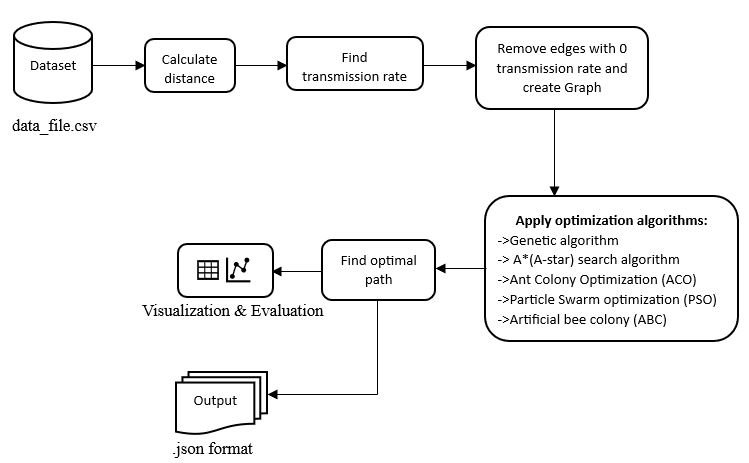

## Importing modules

* heapq: This module provides an implementation of the heap queue or priority queue algorithm.
* random: This module provides functions for generating random numbers.
* networkx: It is used for the creation and manipulation of complex networks or graphs.
* matplotlib.pyplot: A plotting library for creating visualizations in Python.
* pandas: A data manipulation and analysis library to read the csv file.
* json: This module is to print the result in json format.
* numpy: This module is to create numpy array, zeros, calculate square root operations.
* seaborn:  It is a statistical data visualization library based on Matplotlib.
It has built-in themes and color palettes for creating common statistical plots, such as scatter plots, line plots, bar plots.
* PrettyTable: It is a Python library for generating ASCII tables, to create visually better text tables with rows and columns.

In [ ]:
import heapq
import random
import networkx as nx
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D

##Read dataset:
Read data_file.csv file into panda's dataframe 'df' and displaying the dataframe. The 1st column has Vehicle No. from 1 to 100. The 2nd column has coordinate x meter and 3rd column has coordinate y meter.

In [ ]:
!git clone https://github.com/Birajpokharel11/search-Data.git

Cloning into 'search-Data'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
df = pd.read_csv("/content/search-Data/data_file - Copy.csv") # load csv file
df.head(10)

No.            x         y
0    1     0.000000  8.157657
1    2  1400.124877  6.107682
2    3  3300.805188  4.148334
3    4  3701.634008  6.147944
4    5  4102.583249  6.088959
5    6  4202.800929  4.170082
6    7  4803.101556  2.098907
7    8  5603.688004  6.189632
8    9  6403.874407  6.159558
9   10  8104.029001  6.026609

##Calculating Distance:
The function calculate_distance is defined to compute the Euclidean distance between two points given their coordinates.
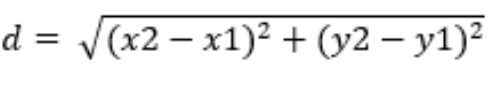

This function will iterate through each row in the df and calculate distances between cars. Finally stores the distances in the dictionary 'car_distances_dict'. This function creates a distance dictionary and it contains the distances of each car with base stations also at the end we have base station 1 and base station 2 distances to all the cars.

In this function, after calculating the distances we have removed the distances which is equal to or more than 6000 as stated in the assessment there is no connection between cars and the base station with a distance above 60000. At the end, we have a dictionary where nodes are from car 1 to car 100, and base stations 1 and 2 and we have the distances between every car and every base station excluding the car and base stations with distances over 6000.

Add the 2 Base Station coordinates to the dataframe. BS-1 with coordinate (x1,y1) = (-1, -1) and BS-2 with coordinate (x2,y2) = (56325, 9).



In [ ]:
# Function to calculate Euclidean distance between two points
def calculate_distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# Calculate distances and store in car_distances_dict
car_distances_dict = {}

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    source_car = f'Car-{int(row["No."])}'
    car_distances_dict[source_car] = {}

    # Calculate distances to other cars
    for other_index, other_row in df.iterrows():
        if index != other_index:
            destination_car = f'Car-{int(other_row["No."])}'
            distance = calculate_distance(row['x'], row['y'], other_row['x'], other_row['y'])

            # Convert distance to 0 if it's greater than or equal to 6000 meters
            distance = 0 if distance >= 6000 else distance

            # Add to the dictionary only if the distance is not 0
            if distance != 0:
                car_distances_dict[source_car][destination_car] = distance

    # Calculate distances to base stations
    base_station_1_distance = calculate_distance(row['x'], row['y'], -1, -1)
    base_station_2_distance = calculate_distance(row['x'], row['y'], 56325, 9)

    # Convert distances to 0 if they're greater than or equal to 6000 meters
    base_station_1_distance = 0 if base_station_1_distance >= 6000 else base_station_1_distance
    base_station_2_distance = 0 if base_station_2_distance >= 6000 else base_station_2_distance

    # Add to the dictionary only if the distance is not 0
    if base_station_1_distance != 0:
        car_distances_dict[source_car]['BS-1'] = base_station_1_distance

    if base_station_2_distance != 0:
        car_distances_dict[source_car]['BS-2'] = base_station_2_distance

# Append distances from Base Station 1 to all cars
car_distances_dict['BS-1'] = {car: distances['BS-1'] for car, distances in car_distances_dict.items() if 'BS-1' in distances}

# Append distances from Base Station 2 to all cars
car_distances_dict['BS-2'] = {car: distances['BS-2'] for car, distances in car_distances_dict.items() if 'BS-2' in distances}

# Remove entries with a value of 0
car_distances_dict = {car: distances for car, distances in car_distances_dict.items() if any(val != 0 for val in distances.values())}

## Graph Creation
Using the NetworkX module a graph is created where nodes represent cars and base stations, and the edges are the distances.
In this code, we have created a Graph of all the data in car_distances_dict.

First Loop, We have initiated a loop that iterates over the items in the car dictionary and prints each key and its corresponding value as i, j.

Second Loop, we have written a code that iterates over car_distances_dict. for each of the cars in the dictionary is added as a node in the graph. There is another loop inside distances where it iterates over the distances from one car to its neighbor cars adds the edges between the can and the destinations and assigns the weight attribute as distance.

In the final product, we have a graph G2 where nodes are cars and base stations and edges are the distances between them.

In [ ]:
# Create a graph using NetworkX
G2 = nx.Graph()
for i, j in car_distances_dict.items():
  print(i,j)
# Add nodes and edges to the graph based on distances
for car, distances in car_distances_dict.items():
    G2.add_node(car)
    for destination, distance in distances.items():
        G2.add_edge(car, destination, weight=distance)

Car-1 {'Car-2': 1400.1263777213621, 'Car-3': 3300.807622960825, 'Car-4': 3701.63455356241, 'Car-5': 4102.583770562924, 'Car-6': 4202.802820684817, 'Car-7': 4803.1053773261165, 'Car-8': 5603.688349586997, 'Car-51': 300.94137813697205, 'Car-52': 1801.5318099257042, 'Car-53': 2801.9005842331458, 'Car-54': 4702.413212774751, 'BS-1': 9.212094116520971}
Car-2 {'Car-1': 1400.1263777213621, 'Car-3': 1900.68132091287, 'Car-4': 2301.5091313521693, 'Car-5': 2702.458372064858, 'Car-6': 2802.676721769383, 'Car-7': 3402.979040207959, 'Car-8': 4203.563127798813, 'Car-9': 5003.749530268907, 'Car-51': 1099.1907995667434, 'Car-52': 401.4074718391587, 'Car-53': 1401.7749353269392, 'Car-54': 3302.2868592456084, 'Car-55': 4602.73554183139, 'Car-56': 5803.194805790136, 'BS-1': 1401.1429049497247}
Car-3 {'Car-1': 3300.807622960825, 'Car-2': 1900.68132091287, 'Car-4': 400.8338076845223, 'Car-5': 801.7804095422007, 'Car-6': 901.9957412621801, 'Car-7': 1502.2977659097742, 'Car-8': 2302.883720712628, 'Car-9': 31

## Shortest Path Calculation before applying opimization algorithm:
Finds the shortest paths by iterating over each car to Base Station 1 and Base Station 2, and prints the results.

The code nx.shortest_path is using NetworkX library to find the shortest path from a source node to a target node in which source node are all the cars and destination nodes are two bus stations.

overallly it below code calculates shortest path for each car to base station 1 and base station 2 based on weight which is distances.

This code below idea is taken from (Liu et al. 2021).

In [ ]:
# Find and print the shortest paths to Base Station 1 and Base Station 2 for all cars
for source_node in df['No.']:
    source_node = f'Car-{int(source_node)}'
    shortest_path_to_base_station_1 = nx.shortest_path(G2, source=source_node, target='BS-1', weight='weight')
    shortest_path_to_base_station_2 = nx.shortest_path(G2, source=source_node, target='BS-2', weight='weight')

    print(f"Shortest path from {source_node} BS-1: {shortest_path_to_base_station_1}")
    print(f"Shortest path from {source_node} BS-2: {shortest_path_to_base_station_2}")


Shortest path from Car-1 BS-1: ['Car-1', 'BS-1']
Shortest path from Car-1 BS-2: ['Car-1', 'Car-8', 'Car-59', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']
Shortest path from Car-2 BS-1: ['Car-2', 'BS-1']
Shortest path from Car-2 BS-2: ['Car-2', 'Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']
Shortest path from Car-3 BS-1: ['Car-3', 'BS-1']
Shortest path from Car-3 BS-2: ['Car-3', 'Car-56', 'Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']
Shortest path from Car-4 BS-1: ['Car-4', 'BS-1']
Shortest path from Car-4 BS-2: ['Car-4', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']
Shortest path from Car-5 BS-1: ['Car-5', 'BS-1']
Shortest path from Car-5 BS-2: ['Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 

## Plotting of Dataframe in 2D plane
This code is visualizing the positions of cars on a 2D plane using a scatter plot, with car and the two base stations.

In summary this code creates a scatter plot and visualize the cars and both base station. This scatter plot is based on numbers of car to figure it out easily where the car is located.

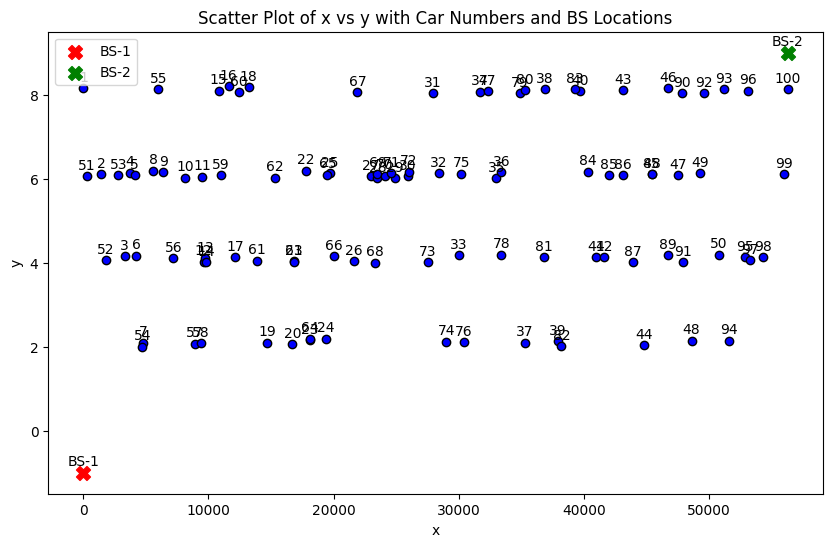

In [ ]:
# Assuming 'df' is your DataFrame
car_numbers = df['No.'].tolist()
x_values = df['x'].tolist()
y_values = df['y'].tolist()

# Coordinates for BS-1 and BS-2
bs1_coordinates = (-1, -1)
bs2_coordinates = (56325, 9)

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the cars
plt.scatter(x_values, y_values, marker='o', c='blue', edgecolors='black')

# Annotate each point with the car number
for car_number, x, y in zip(car_numbers, x_values, y_values):
    plt.annotate(str(car_number), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot BS-1 and BS-2
plt.scatter(*bs1_coordinates, marker='X', c='red', s=100, label='BS-1')
plt.scatter(*bs2_coordinates, marker='X', c='green', s=100, label='BS-2')

# Annotate BS-1 and BS-2
plt.annotate('BS-1', bs1_coordinates, textcoords="offset points", xytext=(0, 5), ha='center')
plt.annotate('BS-2', bs2_coordinates, textcoords="offset points", xytext=(0, 5), ha='center')

# Labeling and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y with Car Numbers and BS Locations')
plt.legend()

# Show the plot
plt.show()


##Visualizing 3D scatter plot.

This plot provides the car positions in a 3D space, where the x and y coordinates represent the positions on the plane, and the car and base stations in the z-axis in 3D space.



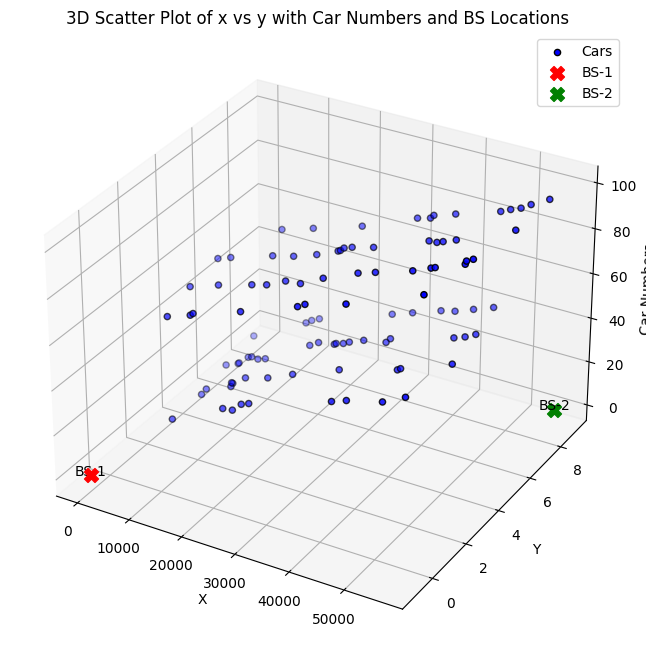

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the cars
ax.scatter(x_values, y_values, car_numbers, c='blue', marker='o', edgecolors='black', label='Cars')

# Plot BS-1 and BS-2
ax.scatter(*bs1_coordinates, 0, c='red', marker='X', s=100, label='BS-1')
ax.scatter(*bs2_coordinates, 0, c='green', marker='X', s=100, label='BS-2')

# Annotate BS-1 and BS-2
ax.text(bs1_coordinates[0], bs1_coordinates[1], 0, 'BS-1', ha='center')
ax.text(bs2_coordinates[0], bs2_coordinates[1], 0, 'BS-2', ha='center')

# Labeling and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Car Numbers')
ax.set_title('3D Scatter Plot of x vs y with Car Numbers and BS Locations')
ax.legend()

# Show the plot
plt.show()


## visualization of the cars and its nearest base stations in both 2d and 3d plot

Here in this code we have use the scatter plot to figure out out of 100 cars which car is near to which base station in both 2d and 3d plot and draw a line to the respective base stations for each car

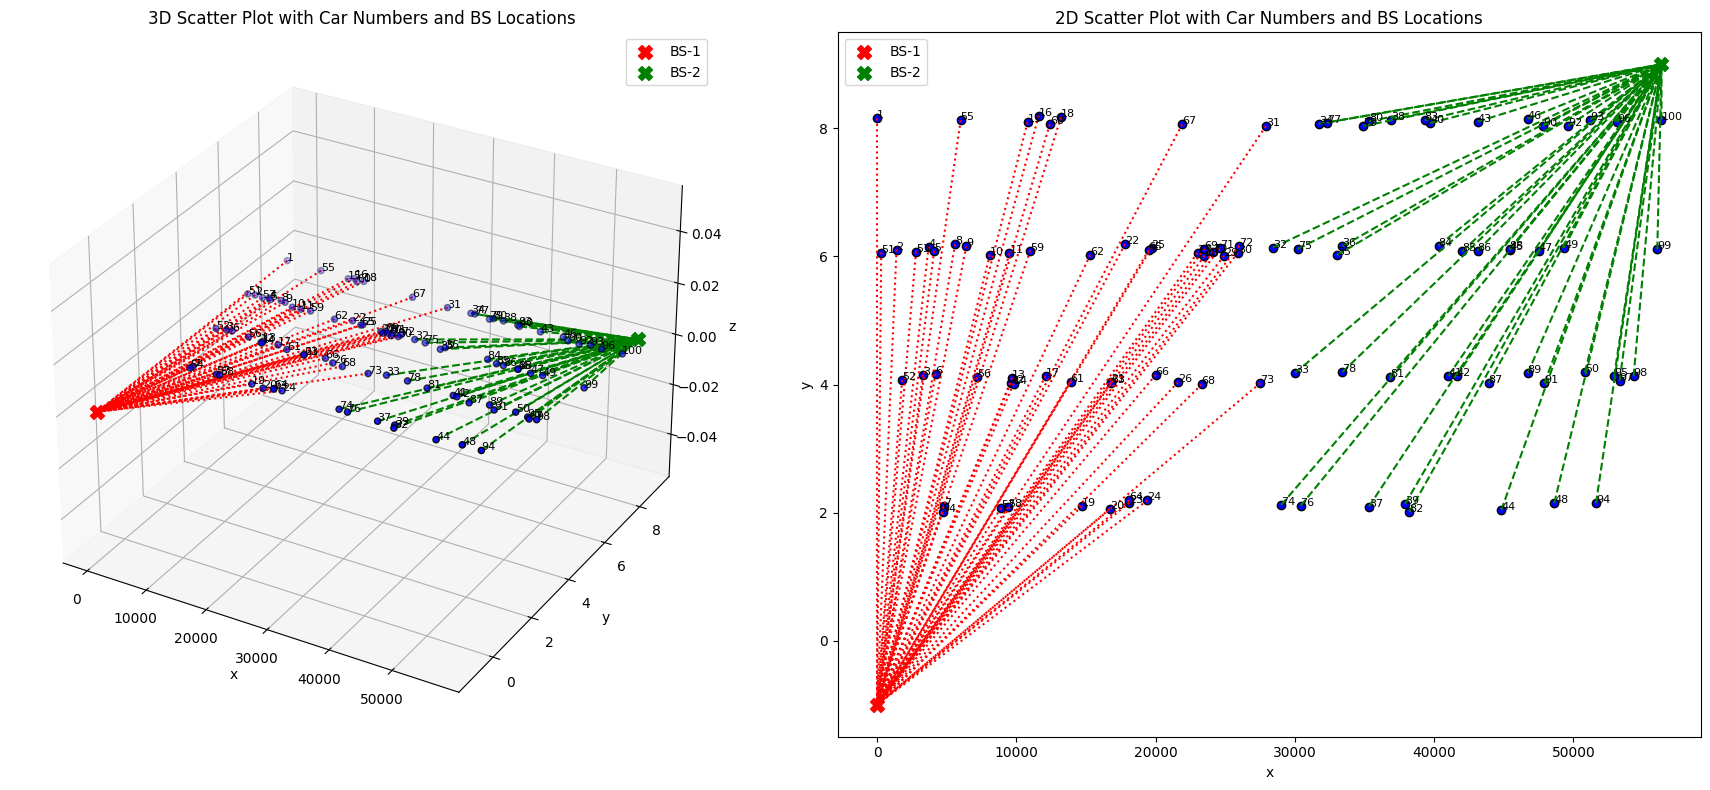

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' is your DataFrame
car_numbers = df['No.'].tolist()
x_values = df['x'].tolist()
y_values = df['y'].tolist()

# Coordinates for BS-1 and BS-2
bs1_coordinates = (-1, -1, 0)
bs2_coordinates = (56325, 9, 0)

# Create a 3D scatter plot
fig = plt.figure(figsize=(18, 8))

# 3D Plot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.scatter(x_values, y_values, [0]*len(x_values), marker='o', c='blue', edgecolors='black')

# Annotate each point with the car number
for car_number, x, y in zip(car_numbers, x_values, y_values):
    ax3d.text(x, y, 0, str(car_number), color='black', fontsize=8)

# Plot BS-1 and BS-2
ax3d.scatter(*bs1_coordinates[:2], marker='X', c='red', s=100, label='BS-1')
ax3d.scatter(*bs2_coordinates[:2], marker='X', c='green', s=100, label='BS-2')

# Draw lines from cars to the nearest base station
for car_number, x, y in zip(car_numbers, x_values, y_values):
    distance_to_bs1 = ((x - bs1_coordinates[0])**2 + (y - bs1_coordinates[1])**2)**0.5
    distance_to_bs2 = ((x - bs2_coordinates[0])**2 + (y - bs2_coordinates[1])**2)**0.5

    if distance_to_bs1 < distance_to_bs2:
        ax3d.plot([x, bs1_coordinates[0]], [y, bs1_coordinates[1]], [0, bs1_coordinates[2]], linestyle='dotted', color='red')
    else:
        ax3d.plot([x, bs2_coordinates[0]], [y, bs2_coordinates[1]], [0, bs2_coordinates[2]], linestyle='dashed', color='green')

# Labeling and title for 3D plot
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.set_title('3D Scatter Plot with Car Numbers and BS Locations')
ax3d.legend()

# Create a 2D scatter plot
ax2d = fig.add_subplot(122)
ax2d.scatter(x_values, y_values, marker='o', c='blue', edgecolors='black')

# Annotate each point with the car number
for car_number, x, y in zip(car_numbers, x_values, y_values):
    ax2d.text(x, y, str(car_number), color='black', fontsize=8)

# Plot BS-1 and BS-2
ax2d.scatter(*bs1_coordinates[:2], marker='X', c='red', s=100, label='BS-1')
ax2d.scatter(*bs2_coordinates[:2], marker='X', c='green', s=100, label='BS-2')

# Draw lines from cars to the nearest base station
for car_number, x, y in zip(car_numbers, x_values, y_values):
    distance_to_bs1 = ((x - bs1_coordinates[0])**2 + (y - bs1_coordinates[1])**2)**0.5
    distance_to_bs2 = ((x - bs2_coordinates[0])**2 + (y - bs2_coordinates[1])**2)**0.5

    if distance_to_bs1 < distance_to_bs2:
        ax2d.plot([x, bs1_coordinates[0]], [y, bs1_coordinates[1]], linestyle='dotted', color='red')
    else:
        ax2d.plot([x, bs2_coordinates[0]], [y, bs2_coordinates[1]], linestyle='dashed', color='green')

# Labeling and title for 2D plot
ax2d.set_xlabel('x')
ax2d.set_ylabel('y')
ax2d.set_title('2D Scatter Plot with Car Numbers and BS Locations')
ax2d.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##Assigning transmission rate for the distance and Creating Graph:
The Euclidean distance between two points are calculated using their coordinates and then assign transmission rates based on its distance. An undirected graph using NetworkX is created with each car and base station as nodes and transmission rate as weight for the edges. Then the graph is visualized using NetworkX and Matplotlib.
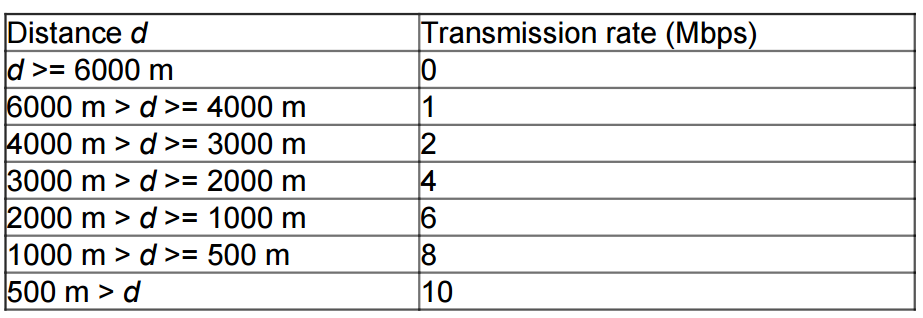

The transmission rate is determined by the distance of a pair of communicating Cars. So, convert the distance into ransmission rate as shown below.

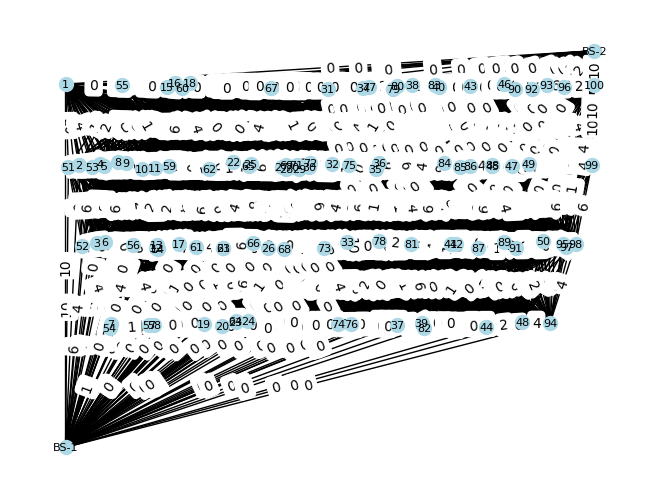

In [ ]:
# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to calculate transmission rate based on distance
def calculate_transmission_rate(distance):
    if distance < 500:
        return 10
    elif 500 <= distance < 1000:
        return 8
    elif 1000 <= distance < 2000:
        return 6
    elif 2000 <= distance < 3000:
        return 4
    elif 3000 <= distance < 4000:
        return 2
    elif 4000 <= distance < 6000:
        return 1
    else:
        return 0
bs1_coordinates = (-1, -1)
bs2_coordinates = (56325, 9)

# Add base station coordinates to the DataFrame
df.loc['BS-1'] = ['BS-1', bs1_coordinates[0], bs1_coordinates[1]]
df.loc['BS-2'] = ['BS-2', bs2_coordinates[0], bs2_coordinates[1]]

# Convert coordinates to numeric values
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])

# Reset the index
df.reset_index(drop=True, inplace=True)

# Create a directed graph
G = nx.Graph()

# Add cars and base stations as nodes
for i in range(len(df)):
    G.add_node(df['No.'][i], pos=(df['x'][i], df['y'][i]))

# Add edges with transmission rates
for i in range(len(df)):
    for j in range(len(df)):
        if i != j:
            distance = calculate_distance((df['x'][i], df['y'][i]), (df['x'][j], df['y'][j]))
            transmission_rate = calculate_transmission_rate(distance)
            G.add_edge(df['No.'][i], df['No.'][j], transmission_rate=transmission_rate)

# Visualize the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=8, edge_color='black', font_color='black')
edge_labels = nx.get_edge_attributes(G, 'transmission_rate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


##Remove edges with transmission rates
The edges with a transmission rate of 0 are removed from the previously created graph. This will eliminate connections with no transmission capacity.

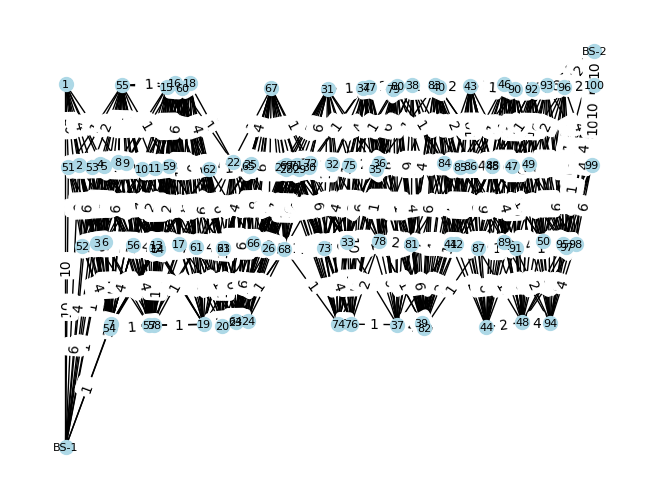

In [ ]:
# Remove edges with transmission rates
edges_to_remove = [(source, target) for source, target, data in G.edges(data=True) if data['transmission_rate'] == 0]
G.remove_edges_from(edges_to_remove)

# Visualize the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=8, edge_color='black', font_color='black')
edge_labels = nx.get_edge_attributes(G, 'transmission_rate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

## Printing Nodes and Edges:
This code will printnodes and edges along with their attributes in a graph G.

In [ ]:
# Print nodes and their attributes
print("Nodes:")
for node, attributes in G.nodes(data=True):
    print(f"Node: {node}, Attributes: {attributes}")

# Print edges and their attributes
print("\nEdges:")
for source, target, attributes in G.edges(data=True):
    print(f"Edge: {source} -> {target}, Attributes: {attributes}")

Nodes:
Node: 1, Attributes: {'pos': (0.0, 8.157656797)}
Node: 2, Attributes: {'pos': (1400.124877, 6.107681949)}
Node: 3, Attributes: {'pos': (3300.805188, 4.148334089)}
Node: 4, Attributes: {'pos': (3701.634008, 6.147944121)}
Node: 5, Attributes: {'pos': (4102.583249, 6.088958921)}
Node: 6, Attributes: {'pos': (4202.800929, 4.170081972)}
Node: 7, Attributes: {'pos': (4803.101556, 2.098906972)}
Node: 8, Attributes: {'pos': (5603.688004, 6.189631507)}
Node: 9, Attributes: {'pos': (6403.874407, 6.159557638)}
Node: 10, Attributes: {'pos': (8104.029001, 6.026608917)}
Node: 11, Attributes: {'pos': (9504.178753, 6.047553951)}
Node: 12, Attributes: {'pos': (9604.928843, 4.025544693)}
Node: 13, Attributes: {'pos': (9705.07109, 4.10682408)}
Node: 14, Attributes: {'pos': (9805.879785, 4.011339338)}
Node: 15, Attributes: {'pos': (10806.54597, 8.093715)}
Node: 16, Attributes: {'pos': (11607.34896, 8.196537561)}
Node: 17, Attributes: {'pos': (12107.3743, 4.136444232)}
Node: 18, Attributes: {'pos': 

#Methodology

In order to find the optimal path with maximum end to end transmission and minimum latency, five different algorithms are used. Since it is an twin objective problem, these algorithm uses pareto optimization which works based on the NSGA-II selection mechanism.


1.   Genetic algorithm
2.   A*(A-star) search algorithm
3.   Ant Colony Optimization (ACO) algorithm
4.   Particle Swarm Optimization (PSO) algorithm
5.   Artificial bee colony (ABC) algorithm



# 1. Genetic Algorithm

Genetic algorithm is a nature inspired algorithm which provides better solutions to optimization and search problems.

**Function Initialize_population:**This function takes population_size, graph, start_node, end_nodes andcreates an initial population of paths that is later used in genetic algorithm. It uses a function from NetworkX library to find the shortest path and helps genetic algorithm to evolve and optimize the optimal path based on the criteria.

**Function calculate_fitness** This function iterates through all the nodes in provided path,it extracts the transmission rates along with the edges and extracts the minimum transmission rate and in this case the transmission rate contains the distances between cars so short distance means a high transmission rate is yet to be converted and is converted to transmission rate later in the code.It then calculates the fitness score based on the minimum transmission rates out of entire path. The goal of this function is to mimumize the fitness score during the optimization so that there is better optimal path with better transmission rates.

**function normalize_fitness** This function takes all the lists of fitness scores , it removes the infinite values and then calculates the sum of fitness scores with finite values and then it nomalizes the scores by dividing it by the sum of fitness scores.
The normalize scores helps in selecting suitable individuals in a genetic algorithm.

**Function Select_parents** This function is like a roulette wheel for a genetic algorithm. It randomly selects two individual based on normalized fitness scores. This function basicly determines which individual in the population will go to crossover to create the next generation for cross over.

**Function crossover and Function Mutate** In this two function the crossover combines genetic information from the two randomly selected parents  and creates a new information. The mitate function starts random changes to an individual. This process is very important in genetic algorithm to evolve the population in future generation to get bettwe solution.

**Function genetic_algorithm function** This function utilizes a genetic algorithm approach to evolve  the paths over given generation for finding the most optimal path in the graph network from the starting point to the target node. This algorithm utilizes all the function like, initialize population normalize fitness, select parents mutate, crossover in one and operates it to give a optimmal path with max transmission rate.

**Genetic_algorithm_pareto_optimization**  This function uses the NSGA-II selection mechanism. This is the main function where we calculate the optimal path with highest transmission rate and their latency for all 100 cars to both base station. After the calculations we take out a cost function to only select an optimal path for a each car to the base station that provides the highest transmission rate and lowest latency. This action is carried out by calculating a cost value which is a fitness of the selected path plus the latency, the low cost value is selected base station for the car which is the best optimal solution. This optimal path for all car is then stored in json format for comparison down the line.

**Function plot_fitness_progress** This function provides the graph representation of the progress in fitness score over the course of generation.

**Function calculate_transmission_rate** This function converts the distances values to transmission rates.

**save_results_to_json** This function saves the 100 cars optimal path with highest transmission rate and latency to a json file.

Below code idea is taken as references from this paper
(Karur et al. 2021) (Gen et al. 1997)

Optimal path from Car-1 to BS-1: ['Car-1', 'BS-1']


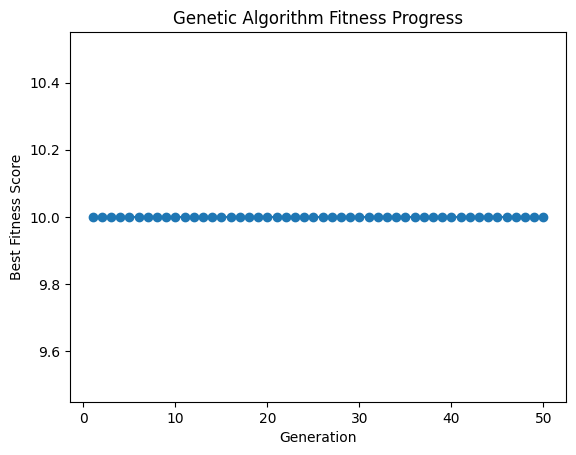

Optimal path from Car-1 to BS-2: ['Car-1', 'Car-8', 'Car-59', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


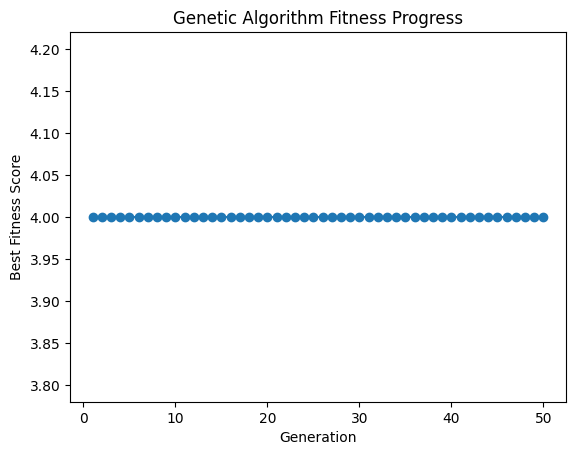

Optimal path from Car-2 to BS-1: ['Car-2', 'BS-1']


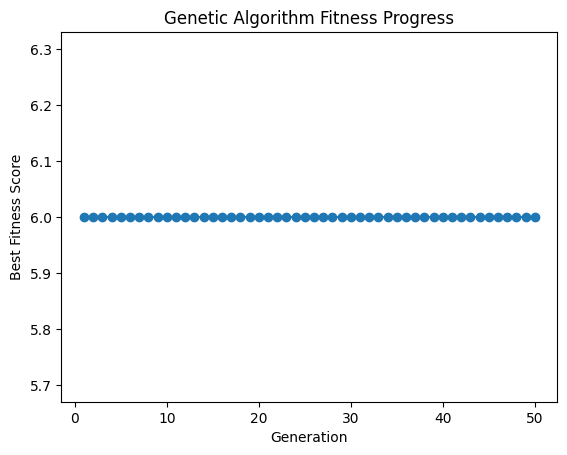

Optimal path from Car-2 to BS-2: ['Car-2', 'Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


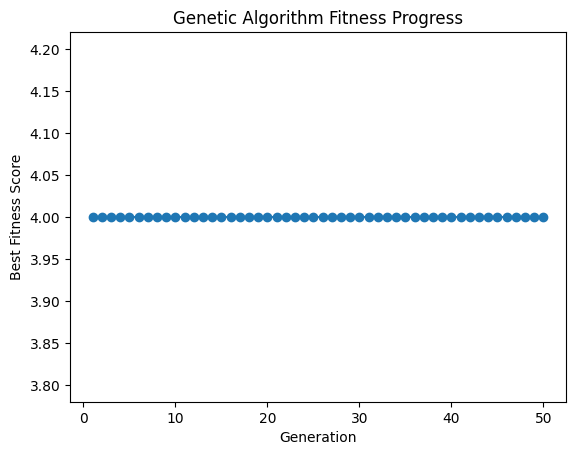

Optimal path from Car-3 to BS-1: ['Car-3', 'BS-1']


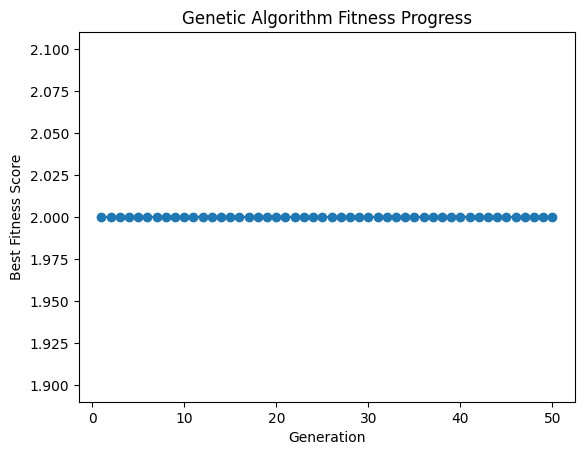

Optimal path from Car-3 to BS-2: ['Car-3', 'Car-56', 'Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


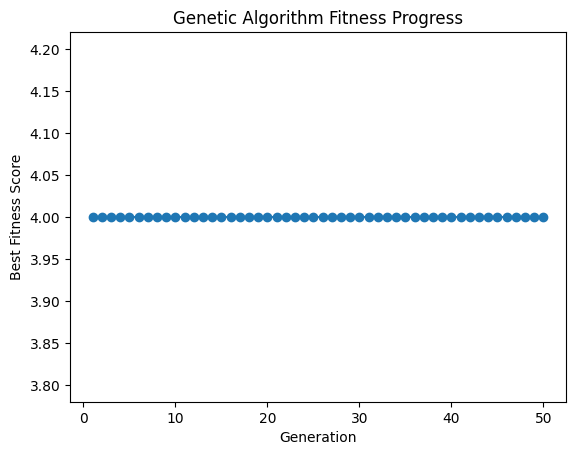

Optimal path from Car-4 to BS-1: ['Car-4', 'BS-1']


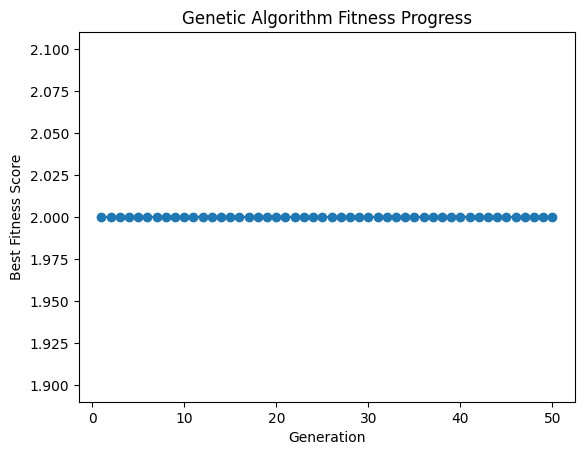

Optimal path from Car-4 to BS-2: ['Car-4', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


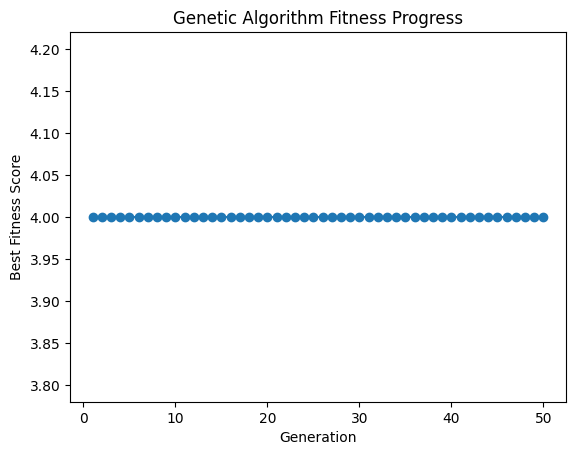

Optimal path from Car-5 to BS-1: ['Car-5', 'BS-1']


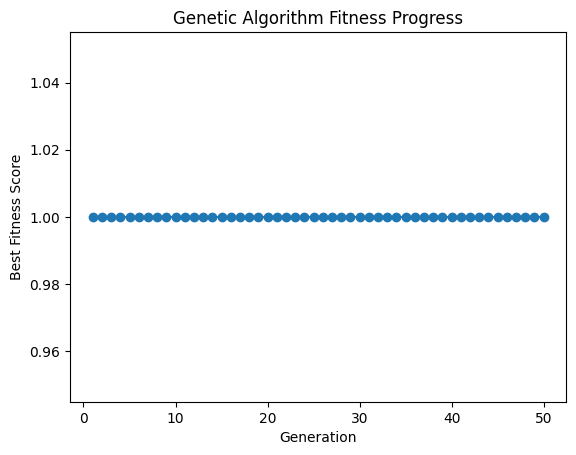

Optimal path from Car-5 to BS-2: ['Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


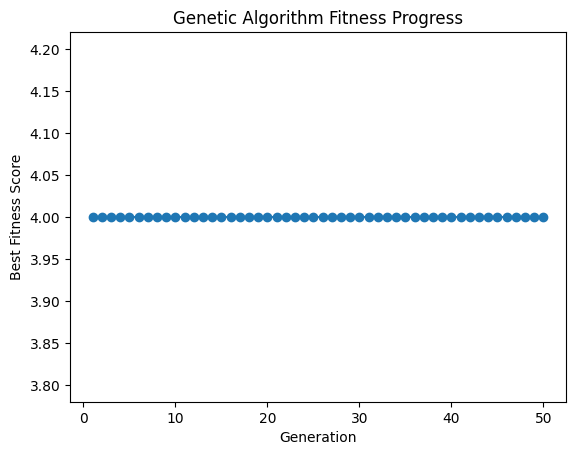

Optimal path from Car-6 to BS-1: ['Car-6', 'BS-1']


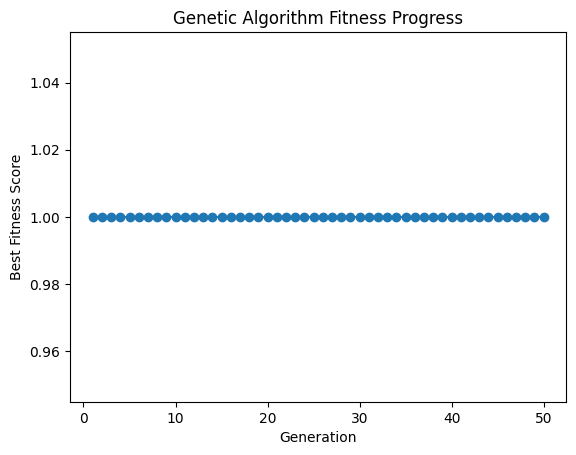

Optimal path from Car-6 to BS-2: ['Car-6', 'Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


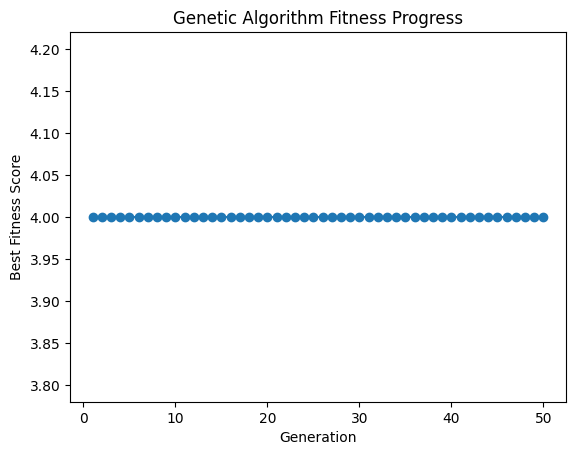

Optimal path from Car-7 to BS-1: ['Car-7', 'BS-1']


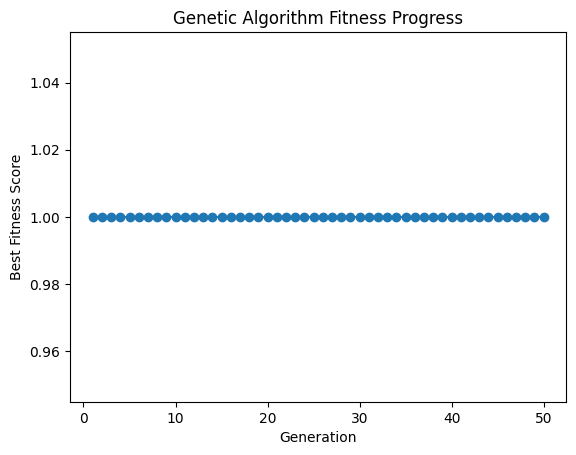

Optimal path from Car-7 to BS-2: ['Car-7', 'Car-14', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


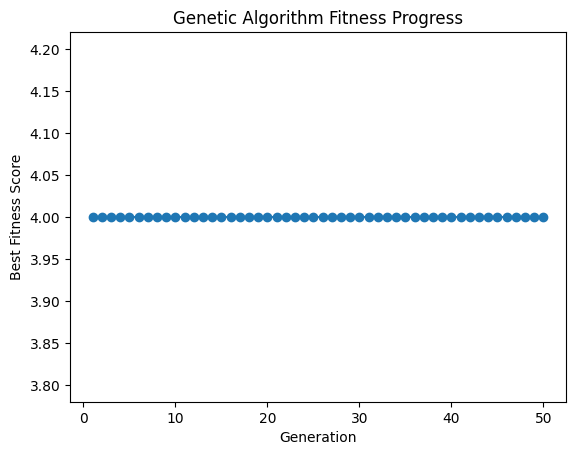

Optimal path from Car-8 to BS-1: ['Car-8', 'BS-1']


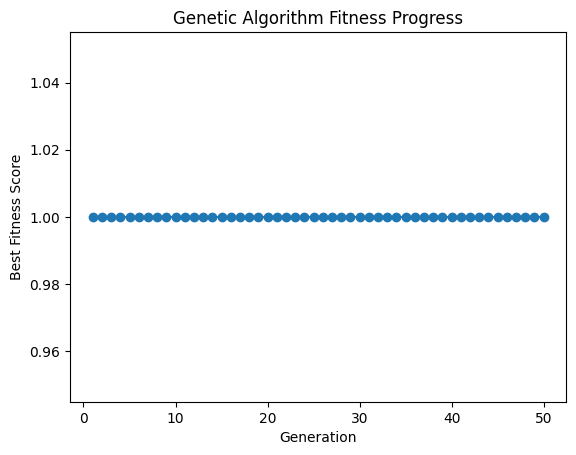

Optimal path from Car-8 to BS-2: ['Car-8', 'Car-59', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


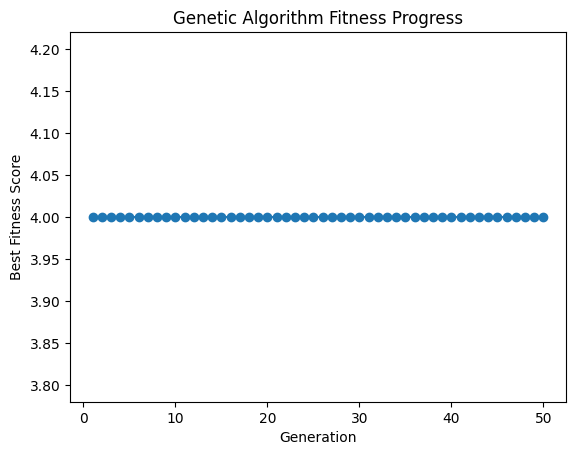

Optimal path from Car-9 to BS-1: ['Car-9', 'Car-6', 'BS-1']


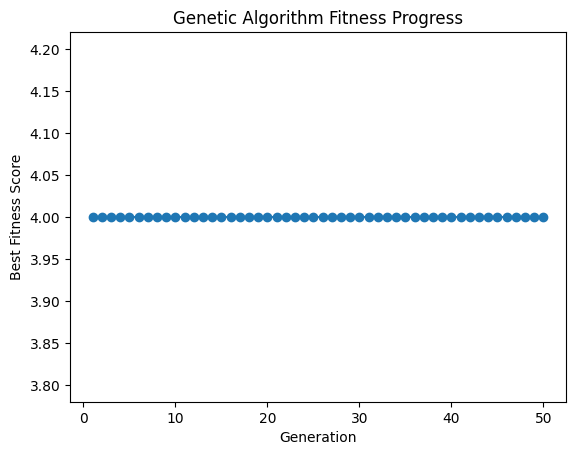

Optimal path from Car-9 to BS-2: ['Car-9', 'Car-59', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


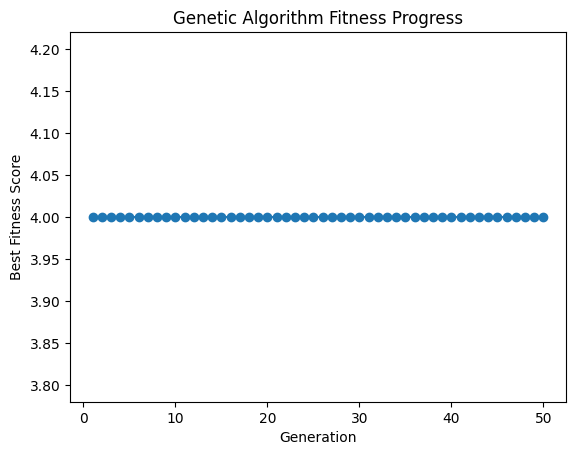

Optimal path from Car-10 to BS-1: ['Car-10', 'Car-7', 'BS-1']


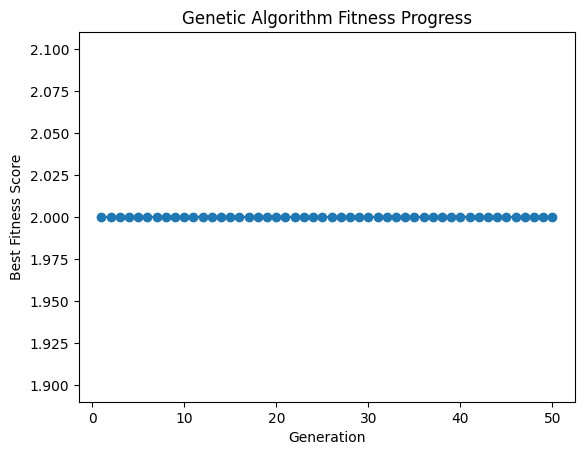

Optimal path from Car-10 to BS-2: ['Car-10', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


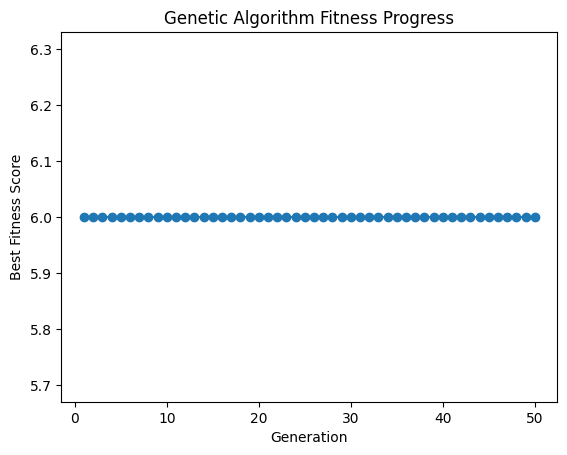

Optimal path from Car-11 to BS-1: ['Car-11', 'Car-7', 'BS-1']


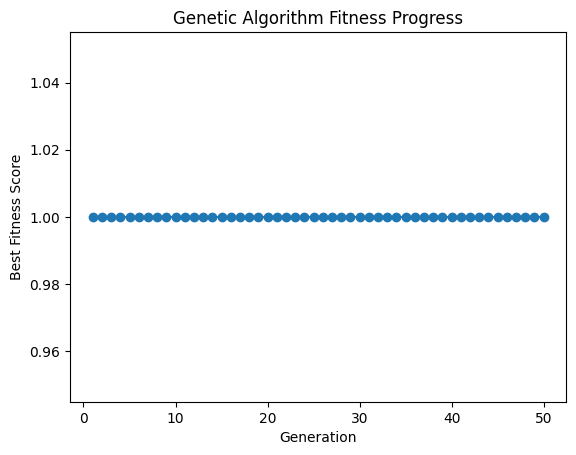

Optimal path from Car-11 to BS-2: ['Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


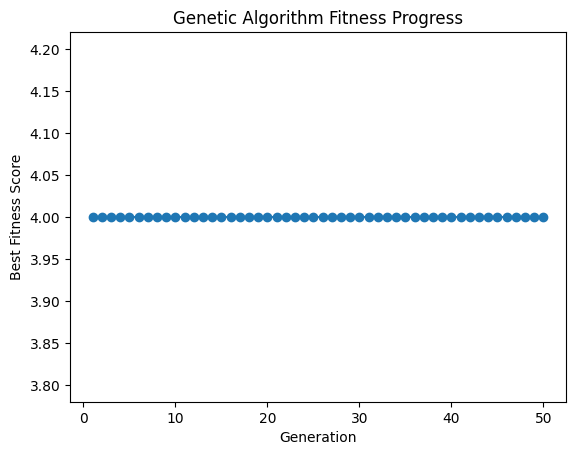

Optimal path from Car-12 to BS-1: ['Car-12', 'Car-54', 'BS-1']


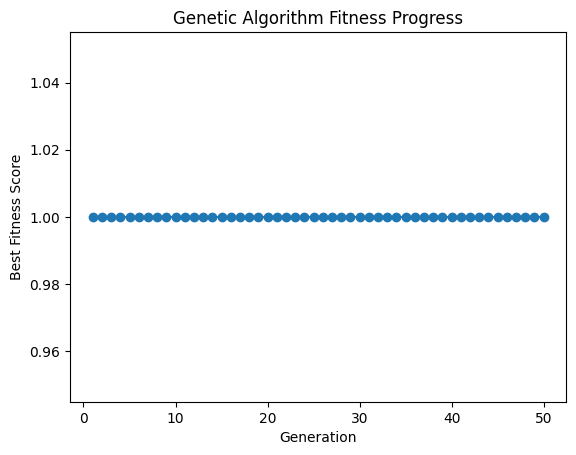

Optimal path from Car-12 to BS-2: ['Car-12', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


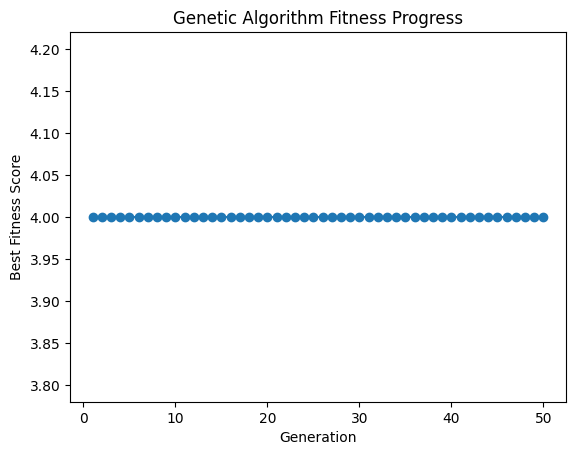

Optimal path from Car-13 to BS-1: ['Car-13', 'Car-54', 'BS-1']


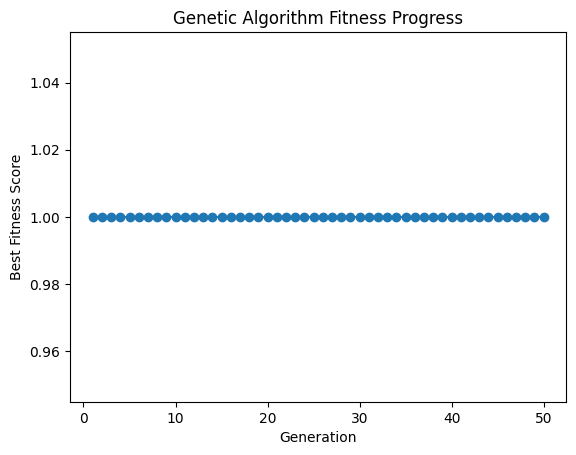

Optimal path from Car-13 to BS-2: ['Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


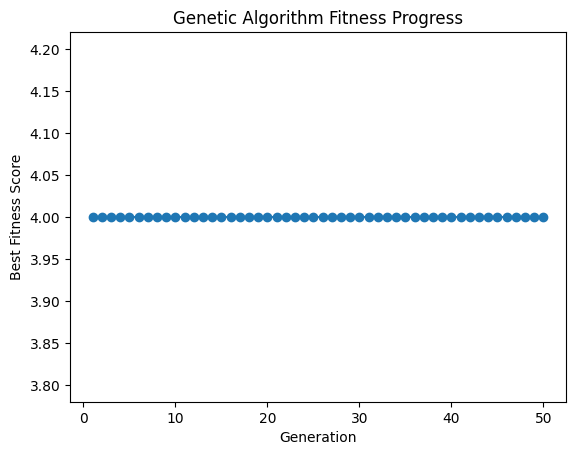

Optimal path from Car-14 to BS-1: ['Car-14', 'Car-54', 'BS-1']


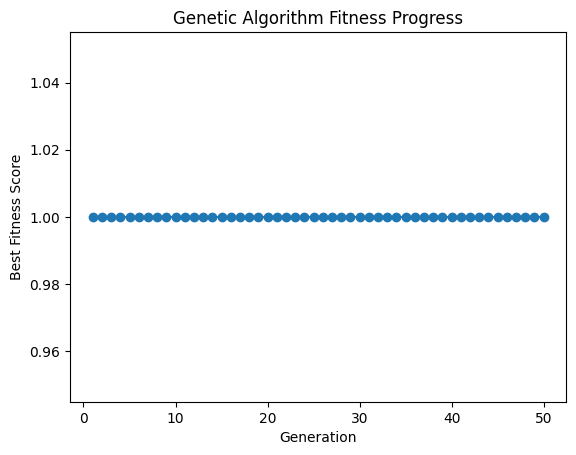

Optimal path from Car-14 to BS-2: ['Car-14', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


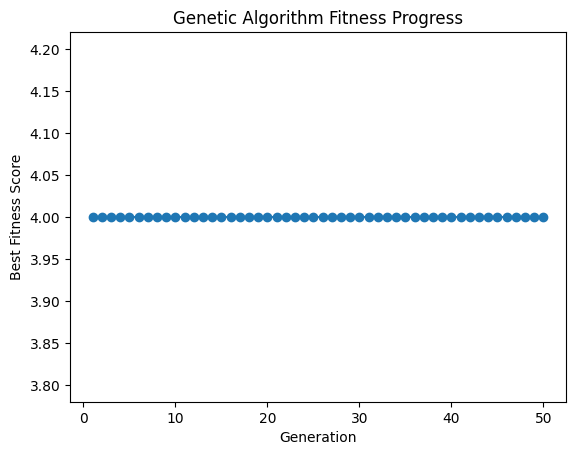

Optimal path from Car-15 to BS-1: ['Car-15', 'Car-56', 'Car-7', 'BS-1']


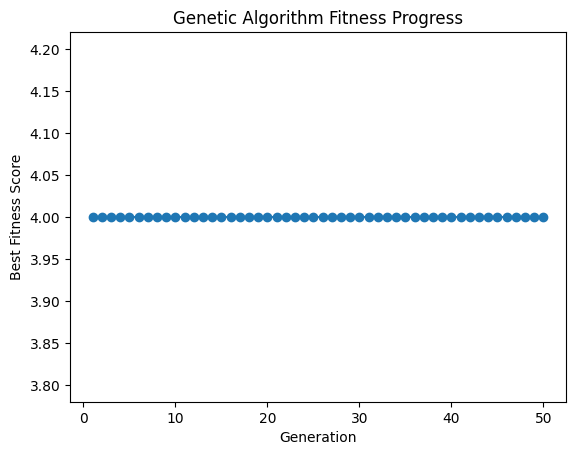

Optimal path from Car-15 to BS-2: ['Car-15', 'Car-60', 'Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


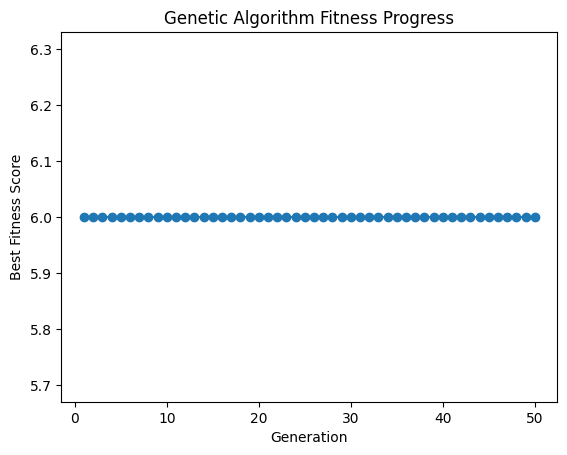

Optimal path from Car-16 to BS-1: ['Car-16', 'Car-56', 'Car-7', 'BS-1']


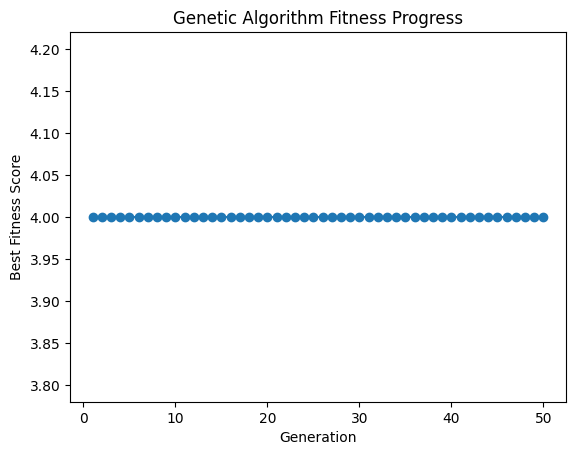

Optimal path from Car-16 to BS-2: ['Car-16', 'Car-60', 'Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


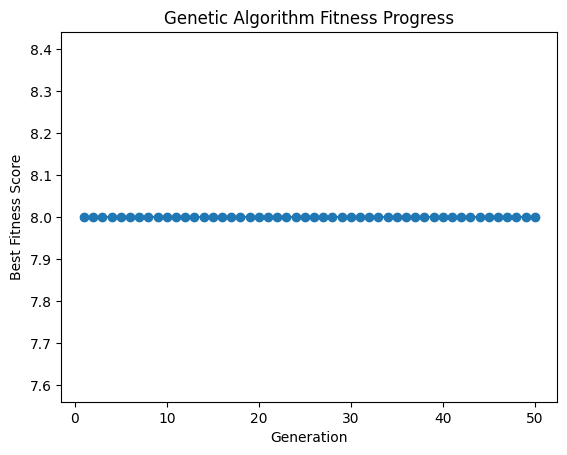

Optimal path from Car-17 to BS-1: ['Car-17', 'Car-14', 'Car-54', 'BS-1']


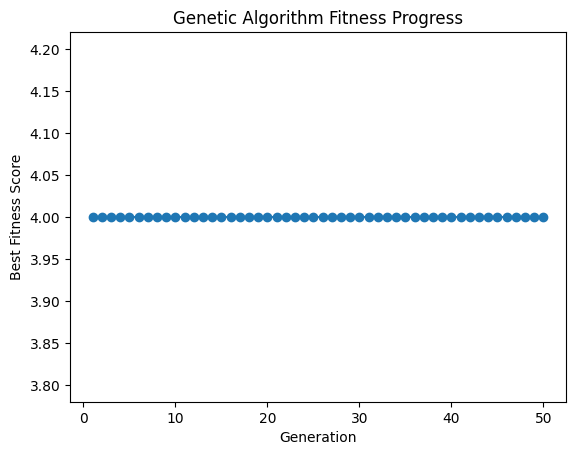

Optimal path from Car-17 to BS-2: ['Car-17', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


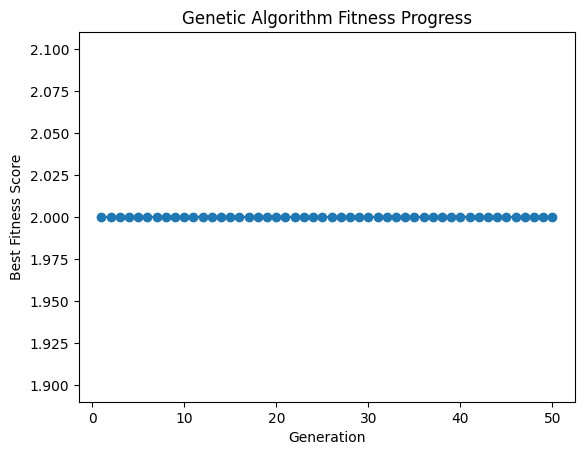

Optimal path from Car-18 to BS-1: ['Car-18', 'Car-11', 'Car-7', 'BS-1']


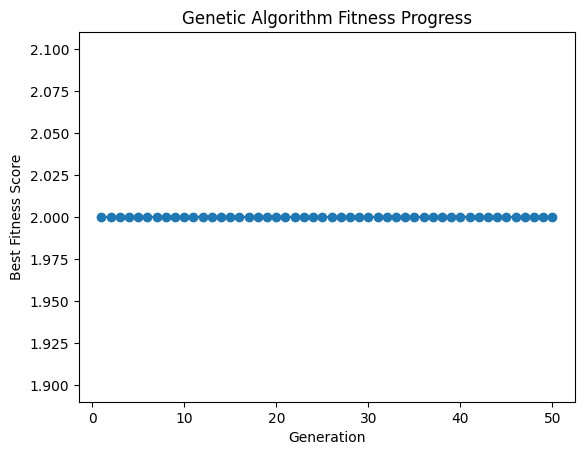

Optimal path from Car-18 to BS-2: ['Car-18', 'Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


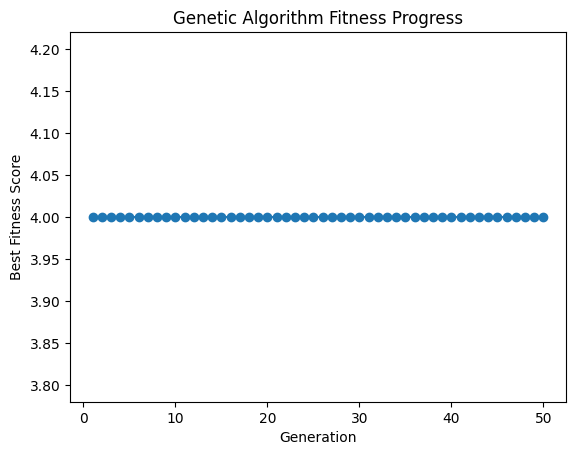

Optimal path from Car-19 to BS-1: ['Car-19', 'Car-57', 'Car-54', 'BS-1']


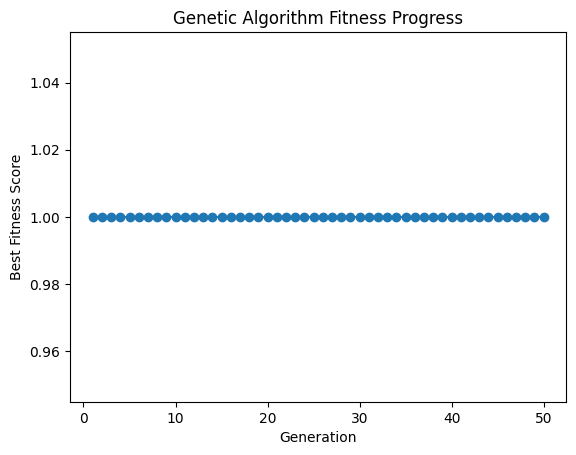

Optimal path from Car-19 to BS-2: ['Car-19', 'Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


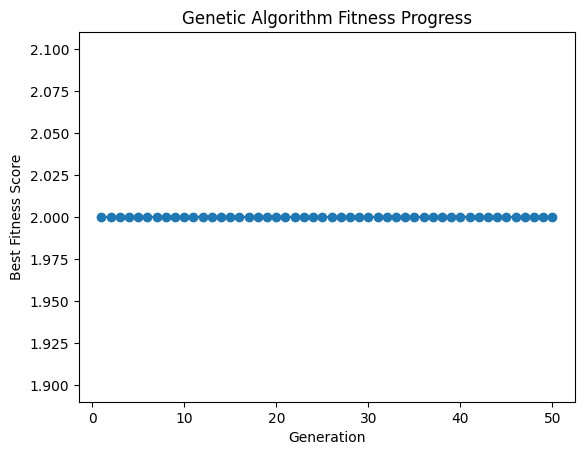

Optimal path from Car-20 to BS-1: ['Car-20', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


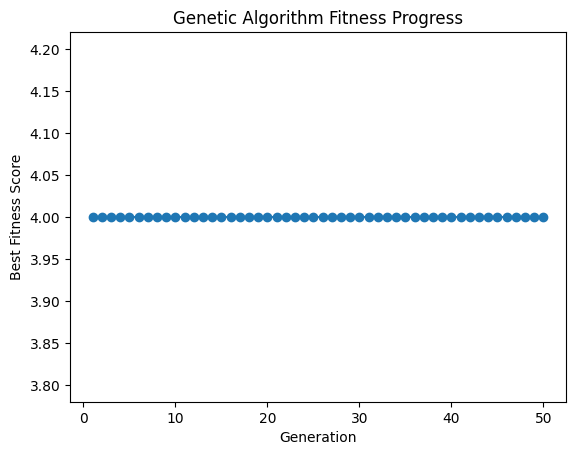

Optimal path from Car-20 to BS-2: ['Car-20', 'Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


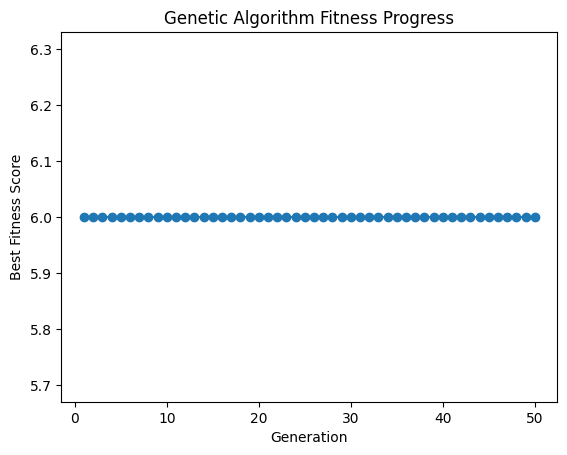

Optimal path from Car-21 to BS-1: ['Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


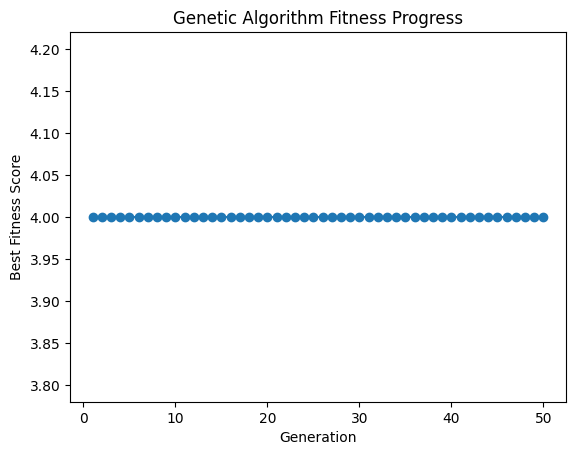

Optimal path from Car-21 to BS-2: ['Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


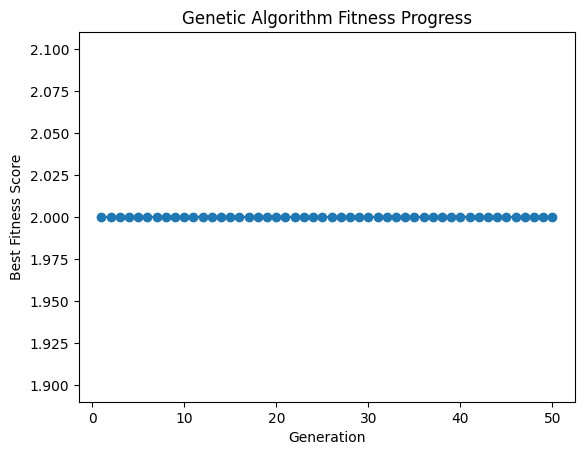

Optimal path from Car-22 to BS-1: ['Car-22', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


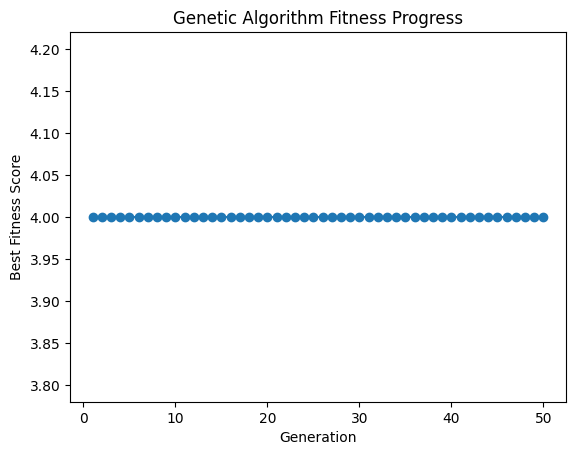

Optimal path from Car-22 to BS-2: ['Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


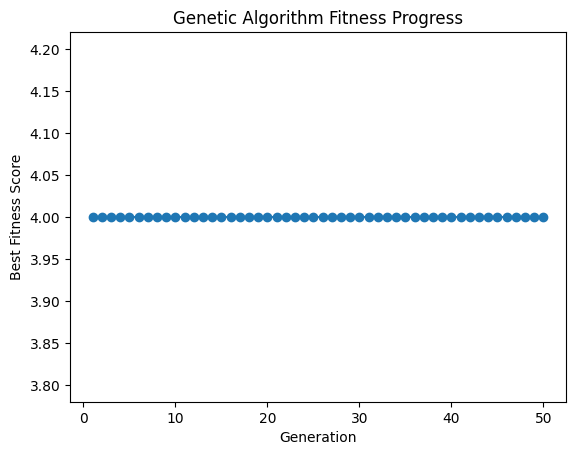

Optimal path from Car-23 to BS-1: ['Car-23', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


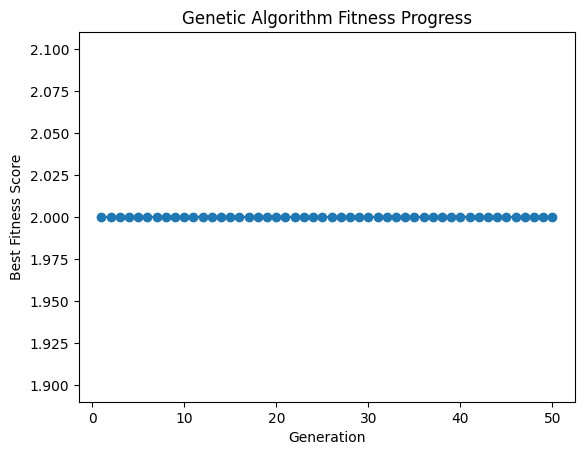

Optimal path from Car-23 to BS-2: ['Car-23', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


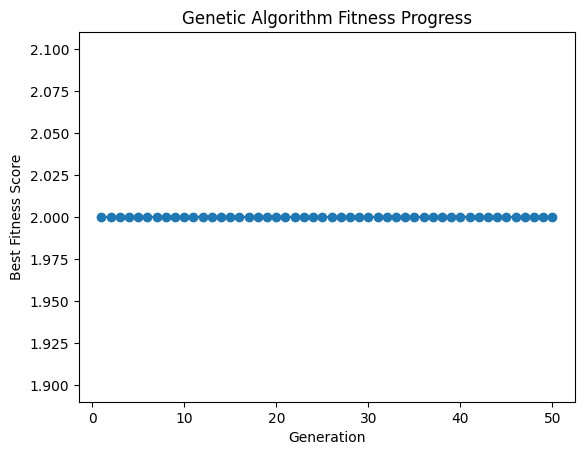

Optimal path from Car-24 to BS-1: ['Car-24', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


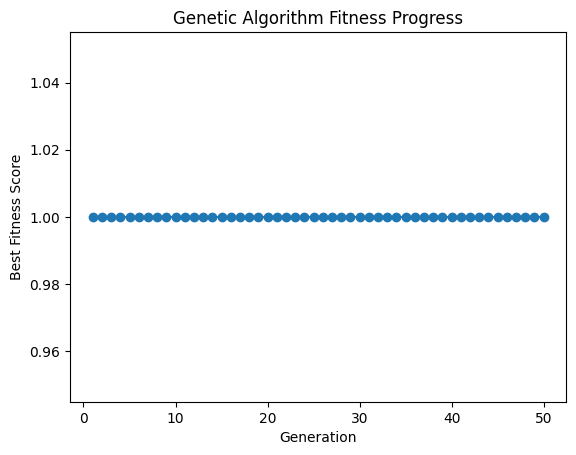

Optimal path from Car-24 to BS-2: ['Car-24', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


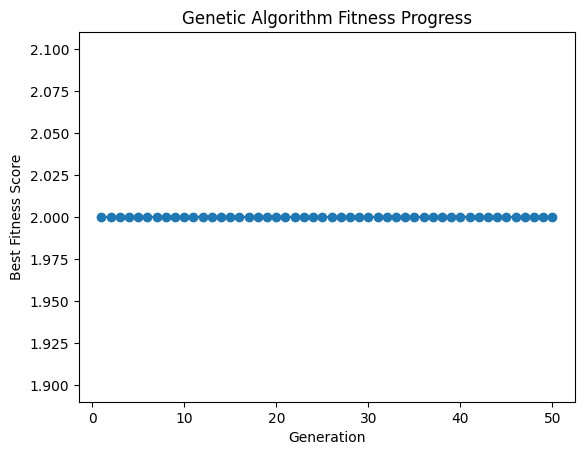

Optimal path from Car-25 to BS-1: ['Car-25', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


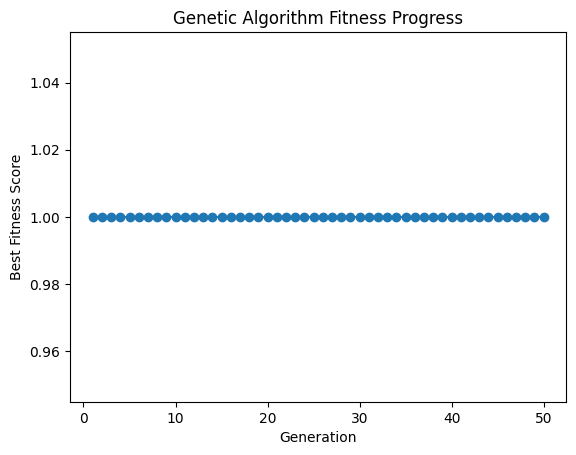

Optimal path from Car-25 to BS-2: ['Car-25', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


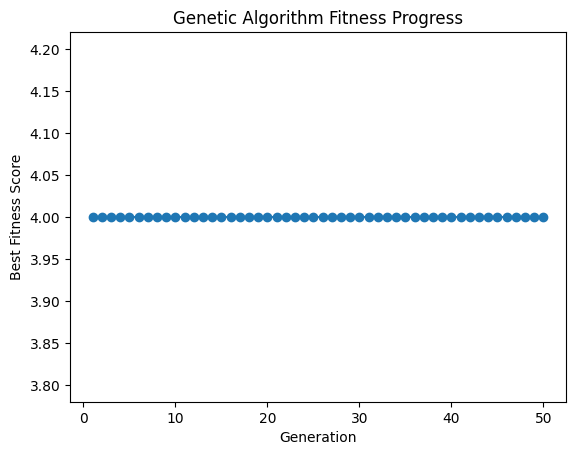

Optimal path from Car-26 to BS-1: ['Car-26', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


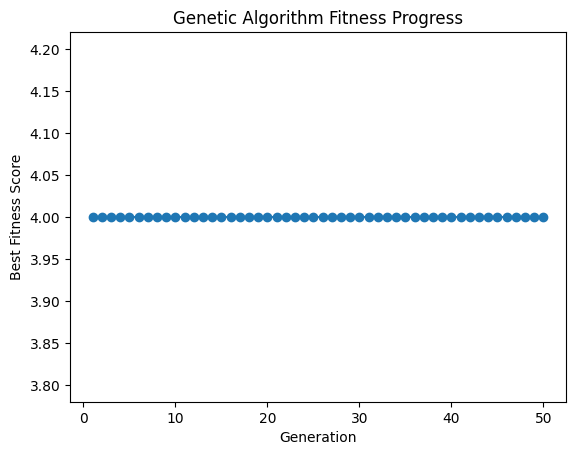

Optimal path from Car-26 to BS-2: ['Car-26', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


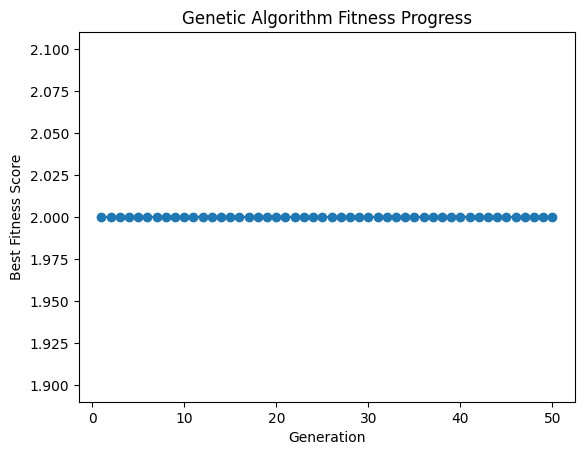

Optimal path from Car-27 to BS-1: ['Car-27', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


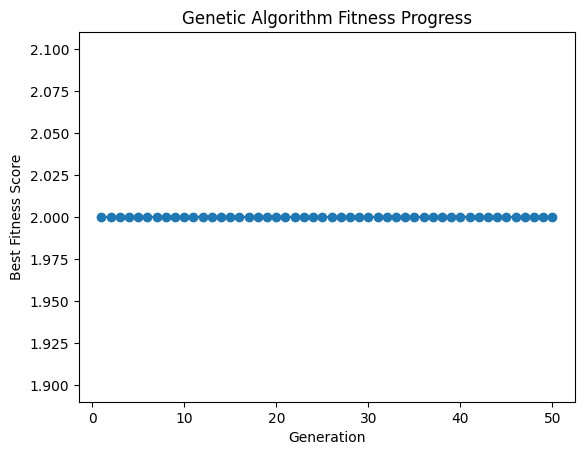

Optimal path from Car-27 to BS-2: ['Car-27', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


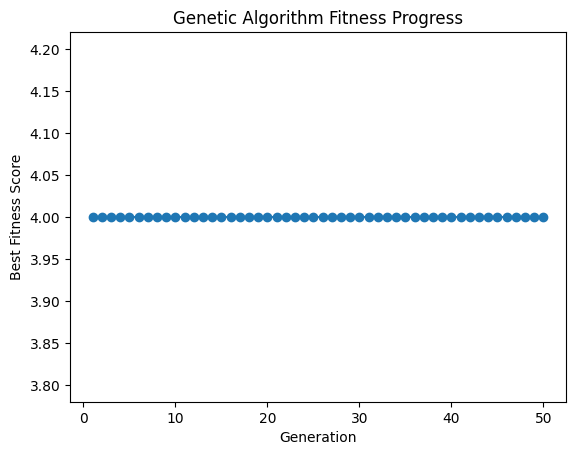

Optimal path from Car-28 to BS-1: ['Car-28', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


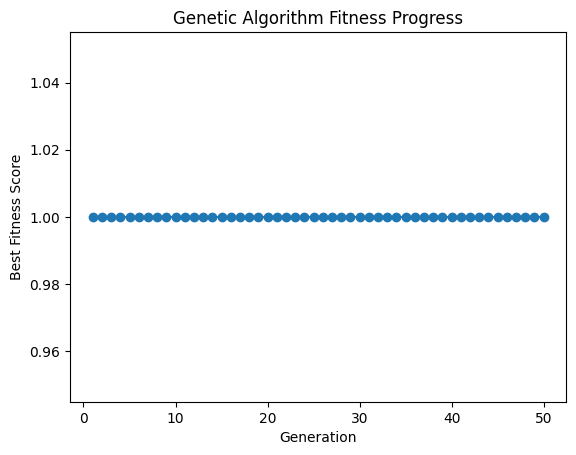

Optimal path from Car-28 to BS-2: ['Car-28', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


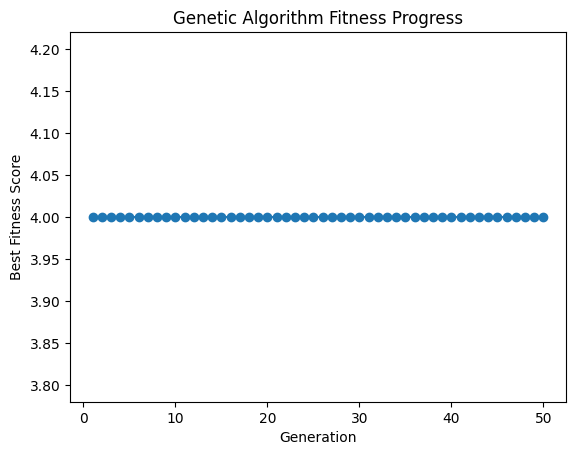

Optimal path from Car-29 to BS-1: ['Car-29', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


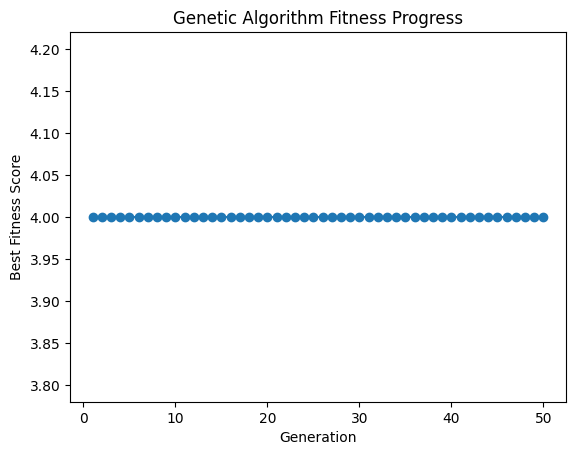

Optimal path from Car-29 to BS-2: ['Car-29', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


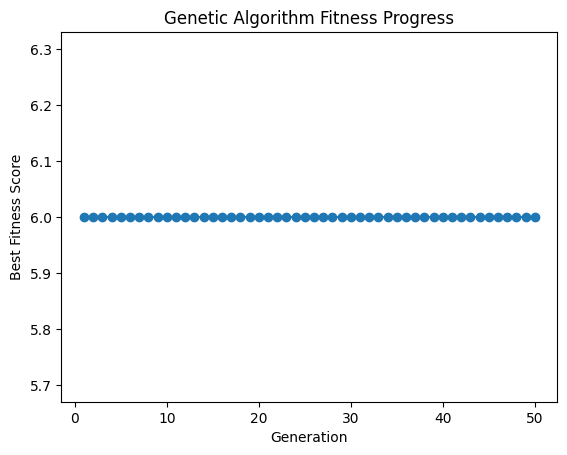

Optimal path from Car-30 to BS-1: ['Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


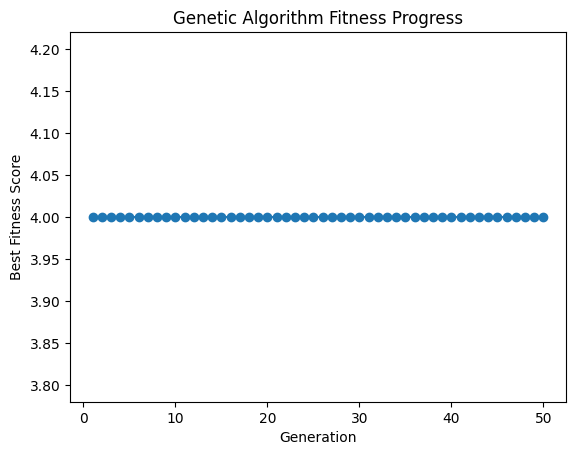

Optimal path from Car-30 to BS-2: ['Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


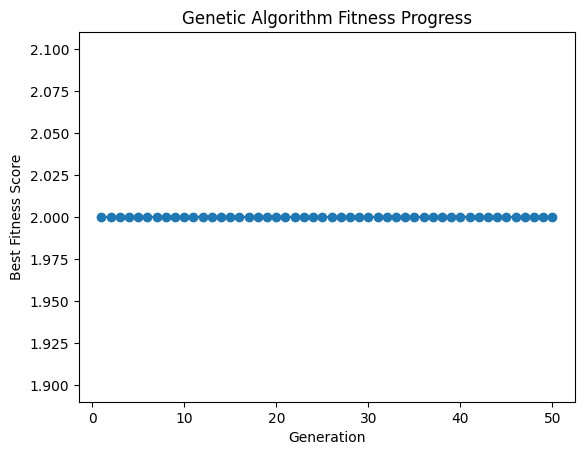

Optimal path from Car-31 to BS-1: ['Car-31', 'Car-27', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


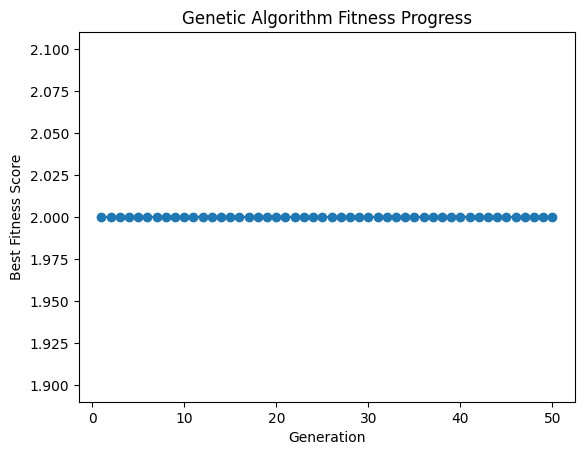

Optimal path from Car-31 to BS-2: ['Car-31', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


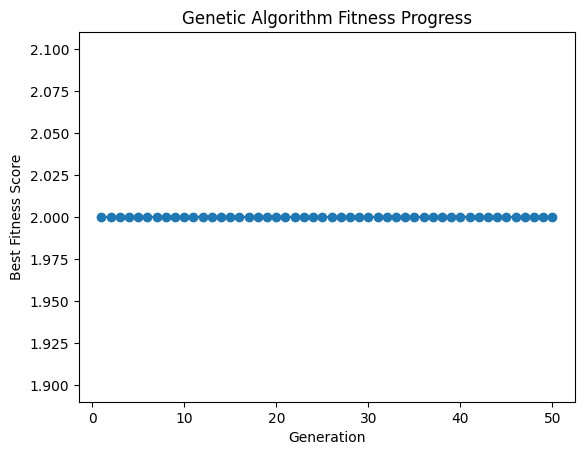

Optimal path from Car-32 to BS-1: ['Car-32', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


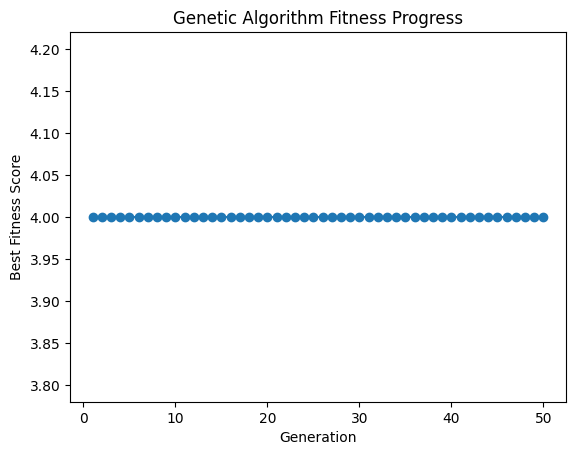

Optimal path from Car-32 to BS-2: ['Car-32', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


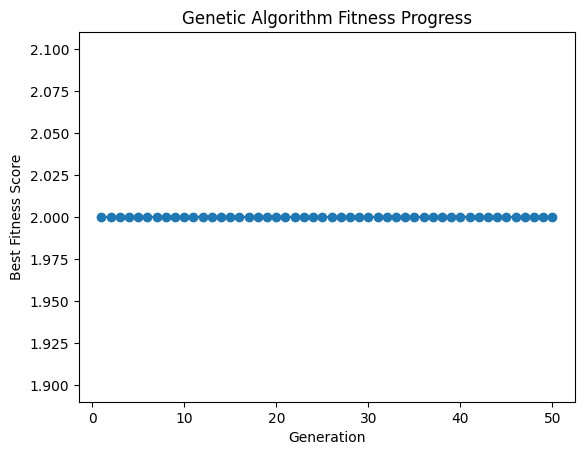

Optimal path from Car-33 to BS-1: ['Car-33', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


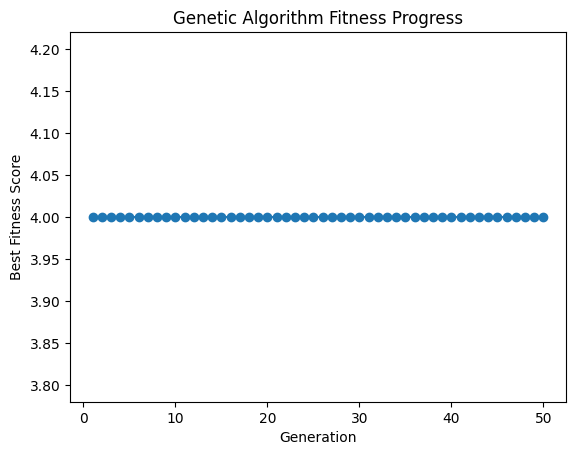

Optimal path from Car-33 to BS-2: ['Car-33', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


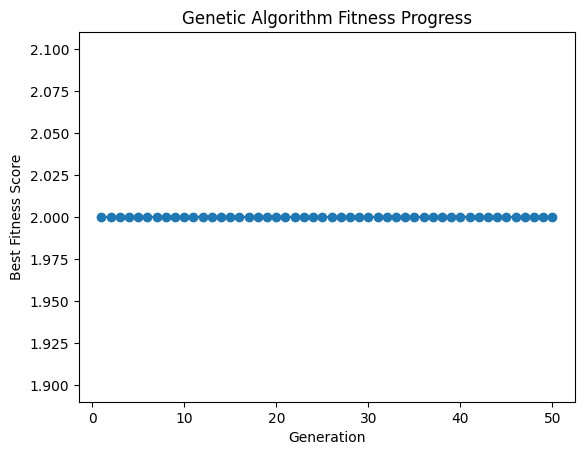

Optimal path from Car-34 to BS-1: ['Car-34', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


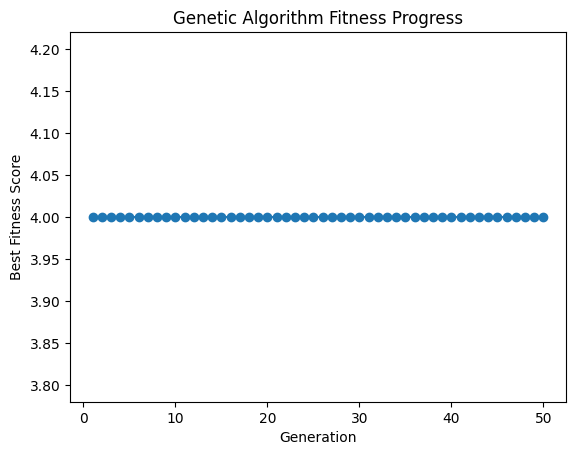

Optimal path from Car-34 to BS-2: ['Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


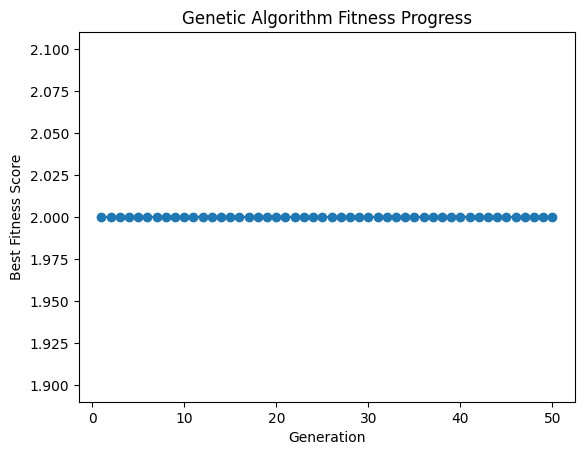

Optimal path from Car-35 to BS-1: ['Car-35', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


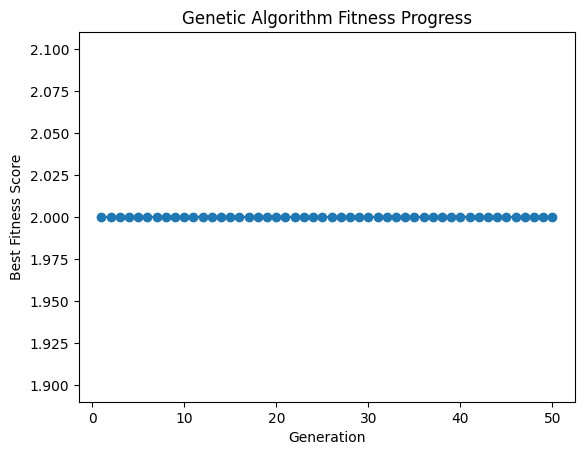

Optimal path from Car-35 to BS-2: ['Car-35', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


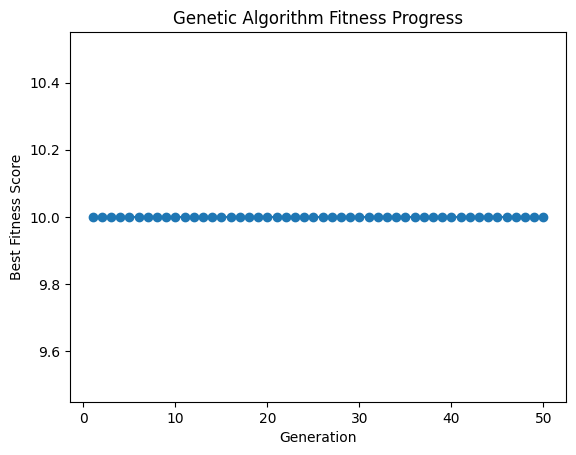

Optimal path from Car-36 to BS-1: ['Car-36', 'Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


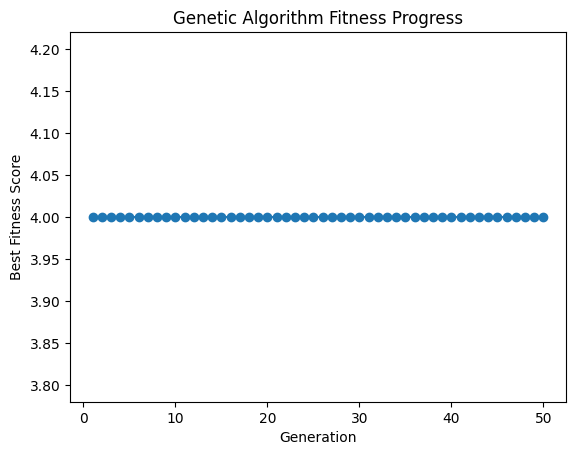

Optimal path from Car-36 to BS-2: ['Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


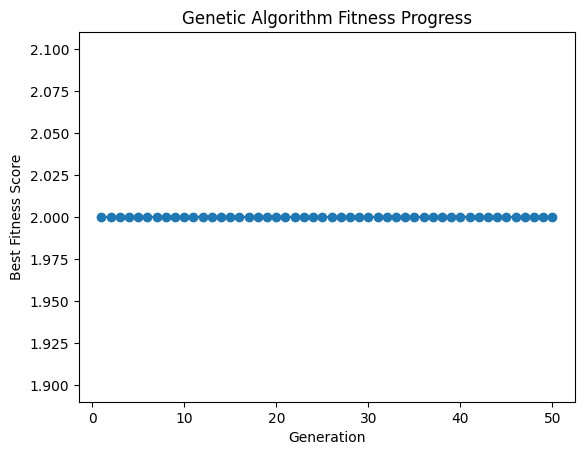

Optimal path from Car-37 to BS-1: ['Car-37', 'Car-76', 'Car-74', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


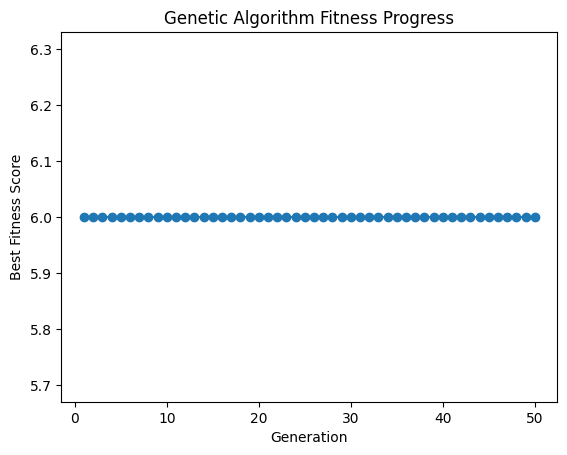

Optimal path from Car-37 to BS-2: ['Car-37', 'Car-41', 'Car-42', 'Car-47', 'Car-96', 'BS-2']


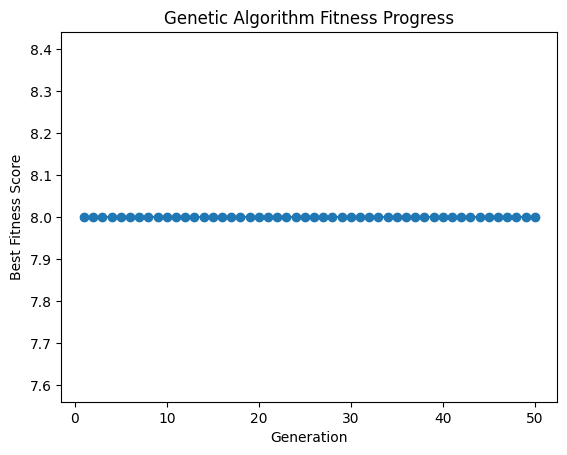

Optimal path from Car-38 to BS-1: ['Car-38', 'Car-34', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


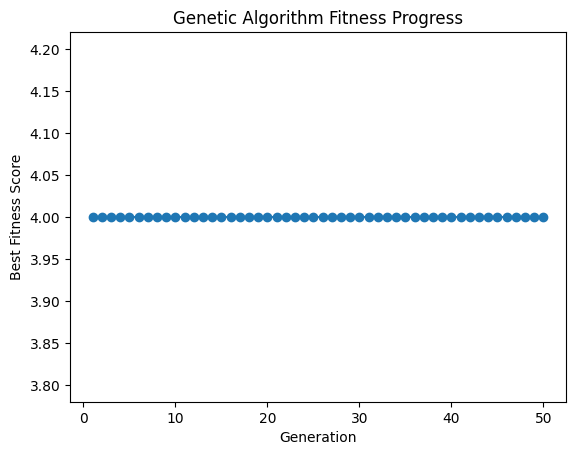

Optimal path from Car-38 to BS-2: ['Car-38', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


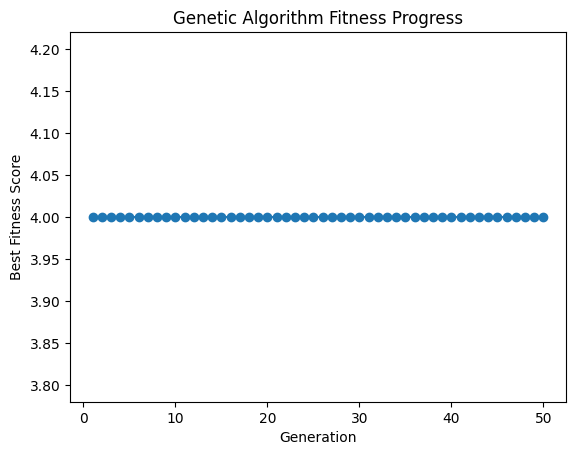

Optimal path from Car-39 to BS-1: ['Car-39', 'Car-37', 'Car-76', 'Car-74', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


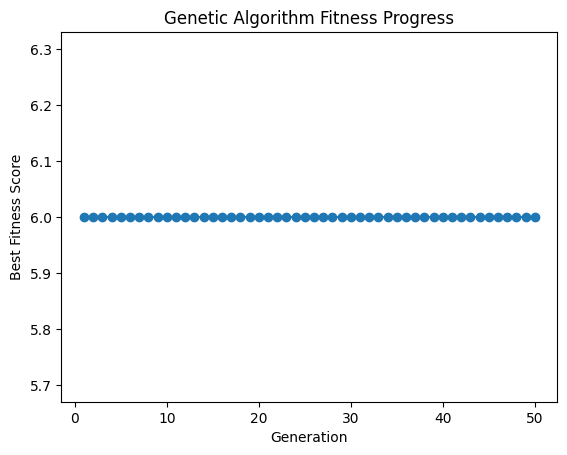

Optimal path from Car-39 to BS-2: ['Car-39', 'Car-42', 'Car-47', 'Car-96', 'BS-2']


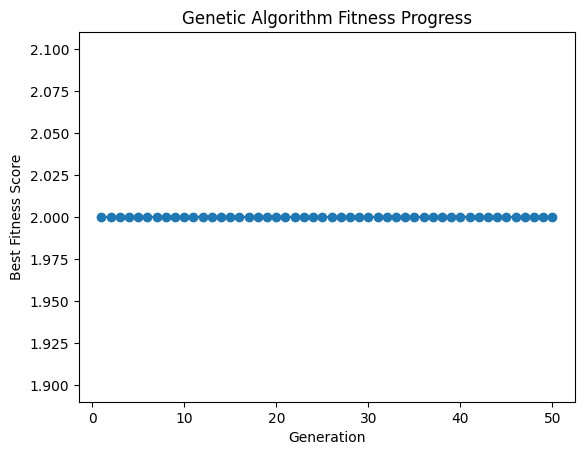

Optimal path from Car-40 to BS-1: ['Car-40', 'Car-83', 'Car-36', 'Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


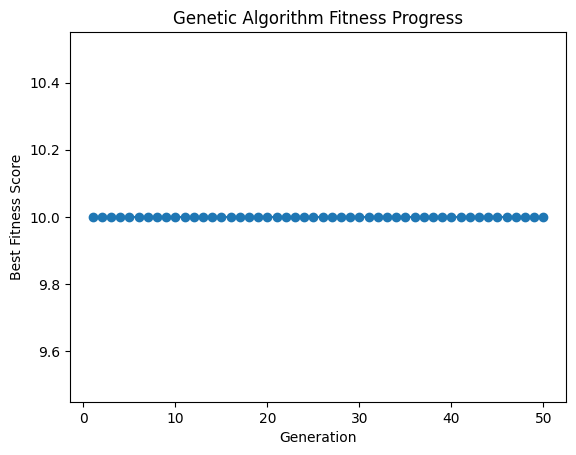

Optimal path from Car-40 to BS-2: ['Car-40', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


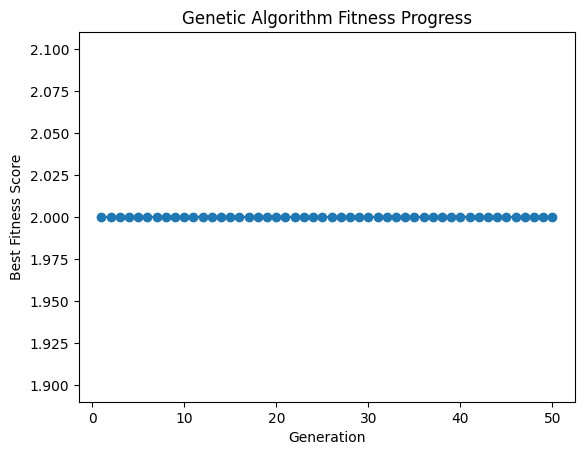

Optimal path from Car-41 to BS-1: ['Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


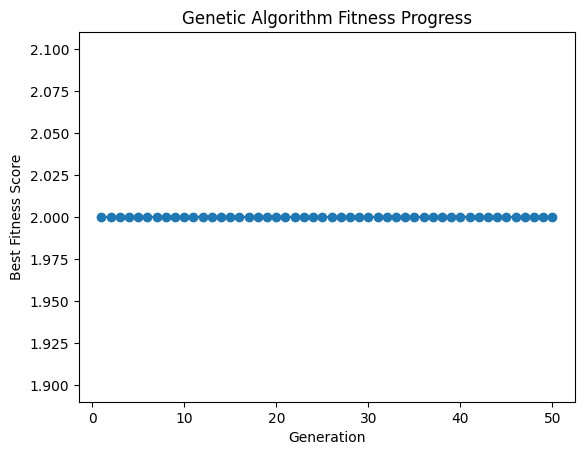

Optimal path from Car-41 to BS-2: ['Car-41', 'Car-42', 'Car-47', 'Car-96', 'BS-2']


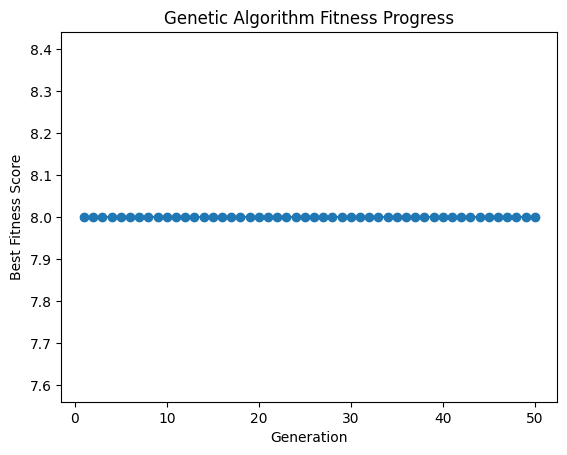

Optimal path from Car-42 to BS-1: ['Car-42', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


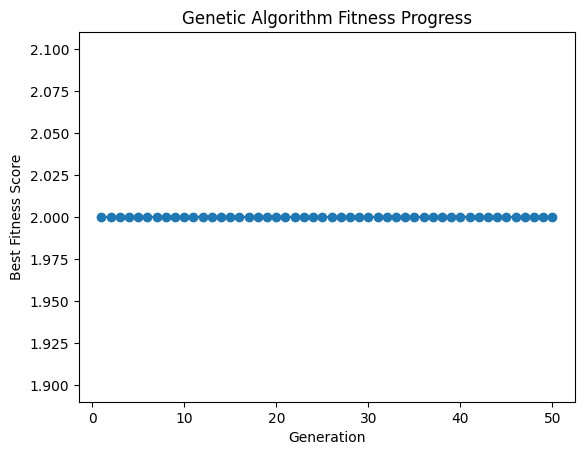

Optimal path from Car-42 to BS-2: ['Car-42', 'Car-47', 'Car-96', 'BS-2']


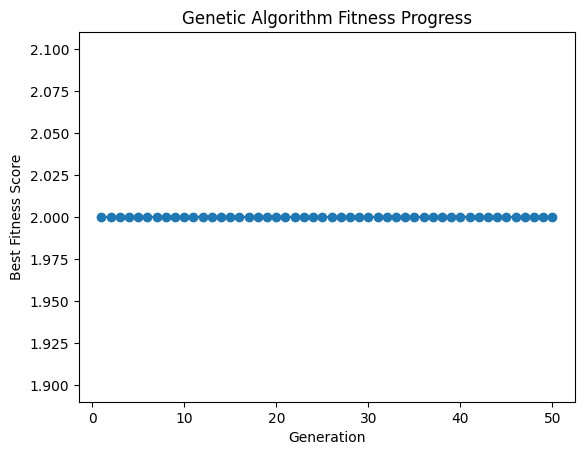

Optimal path from Car-43 to BS-1: ['Car-43', 'Car-83', 'Car-36', 'Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


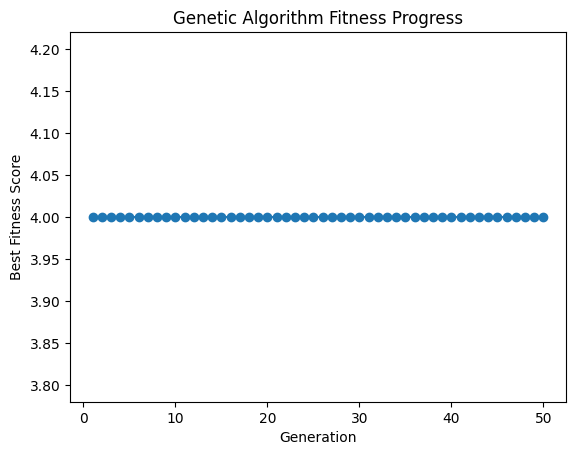

Optimal path from Car-43 to BS-2: ['Car-43', 'Car-46', 'Car-93', 'BS-2']


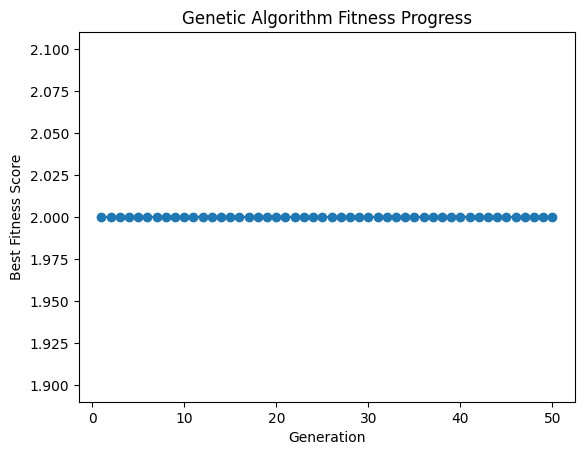

Optimal path from Car-44 to BS-1: ['Car-44', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


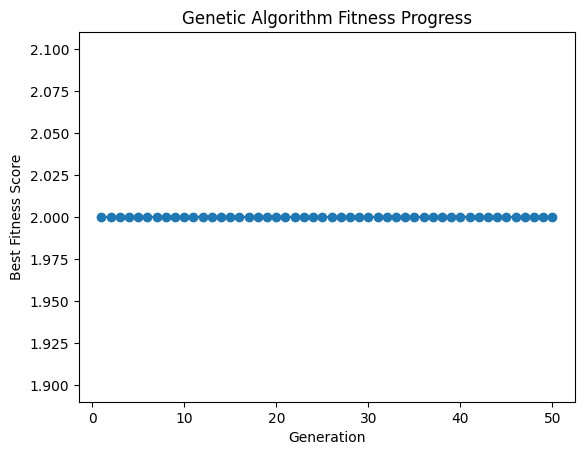

Optimal path from Car-44 to BS-2: ['Car-44', 'Car-91', 'Car-96', 'BS-2']


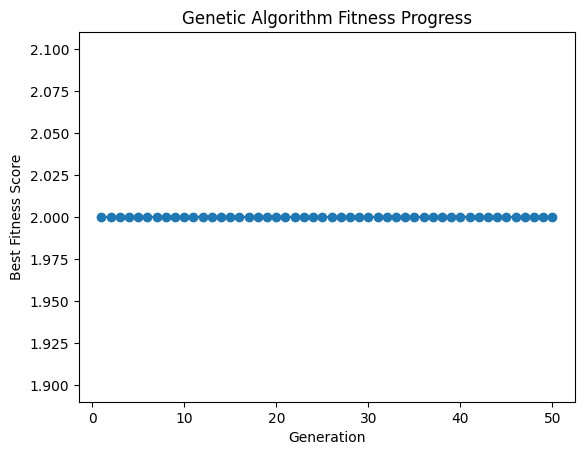

Optimal path from Car-45 to BS-1: ['Car-45', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


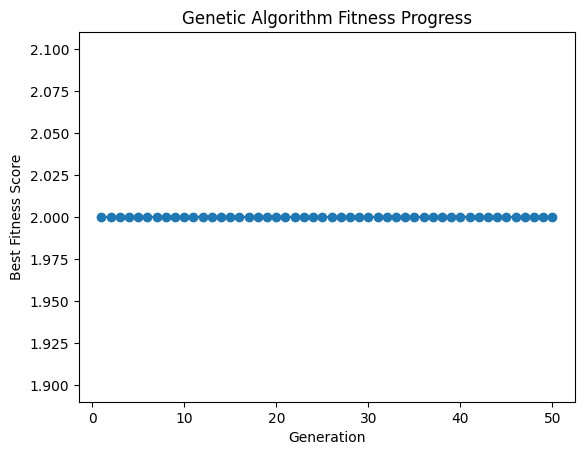

Optimal path from Car-45 to BS-2: ['Car-45', 'Car-93', 'BS-2']


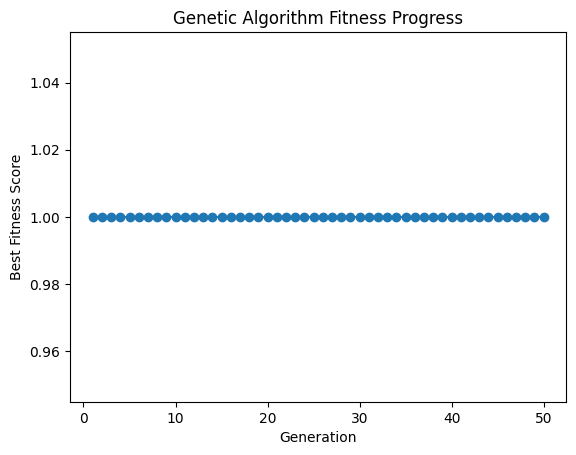

Optimal path from Car-46 to BS-1: ['Car-46', 'Car-43', 'Car-83', 'Car-36', 'Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


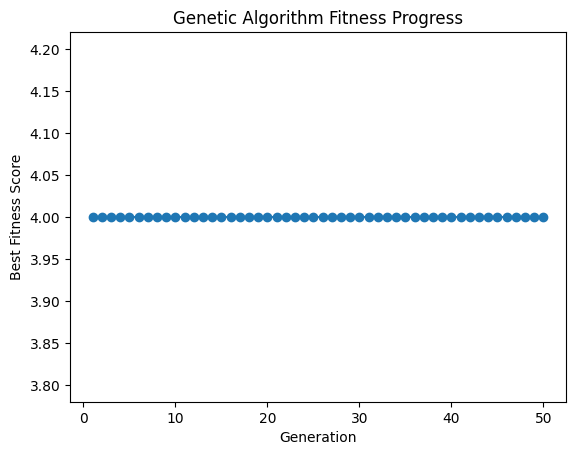

Optimal path from Car-46 to BS-2: ['Car-46', 'Car-93', 'BS-2']


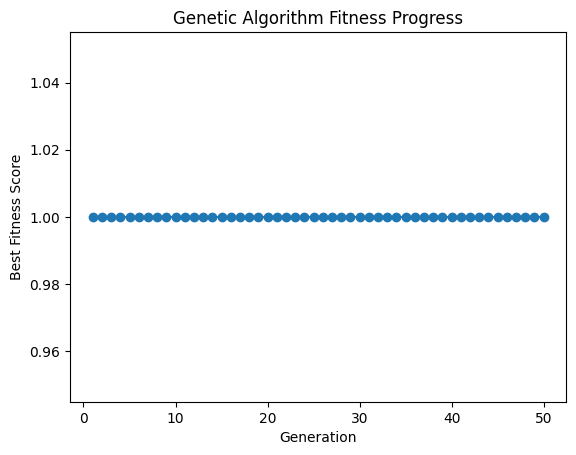

Optimal path from Car-47 to BS-1: ['Car-47', 'Car-42', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


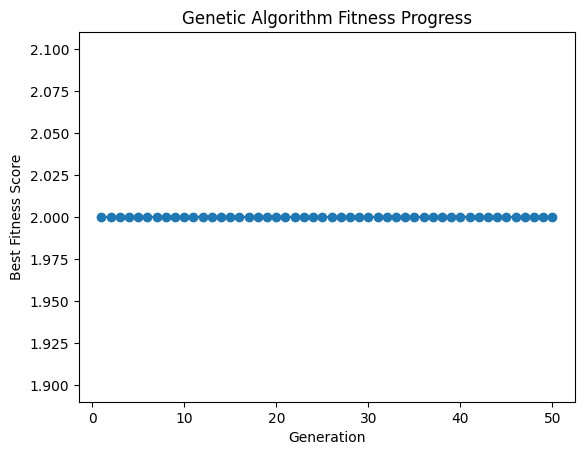

Optimal path from Car-47 to BS-2: ['Car-47', 'Car-96', 'BS-2']


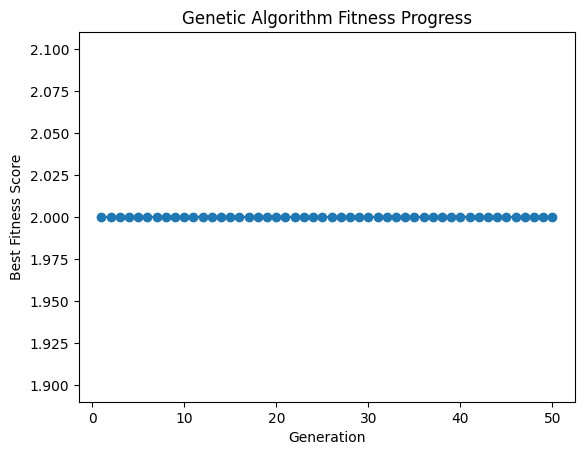

Optimal path from Car-48 to BS-1: ['Car-48', 'Car-87', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


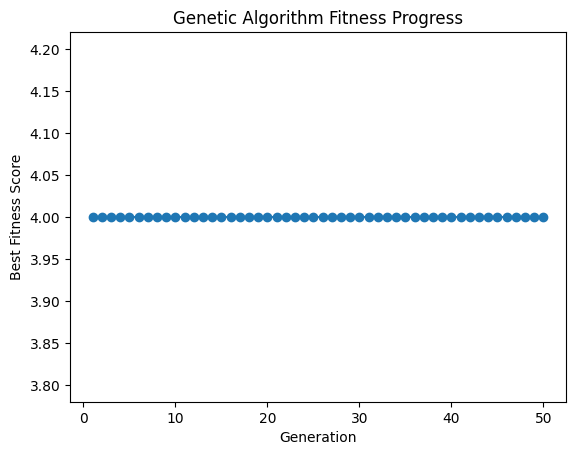

Optimal path from Car-48 to BS-2: ['Car-48', 'Car-50', 'BS-2']


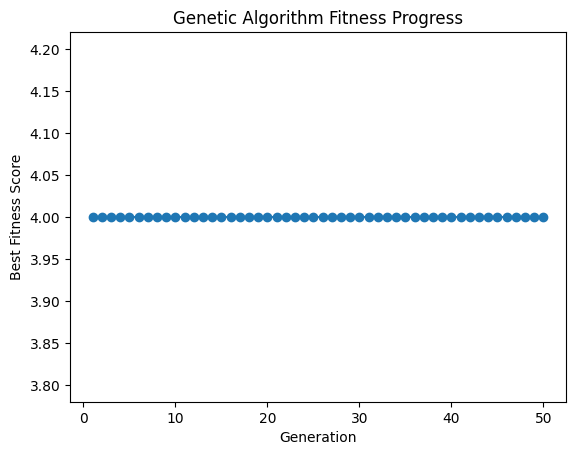

Optimal path from Car-49 to BS-1: ['Car-49', 'Car-47', 'Car-42', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


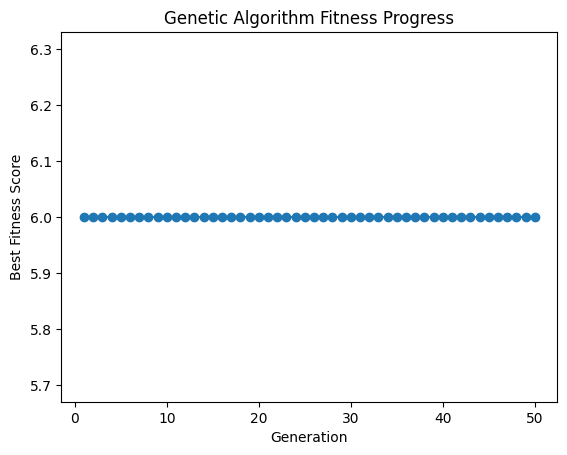

Optimal path from Car-49 to BS-2: ['Car-49', 'Car-96', 'BS-2']


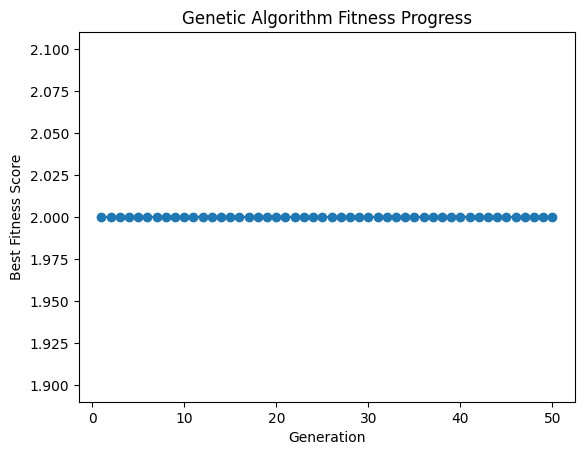

Optimal path from Car-50 to BS-1: ['Car-50', 'Car-89', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


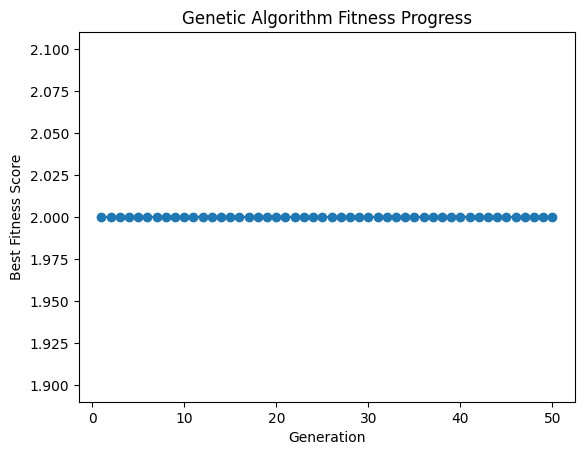

Optimal path from Car-50 to BS-2: ['Car-50', 'BS-2']


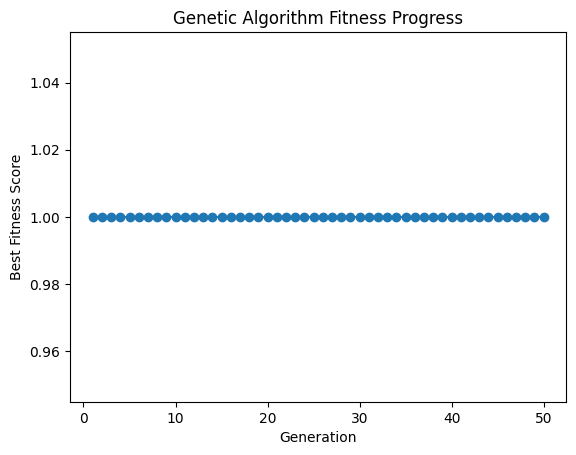

Optimal path from Car-51 to BS-1: ['Car-51', 'BS-1']


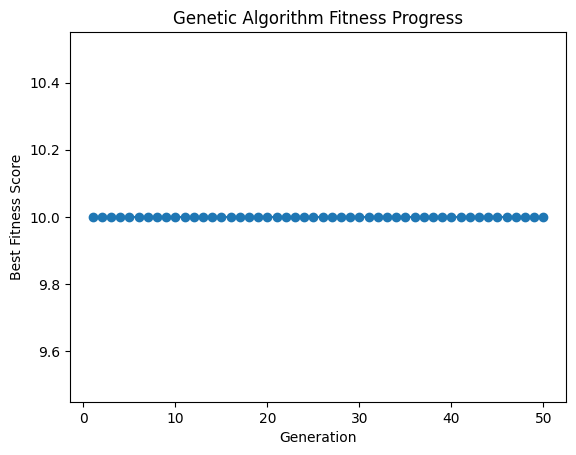

Optimal path from Car-51 to BS-2: ['Car-51', 'Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


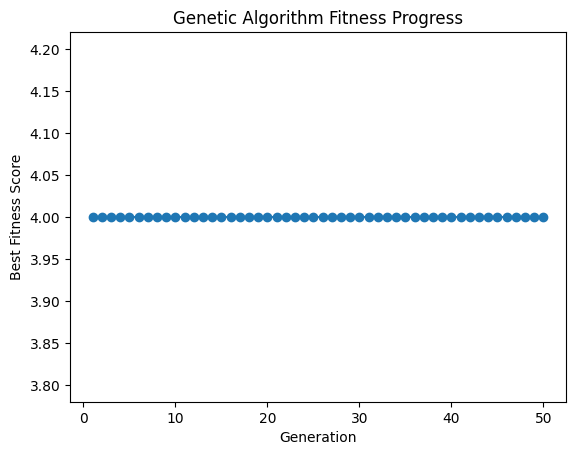

Optimal path from Car-52 to BS-1: ['Car-52', 'BS-1']


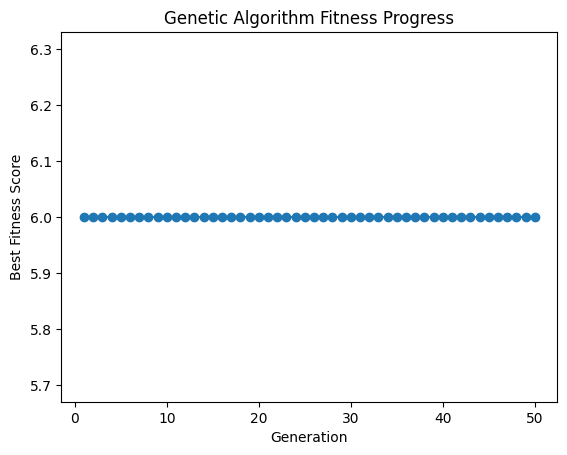

Optimal path from Car-52 to BS-2: ['Car-52', 'Car-56', 'Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


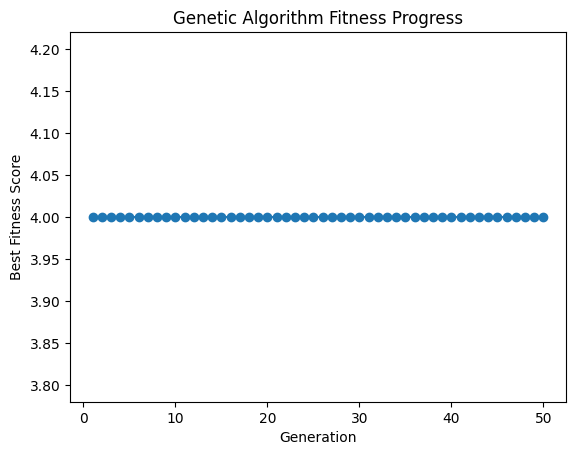

Optimal path from Car-53 to BS-1: ['Car-53', 'BS-1']


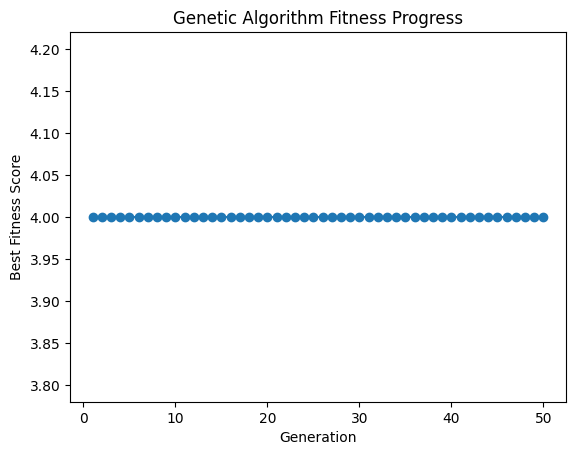

Optimal path from Car-53 to BS-2: ['Car-53', 'Car-5', 'Car-11', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


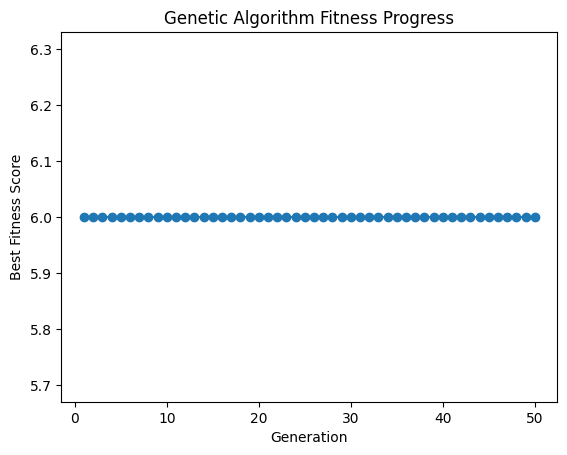

Optimal path from Car-54 to BS-1: ['Car-54', 'BS-1']


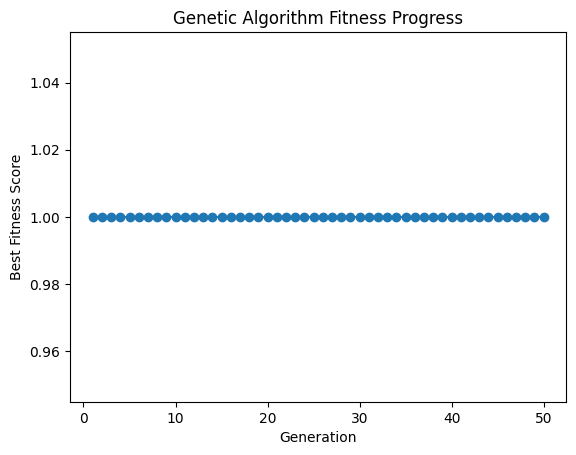

Optimal path from Car-54 to BS-2: ['Car-54', 'Car-57', 'Car-19', 'Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


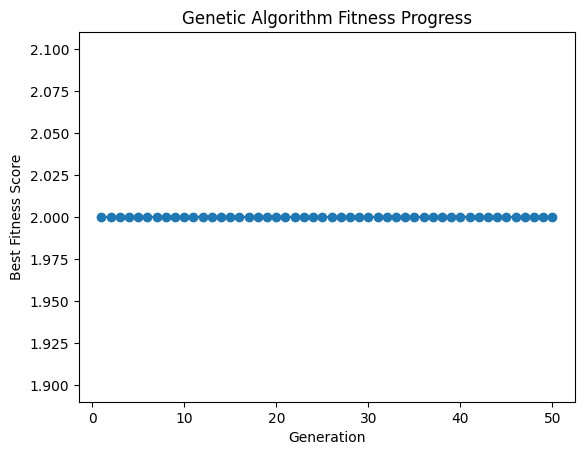

Optimal path from Car-55 to BS-1: ['Car-55', 'Car-3', 'BS-1']


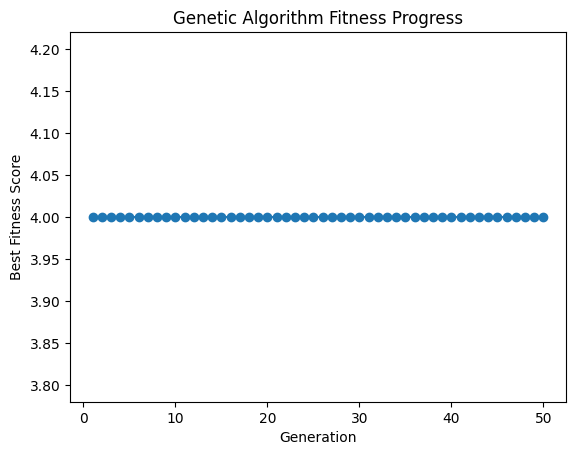

Optimal path from Car-55 to BS-2: ['Car-55', 'Car-15', 'Car-60', 'Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


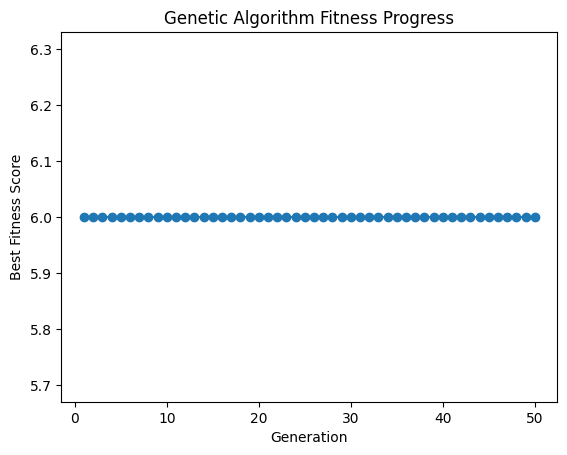

Optimal path from Car-56 to BS-1: ['Car-56', 'Car-7', 'BS-1']


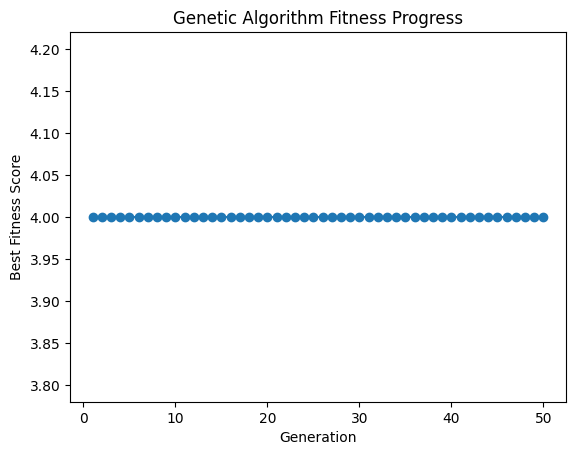

Optimal path from Car-56 to BS-2: ['Car-56', 'Car-13', 'Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


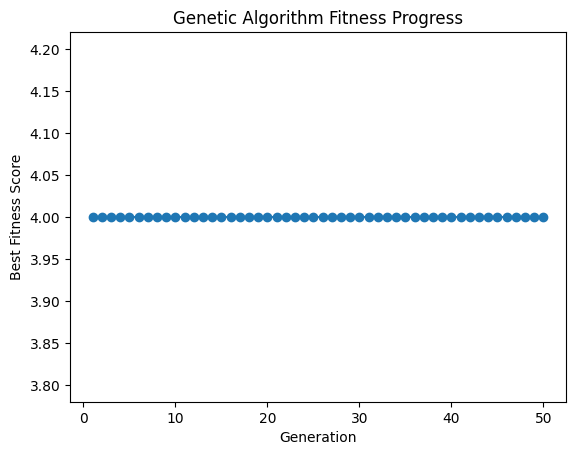

Optimal path from Car-57 to BS-1: ['Car-57', 'Car-54', 'BS-1']


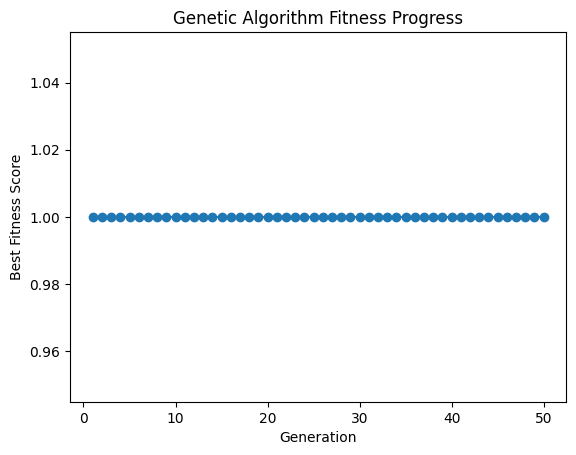

Optimal path from Car-57 to BS-2: ['Car-57', 'Car-19', 'Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


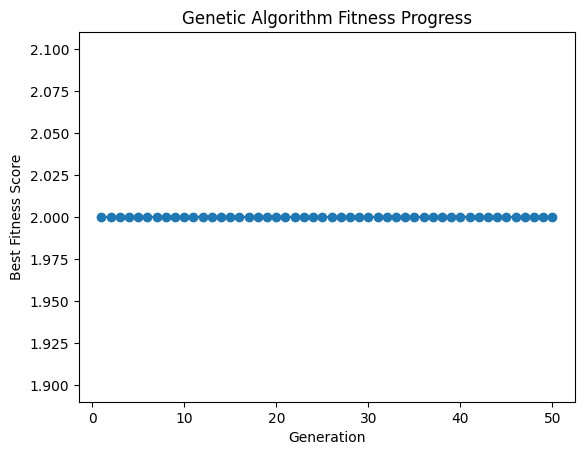

Optimal path from Car-58 to BS-1: ['Car-58', 'Car-54', 'BS-1']


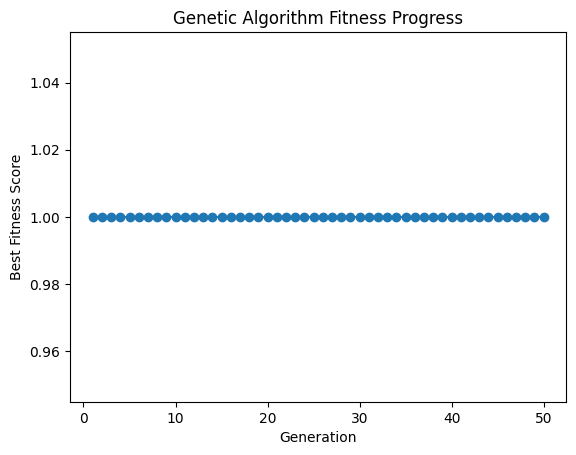

Optimal path from Car-58 to BS-2: ['Car-58', 'Car-19', 'Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


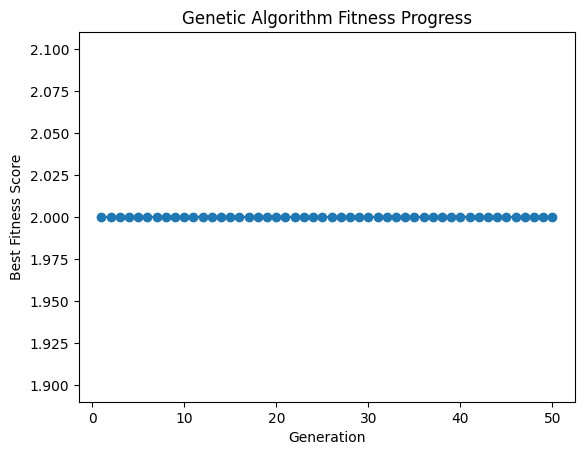

Optimal path from Car-59 to BS-1: ['Car-59', 'Car-56', 'Car-7', 'BS-1']


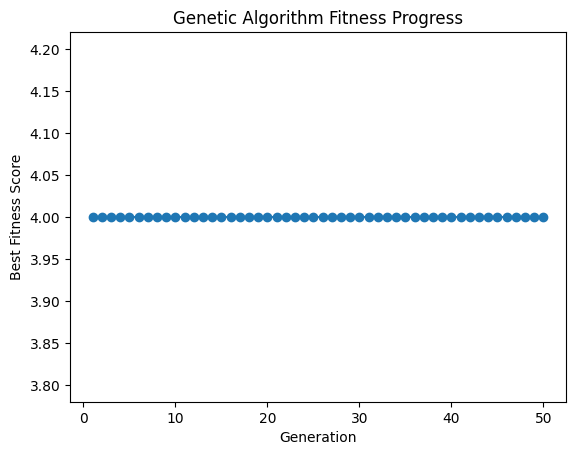

Optimal path from Car-59 to BS-2: ['Car-59', 'Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


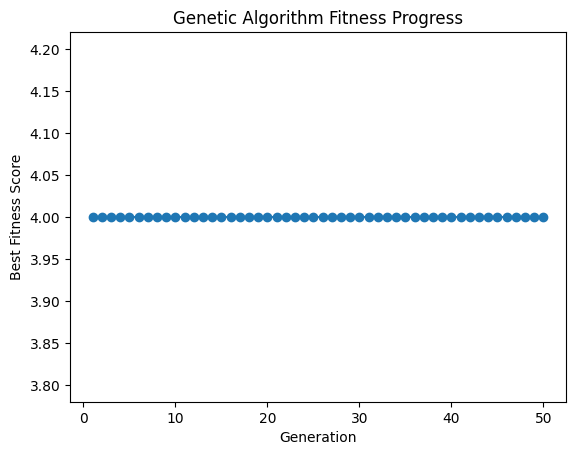

Optimal path from Car-60 to BS-1: ['Car-60', 'Car-56', 'Car-7', 'BS-1']


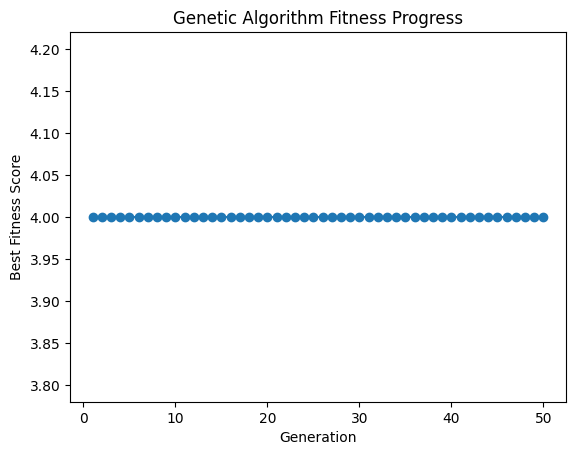

Optimal path from Car-60 to BS-2: ['Car-60', 'Car-22', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


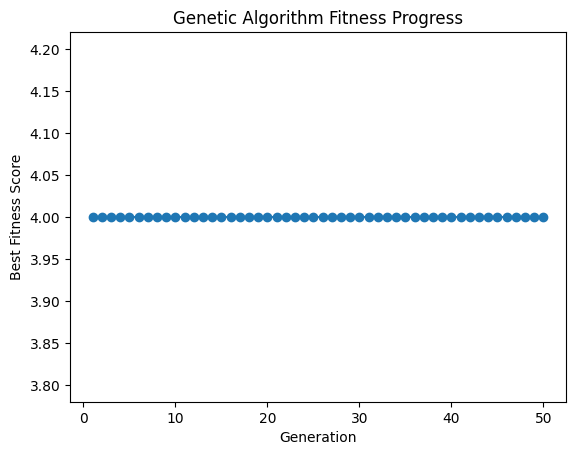

Optimal path from Car-61 to BS-1: ['Car-61', 'Car-57', 'Car-54', 'BS-1']


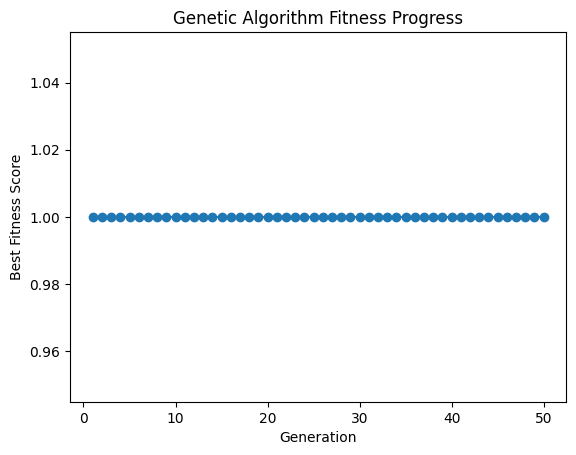

Optimal path from Car-61 to BS-2: ['Car-61', 'Car-21', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


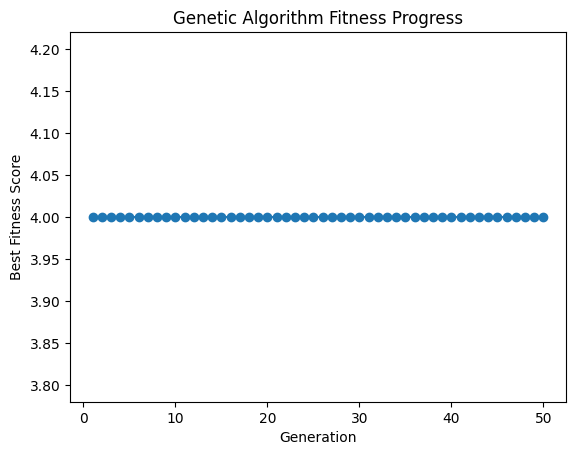

Optimal path from Car-62 to BS-1: ['Car-62', 'Car-14', 'Car-54', 'BS-1']


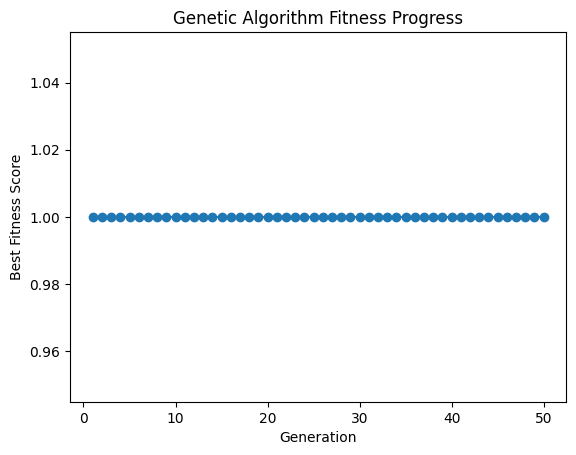

Optimal path from Car-62 to BS-2: ['Car-62', 'Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


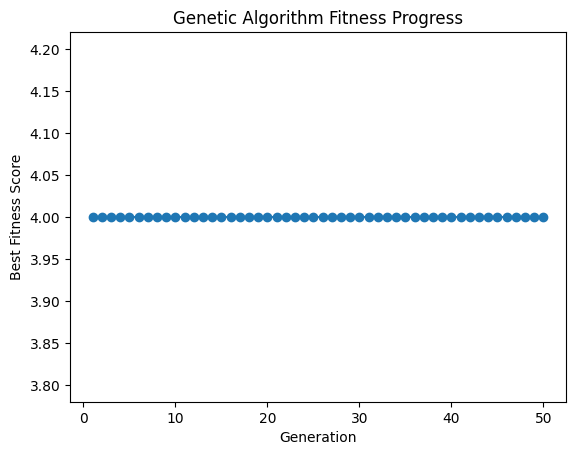

Optimal path from Car-63 to BS-1: ['Car-63', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


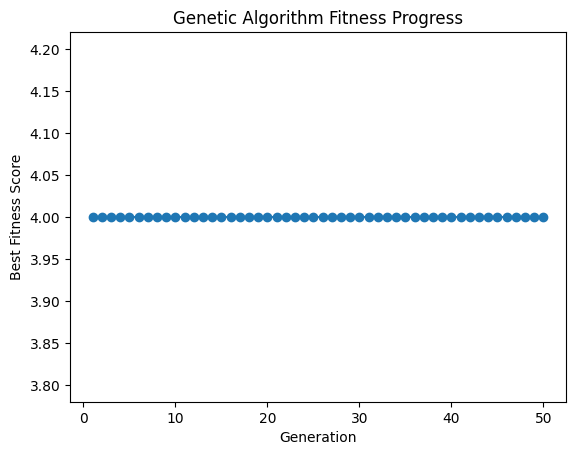

Optimal path from Car-63 to BS-2: ['Car-63', 'Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


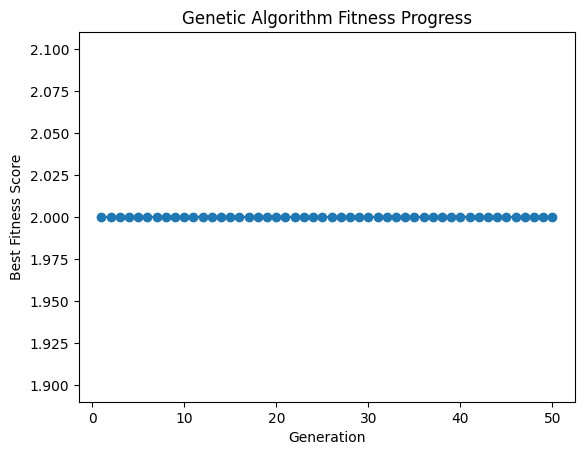

Optimal path from Car-64 to BS-1: ['Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


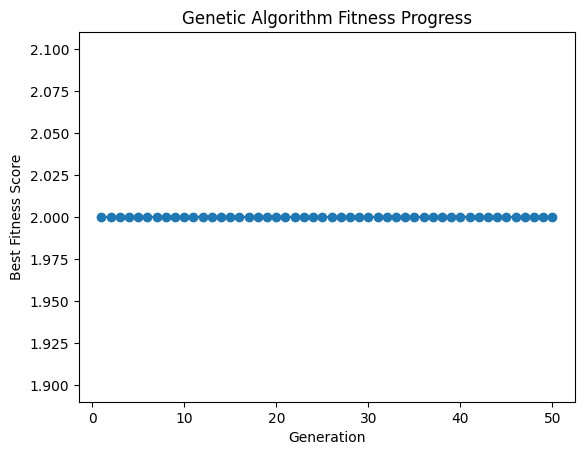

Optimal path from Car-64 to BS-2: ['Car-64', 'Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


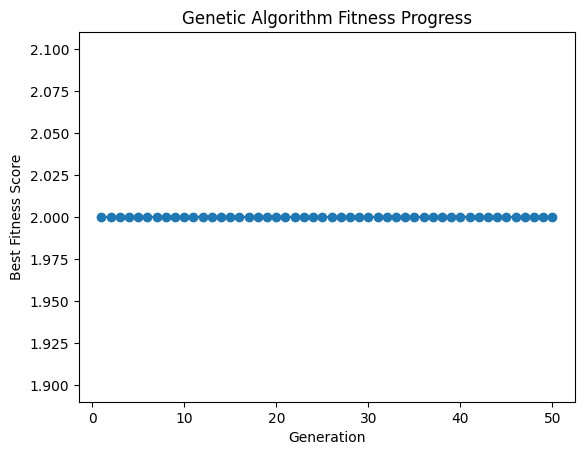

Optimal path from Car-65 to BS-1: ['Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


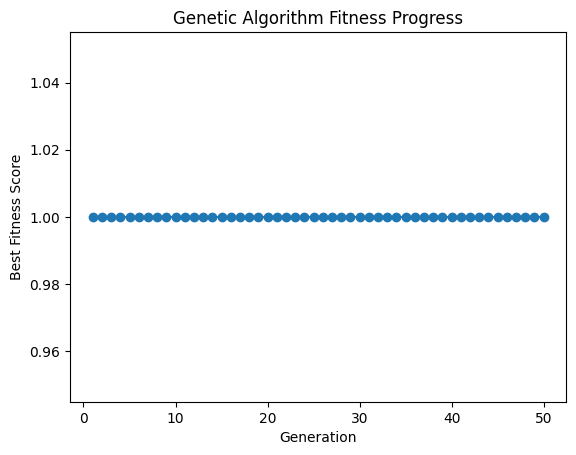

Optimal path from Car-65 to BS-2: ['Car-65', 'Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


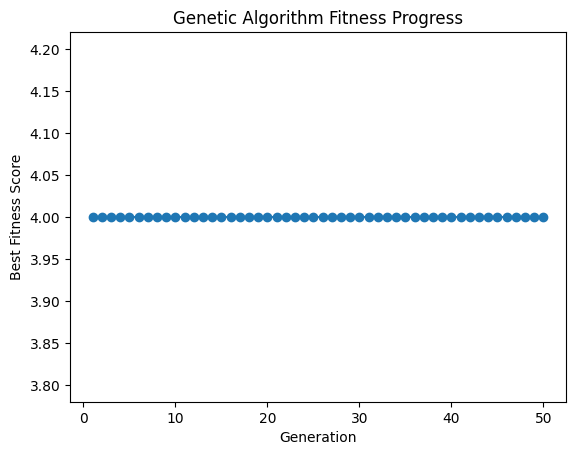

Optimal path from Car-66 to BS-1: ['Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


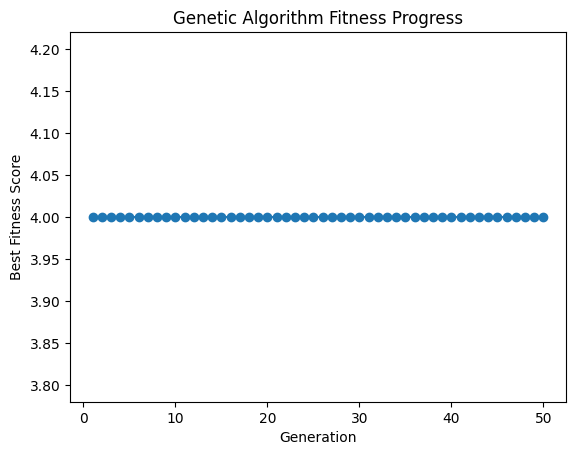

Optimal path from Car-66 to BS-2: ['Car-66', 'Car-30', 'Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


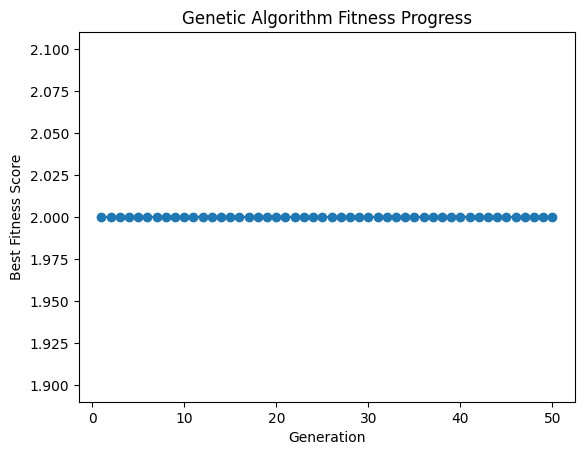

Optimal path from Car-67 to BS-1: ['Car-67', 'Car-22', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


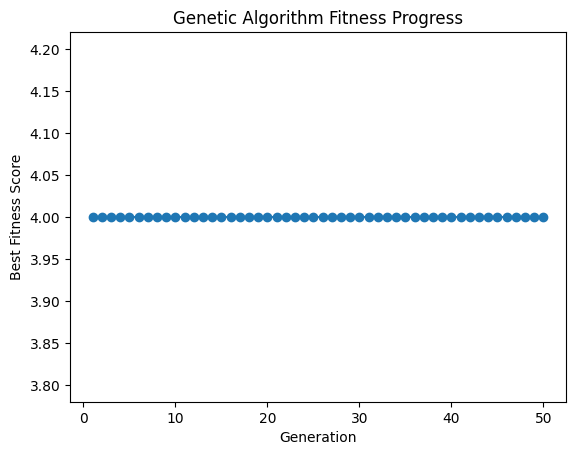

Optimal path from Car-67 to BS-2: ['Car-67', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


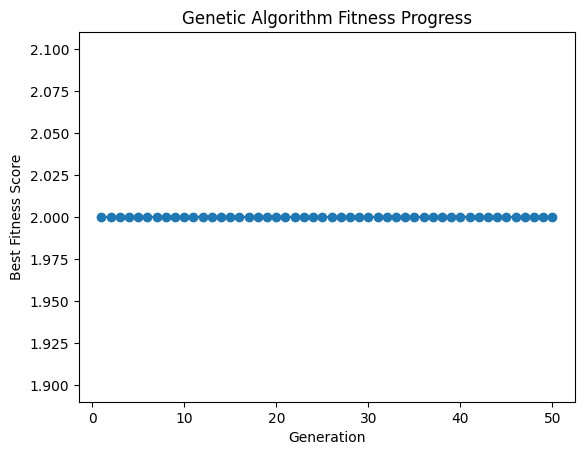

Optimal path from Car-68 to BS-1: ['Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


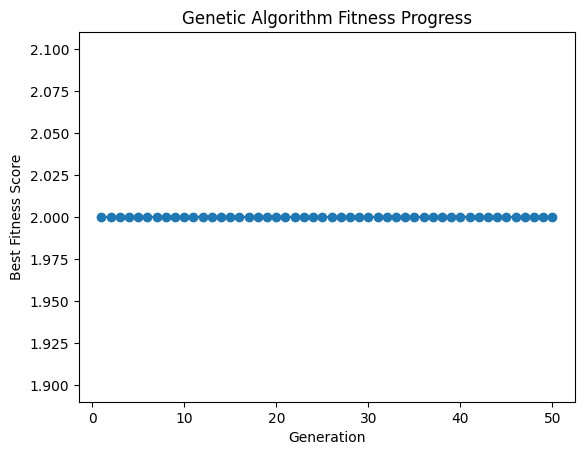

Optimal path from Car-68 to BS-2: ['Car-68', 'Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


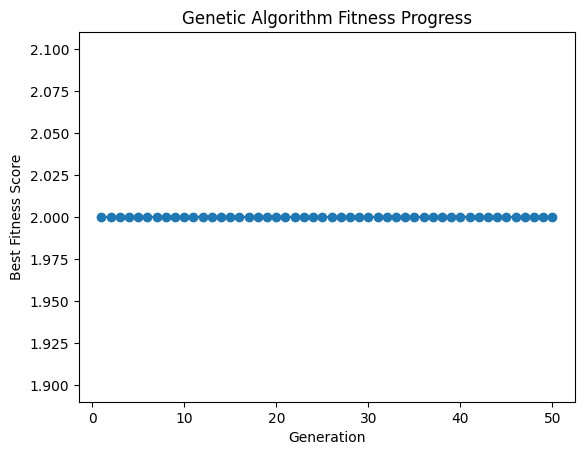

Optimal path from Car-69 to BS-1: ['Car-69', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


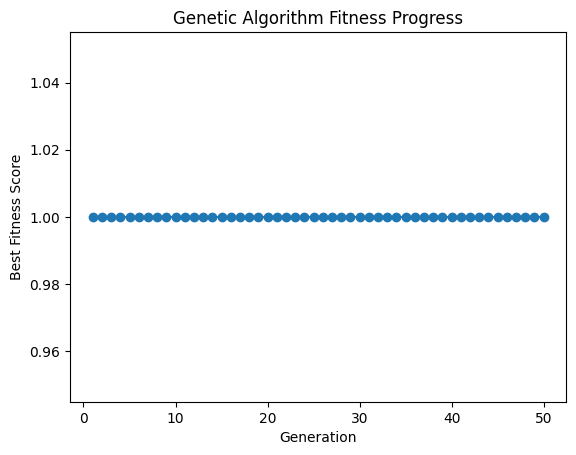

Optimal path from Car-69 to BS-2: ['Car-69', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


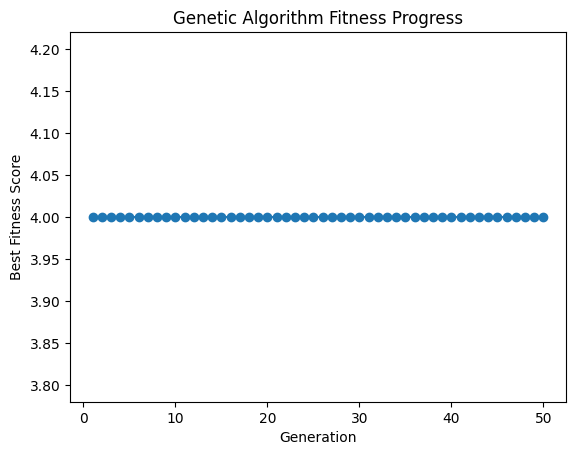

Optimal path from Car-70 to BS-1: ['Car-70', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


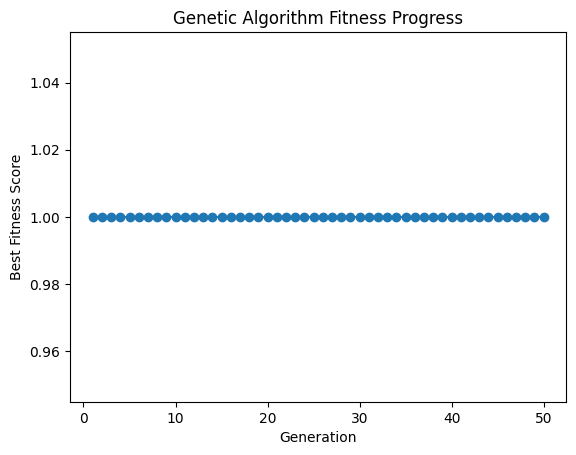

Optimal path from Car-70 to BS-2: ['Car-70', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


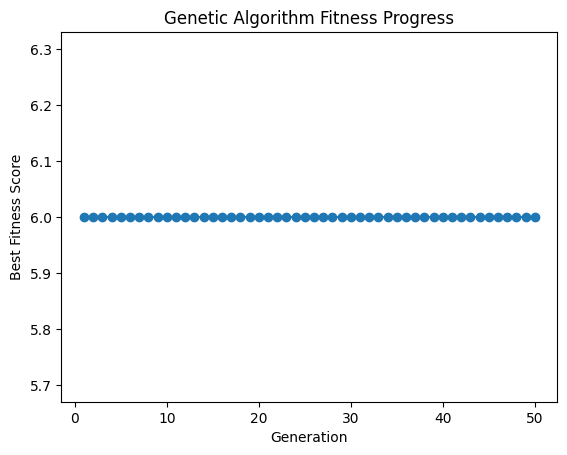

Optimal path from Car-71 to BS-1: ['Car-71', 'Car-65', 'Car-62', 'Car-14', 'Car-54', 'BS-1']


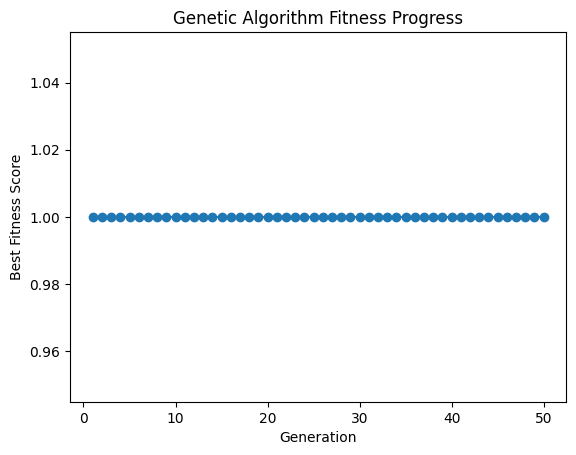

Optimal path from Car-71 to BS-2: ['Car-71', 'Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


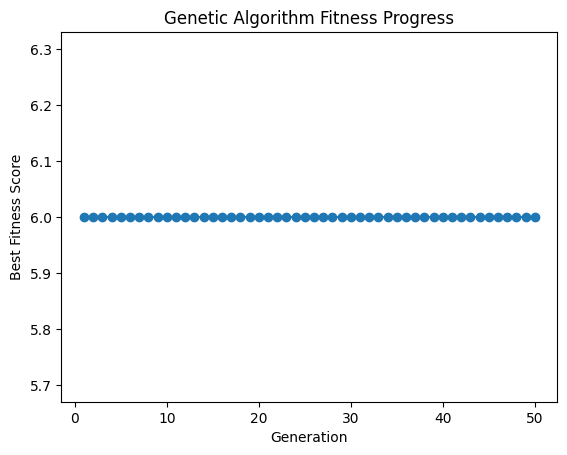

Optimal path from Car-72 to BS-1: ['Car-72', 'Car-29', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


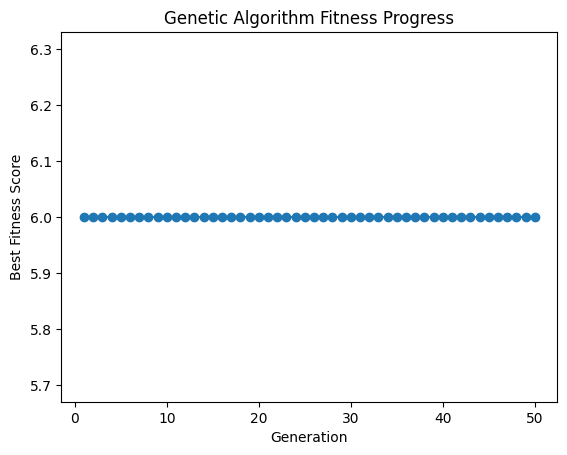

Optimal path from Car-72 to BS-2: ['Car-72', 'Car-34', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


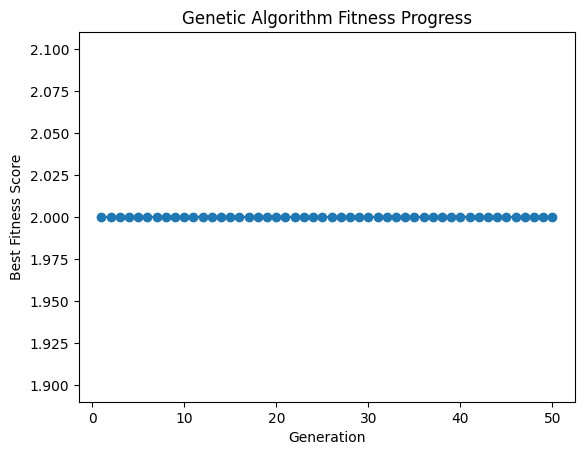

Optimal path from Car-73 to BS-1: ['Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


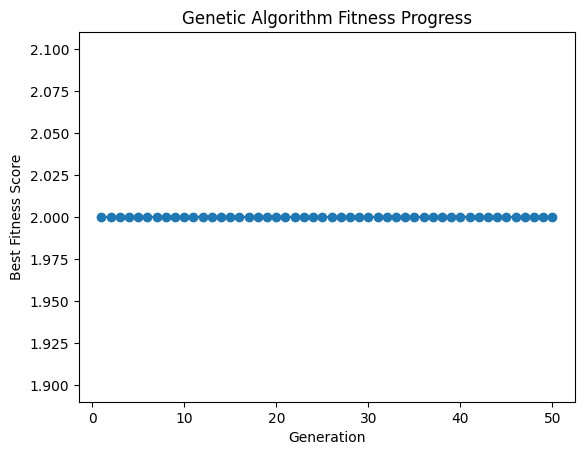

Optimal path from Car-73 to BS-2: ['Car-73', 'Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


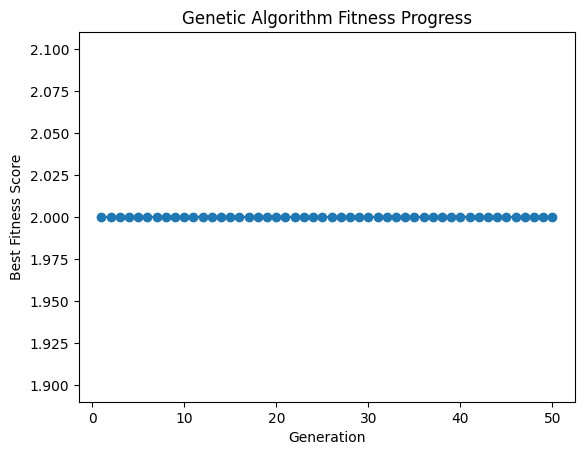

Optimal path from Car-74 to BS-1: ['Car-74', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


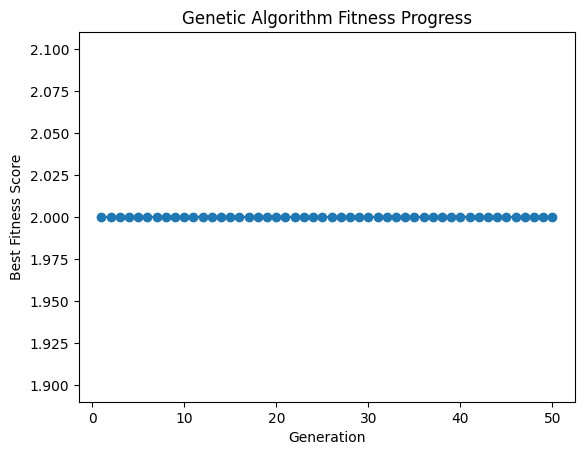

Optimal path from Car-74 to BS-2: ['Car-74', 'Car-76', 'Car-37', 'Car-41', 'Car-42', 'Car-47', 'Car-96', 'BS-2']


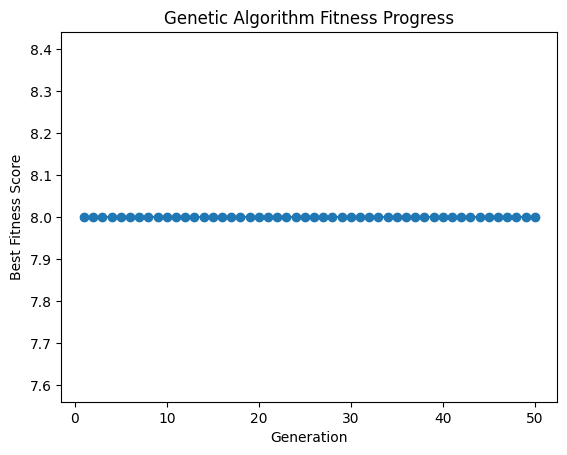

Optimal path from Car-75 to BS-1: ['Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


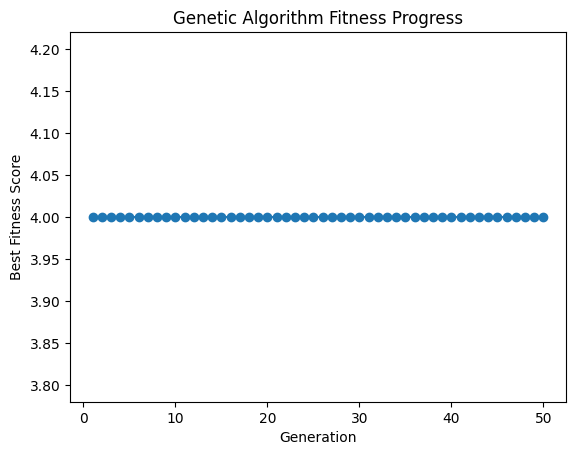

Optimal path from Car-75 to BS-2: ['Car-75', 'Car-36', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


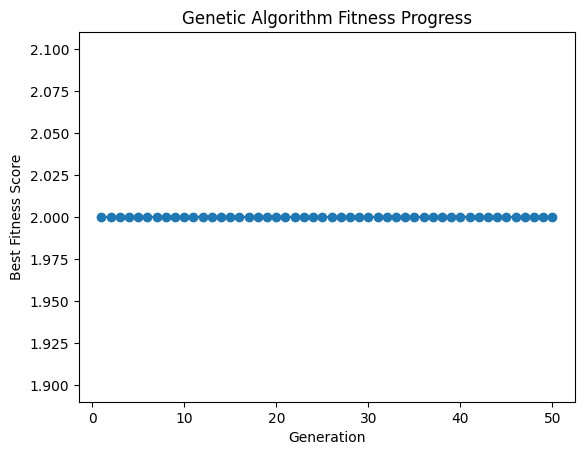

Optimal path from Car-76 to BS-1: ['Car-76', 'Car-74', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


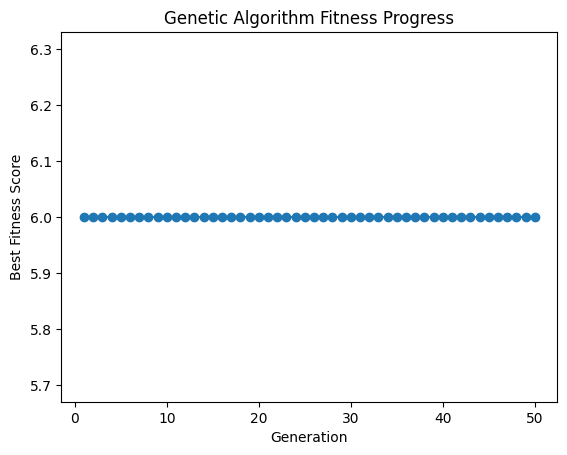

Optimal path from Car-76 to BS-2: ['Car-76', 'Car-37', 'Car-41', 'Car-42', 'Car-47', 'Car-96', 'BS-2']


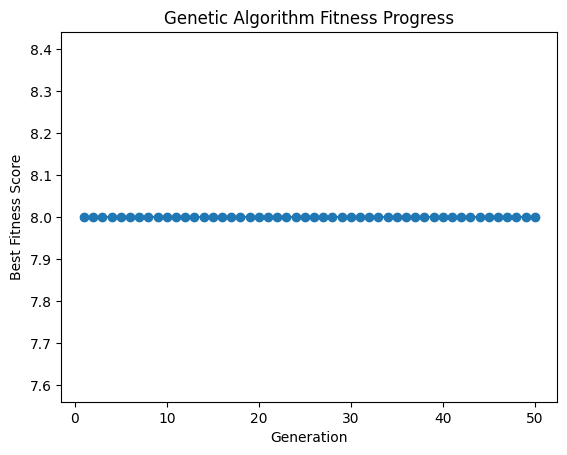

Optimal path from Car-77 to BS-1: ['Car-77', 'Car-34', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


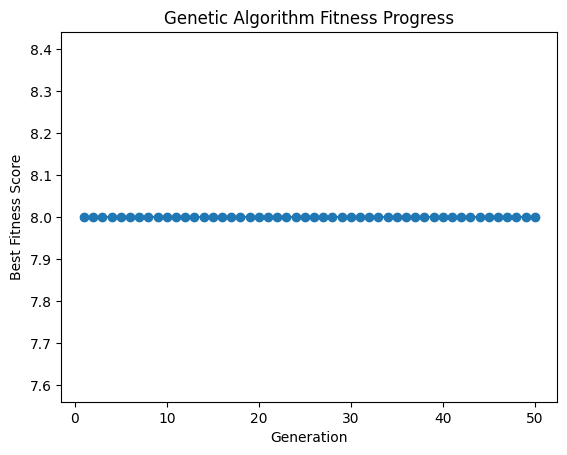

Optimal path from Car-77 to BS-2: ['Car-77', 'Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


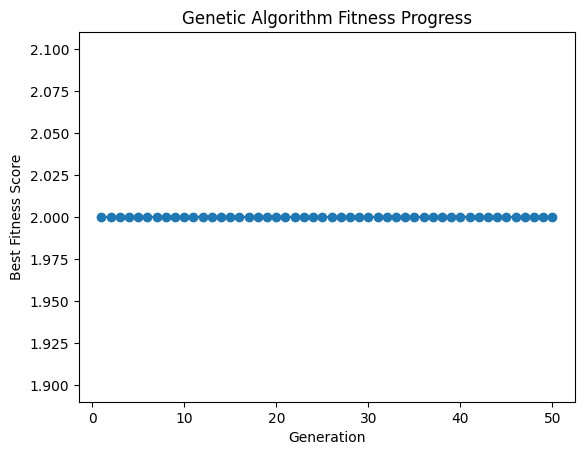

Optimal path from Car-78 to BS-1: ['Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


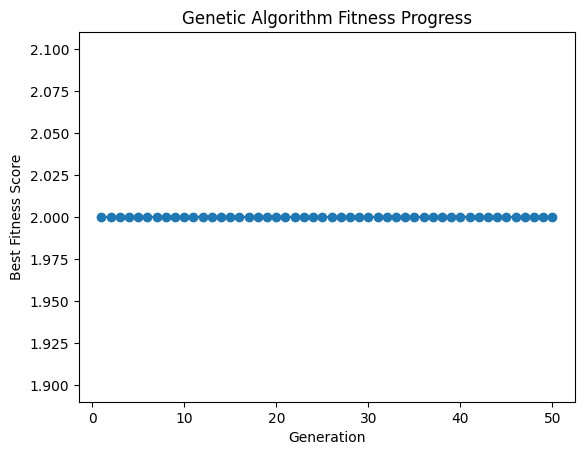

Optimal path from Car-78 to BS-2: ['Car-78', 'Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


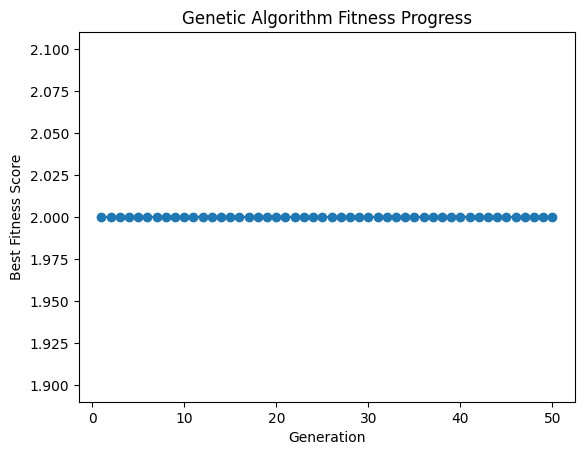

Optimal path from Car-79 to BS-1: ['Car-79', 'Car-34', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


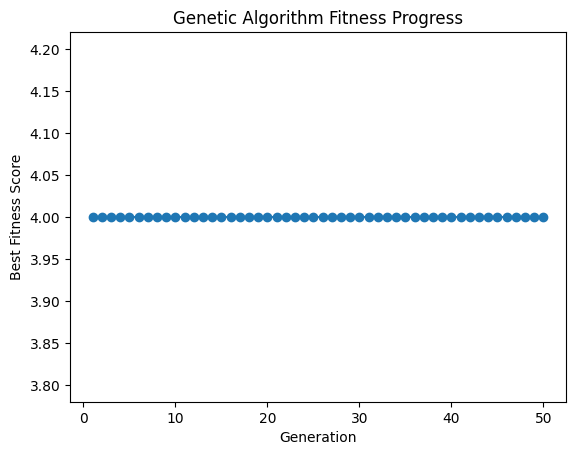

Optimal path from Car-79 to BS-2: ['Car-79', 'Car-40', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


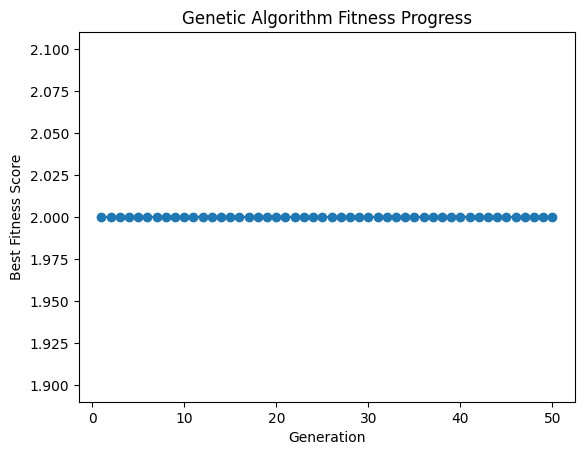

Optimal path from Car-80 to BS-1: ['Car-80', 'Car-34', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


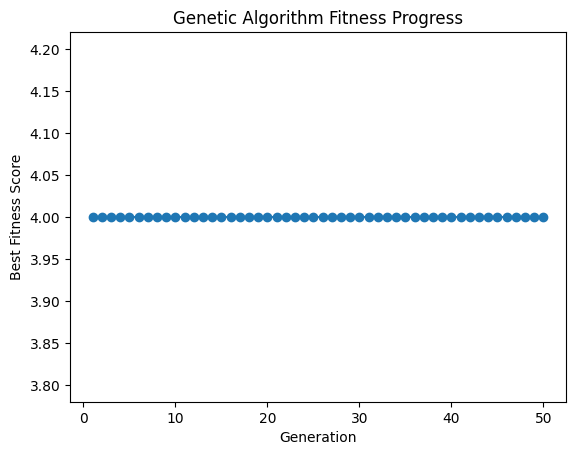

Optimal path from Car-80 to BS-2: ['Car-80', 'Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


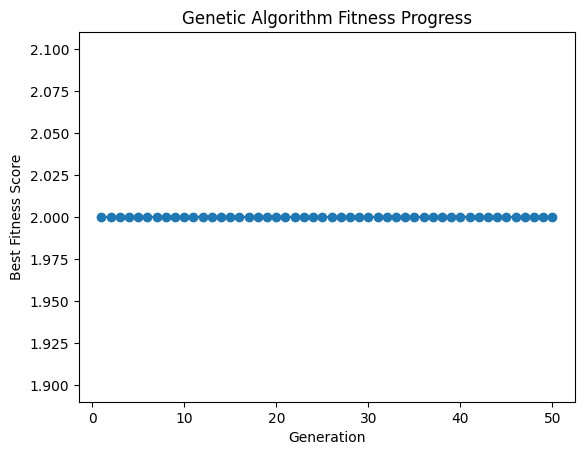

Optimal path from Car-81 to BS-1: ['Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


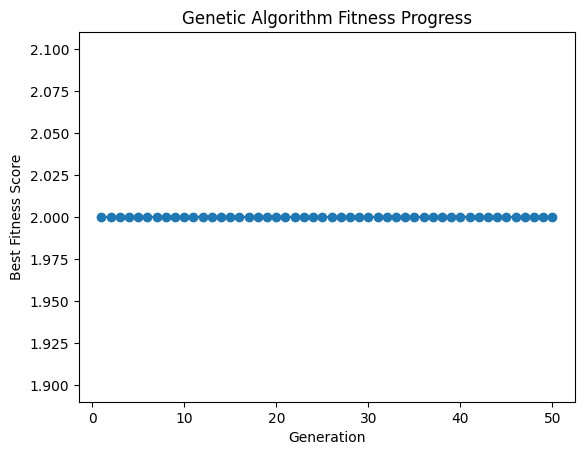

Optimal path from Car-81 to BS-2: ['Car-81', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


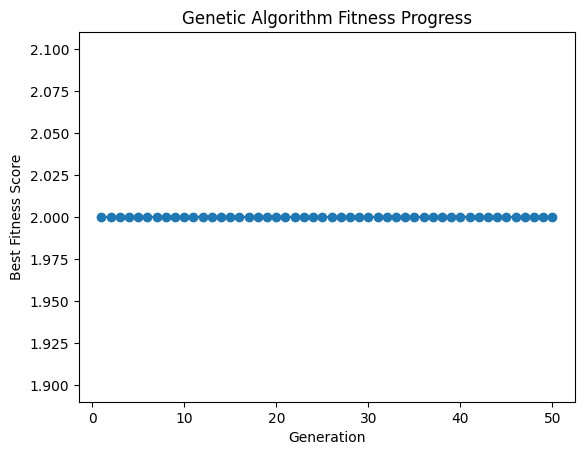

Optimal path from Car-82 to BS-1: ['Car-82', 'Car-37', 'Car-76', 'Car-74', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


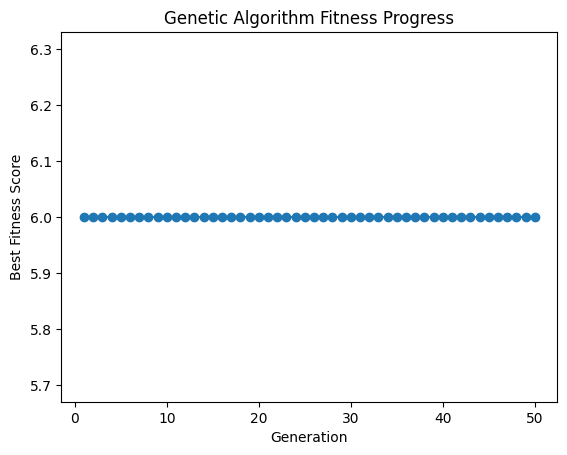

Optimal path from Car-82 to BS-2: ['Car-82', 'Car-87', 'Car-49', 'Car-96', 'BS-2']


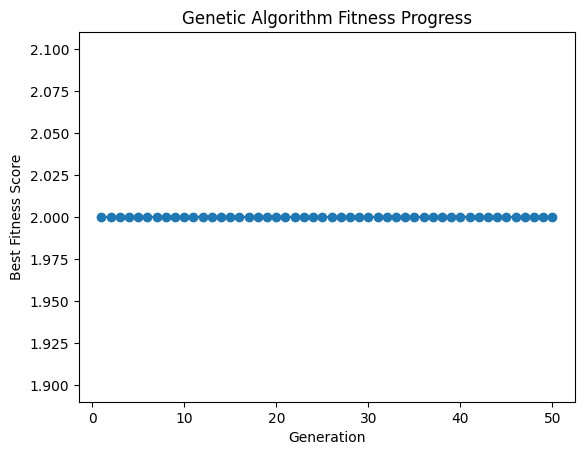

Optimal path from Car-83 to BS-1: ['Car-83', 'Car-36', 'Car-75', 'Car-30', 'Car-66', 'Car-21', 'Car-61', 'Car-57', 'Car-54', 'BS-1']


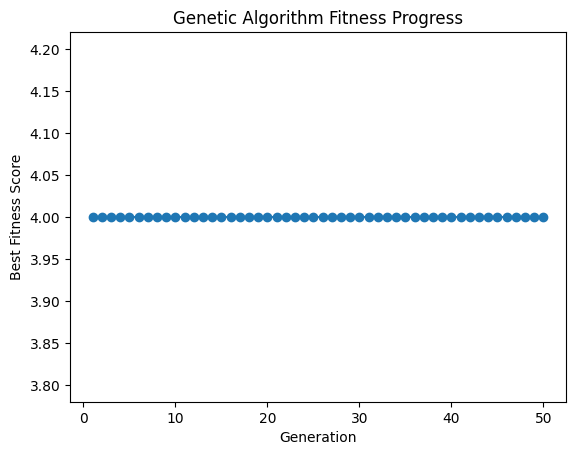

Optimal path from Car-83 to BS-2: ['Car-83', 'Car-43', 'Car-46', 'Car-93', 'BS-2']


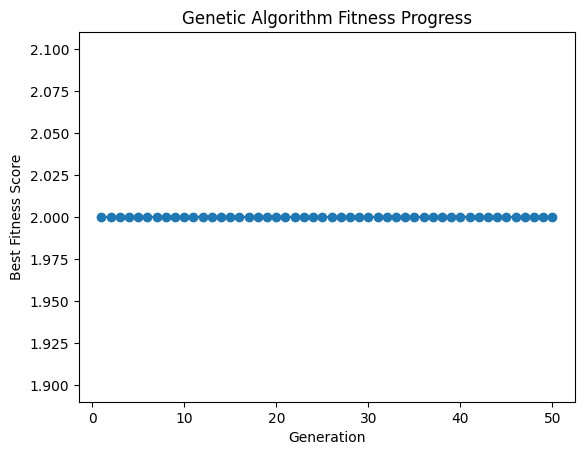

Optimal path from Car-84 to BS-1: ['Car-84', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


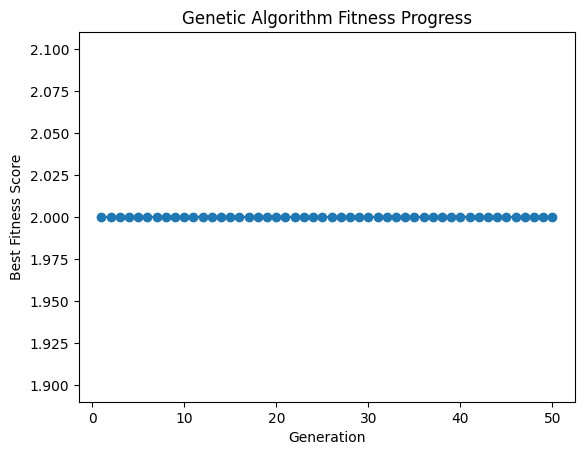

Optimal path from Car-84 to BS-2: ['Car-84', 'Car-85', 'Car-90', 'Car-93', 'BS-2']


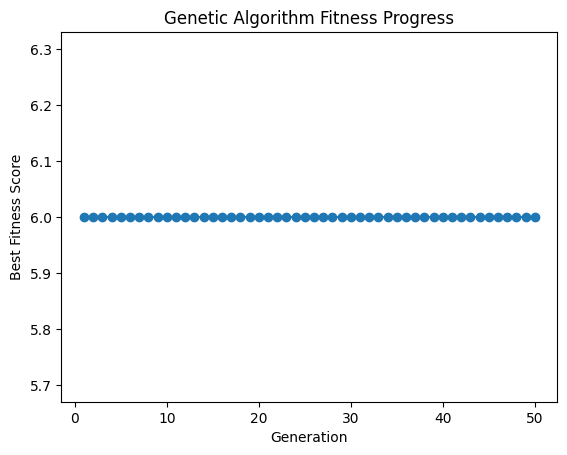

Optimal path from Car-85 to BS-1: ['Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


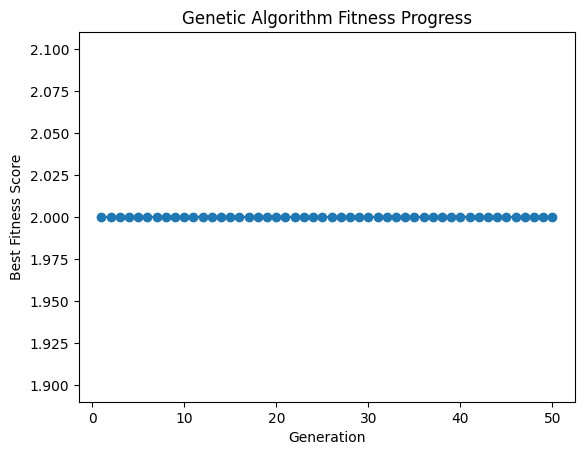

Optimal path from Car-85 to BS-2: ['Car-85', 'Car-90', 'Car-93', 'BS-2']


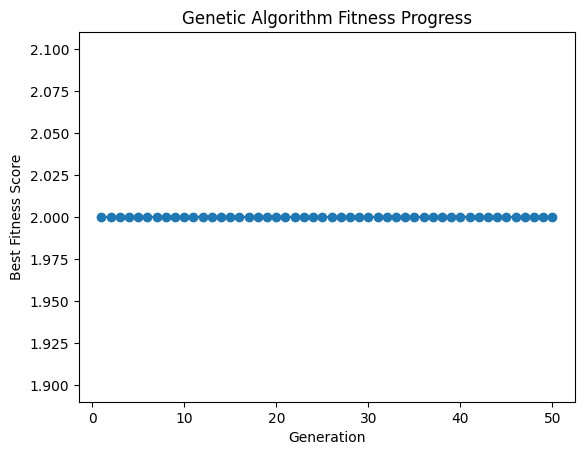

Optimal path from Car-86 to BS-1: ['Car-86', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


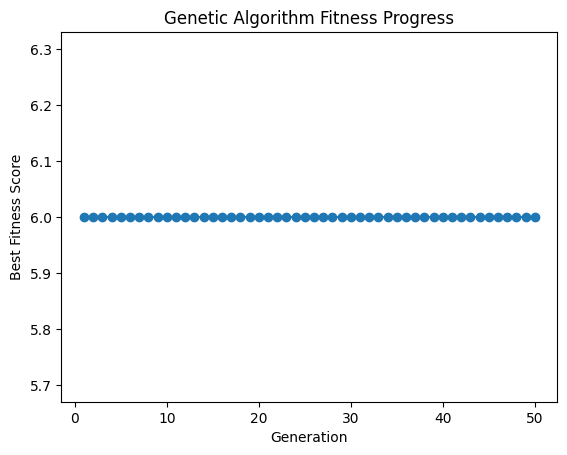

Optimal path from Car-86 to BS-2: ['Car-86', 'Car-88', 'Car-93', 'BS-2']


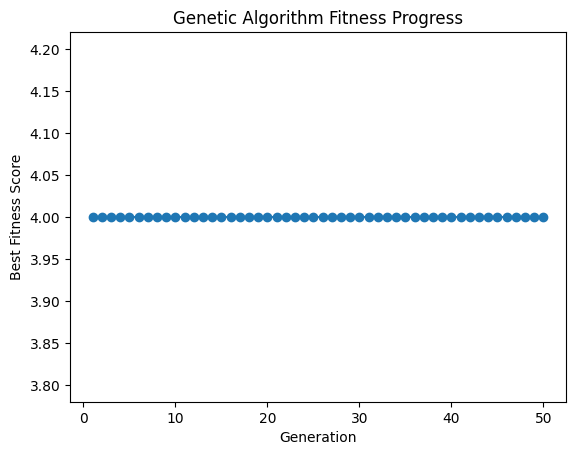

Optimal path from Car-87 to BS-1: ['Car-87', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


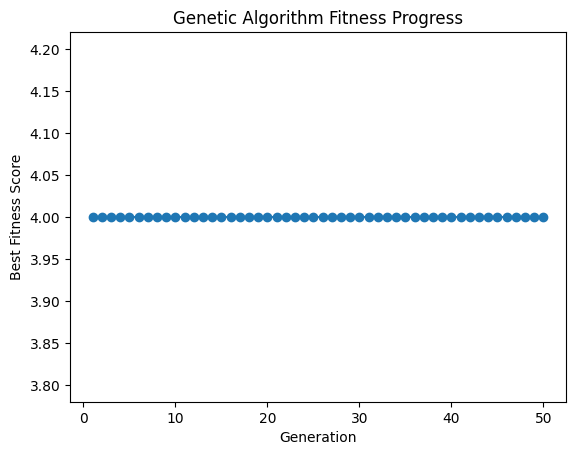

Optimal path from Car-87 to BS-2: ['Car-87', 'Car-49', 'Car-96', 'BS-2']


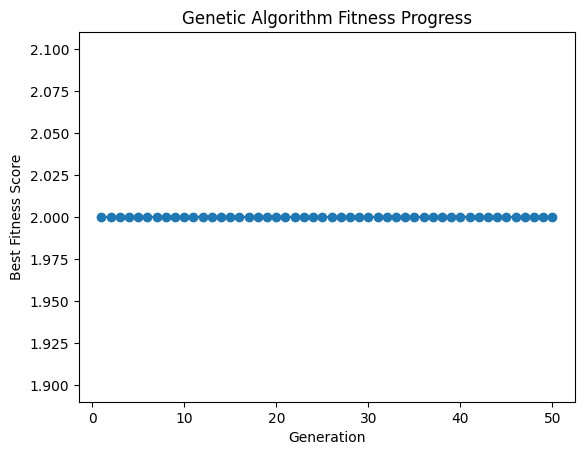

Optimal path from Car-88 to BS-1: ['Car-88', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


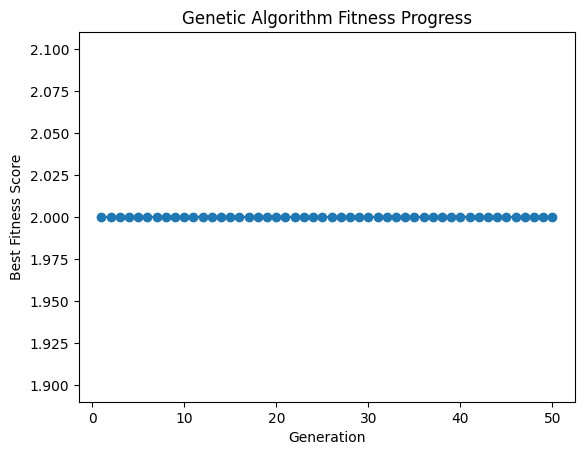

Optimal path from Car-88 to BS-2: ['Car-88', 'Car-93', 'BS-2']


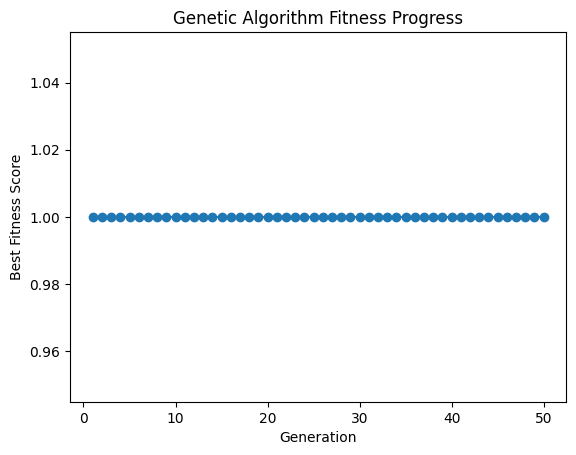

Optimal path from Car-89 to BS-1: ['Car-89', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


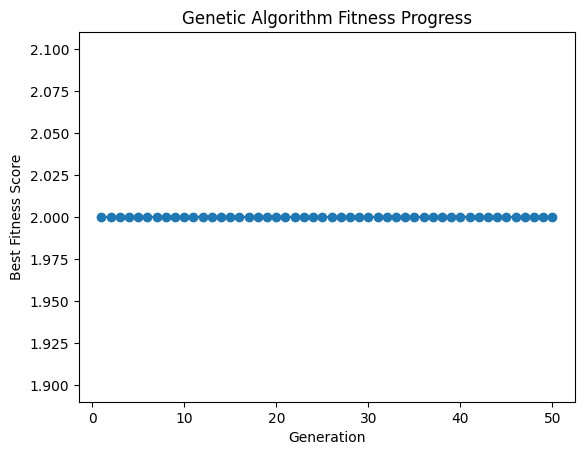

Optimal path from Car-89 to BS-2: ['Car-89', 'Car-49', 'Car-96', 'BS-2']


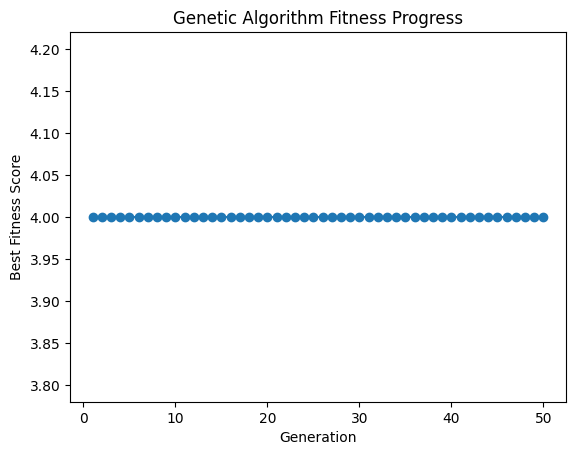

Optimal path from Car-90 to BS-1: ['Car-90', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


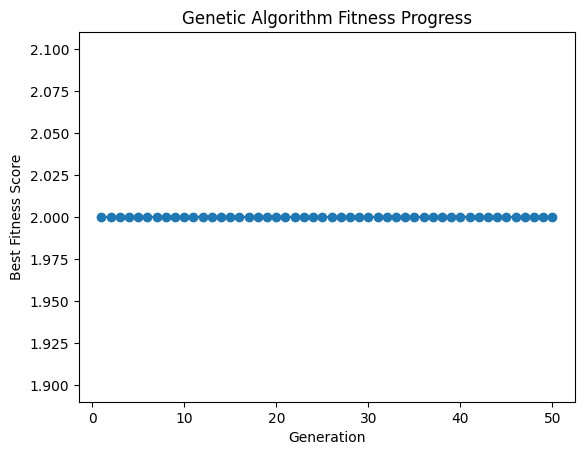

Optimal path from Car-90 to BS-2: ['Car-90', 'Car-93', 'BS-2']


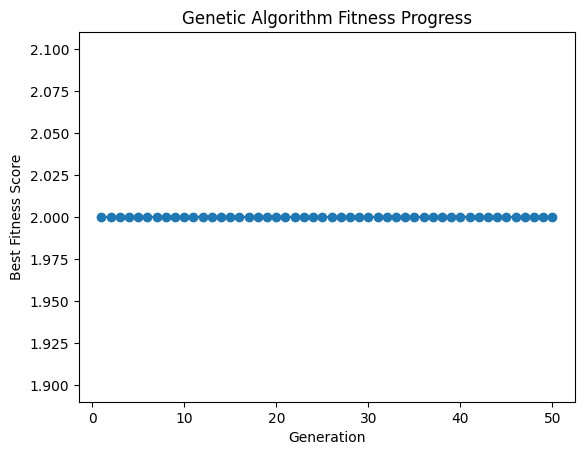

Optimal path from Car-91 to BS-1: ['Car-91', 'Car-87', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


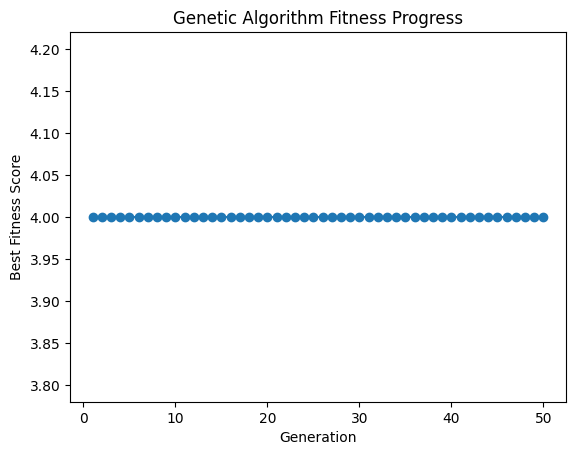

Optimal path from Car-91 to BS-2: ['Car-91', 'Car-96', 'BS-2']


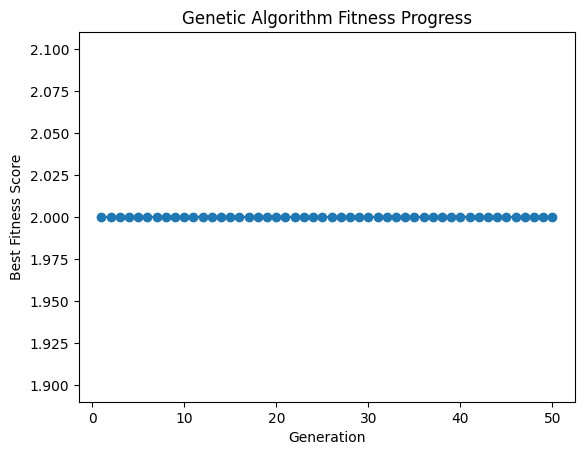

Optimal path from Car-92 to BS-1: ['Car-92', 'Car-90', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


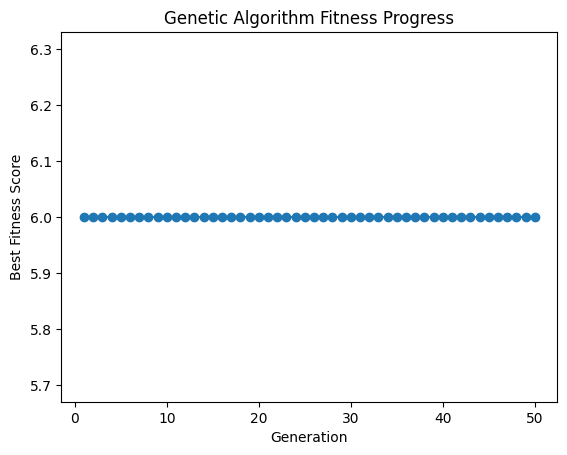

Optimal path from Car-92 to BS-2: ['Car-92', 'Car-93', 'BS-2']


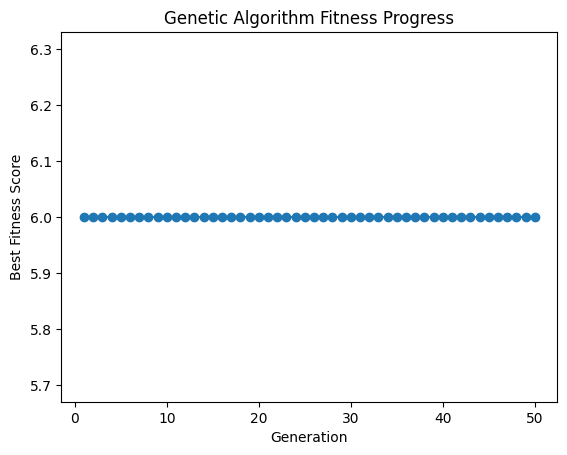

Optimal path from Car-93 to BS-1: ['Car-93', 'Car-90', 'Car-85', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


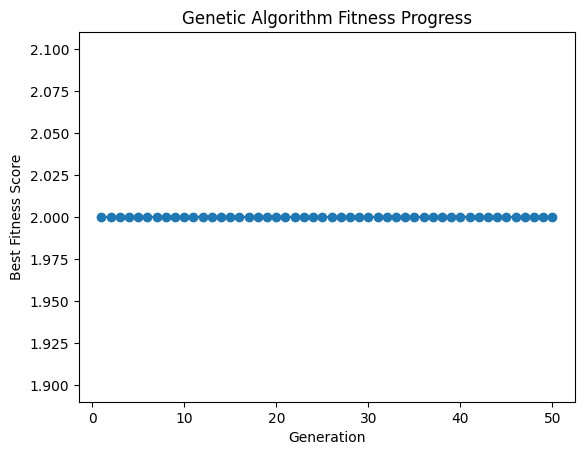

Optimal path from Car-93 to BS-2: ['Car-93', 'BS-2']


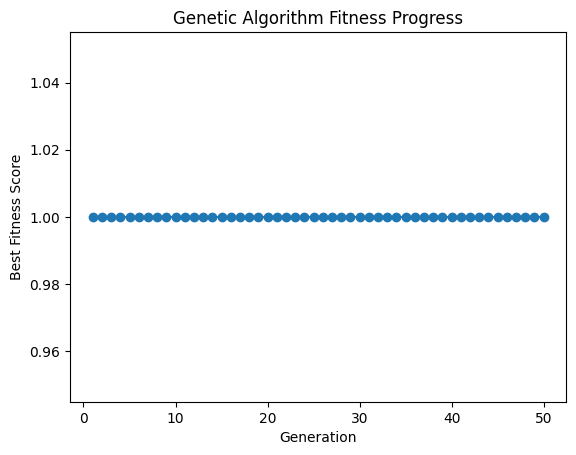

Optimal path from Car-94 to BS-1: ['Car-94', 'Car-48', 'Car-87', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


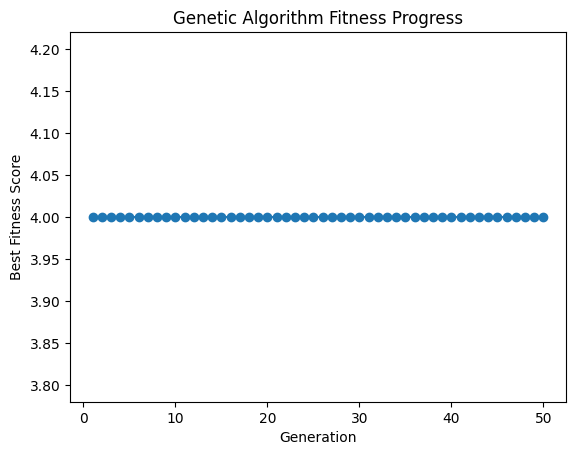

Optimal path from Car-94 to BS-2: ['Car-94', 'BS-2']


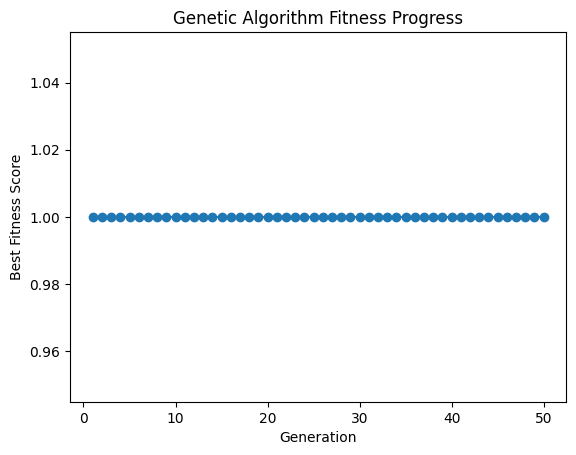

Optimal path from Car-95 to BS-1: ['Car-95', 'Car-50', 'Car-89', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


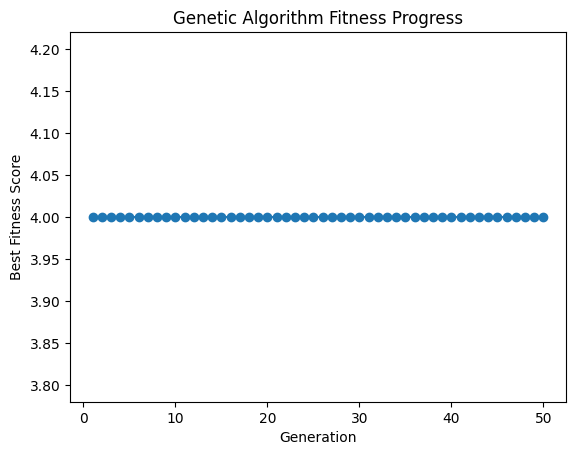

Optimal path from Car-95 to BS-2: ['Car-95', 'BS-2']


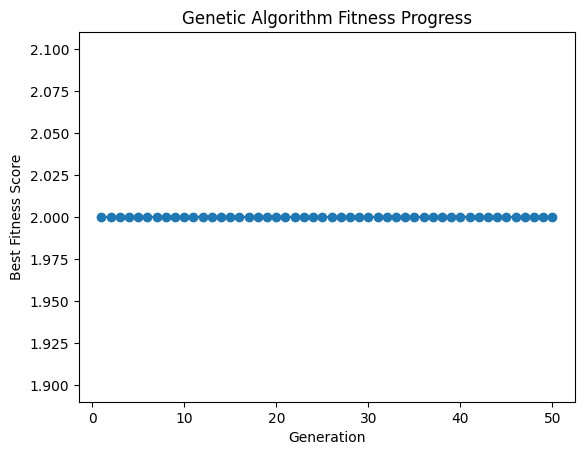

Optimal path from Car-96 to BS-1: ['Car-96', 'Car-47', 'Car-42', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


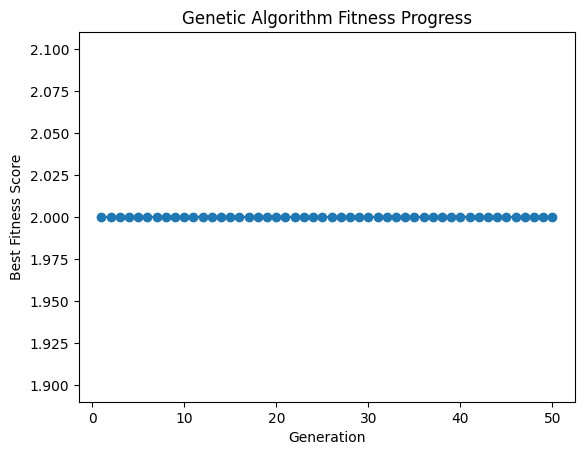

Optimal path from Car-96 to BS-2: ['Car-96', 'BS-2']


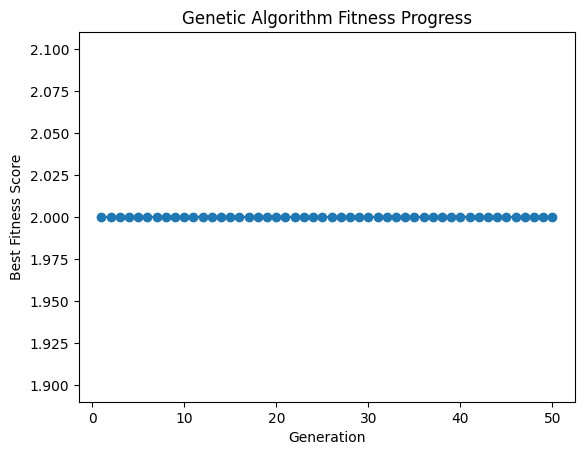

Optimal path from Car-97 to BS-1: ['Car-97', 'Car-91', 'Car-87', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


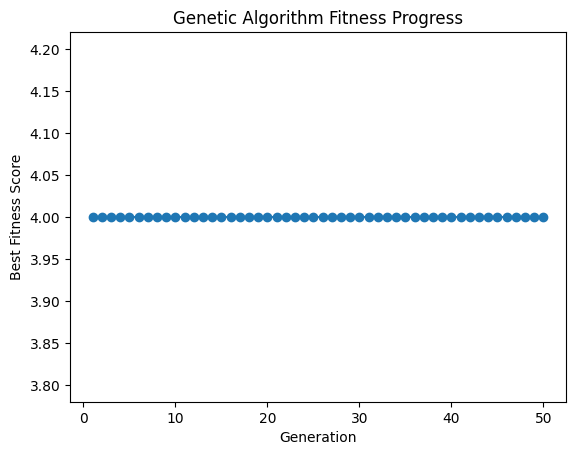

Optimal path from Car-97 to BS-2: ['Car-97', 'BS-2']


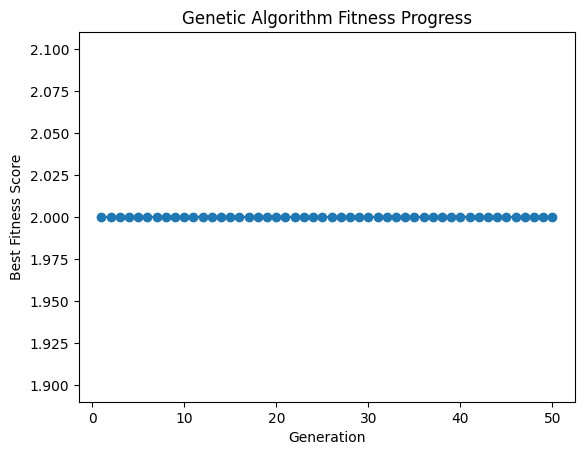

Optimal path from Car-98 to BS-1: ['Car-98', 'Car-50', 'Car-89', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


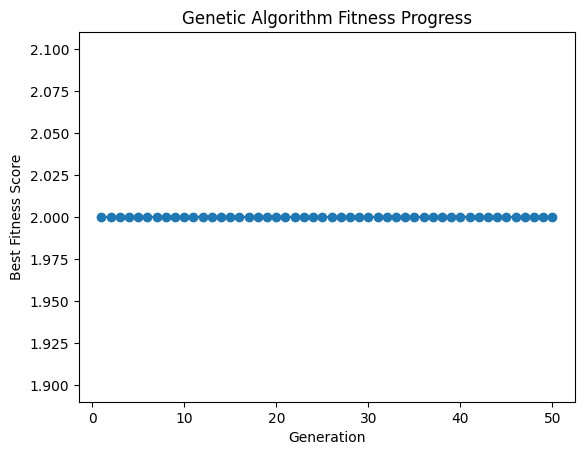

Optimal path from Car-98 to BS-2: ['Car-98', 'BS-2']


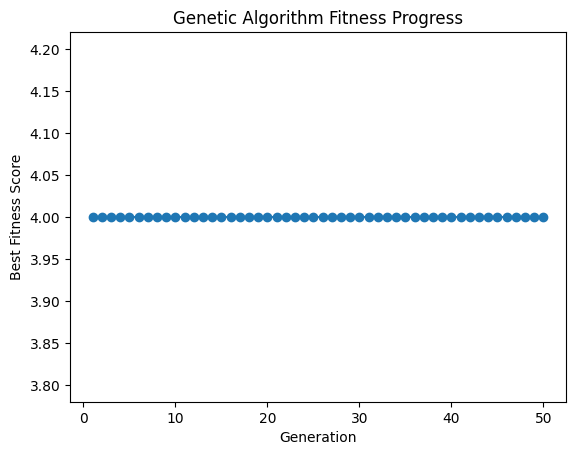

Optimal path from Car-99 to BS-1: ['Car-99', 'Car-50', 'Car-89', 'Car-41', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


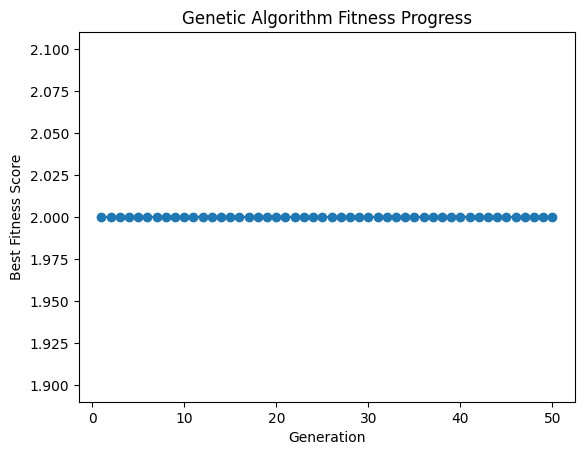

Optimal path from Car-99 to BS-2: ['Car-99', 'BS-2']


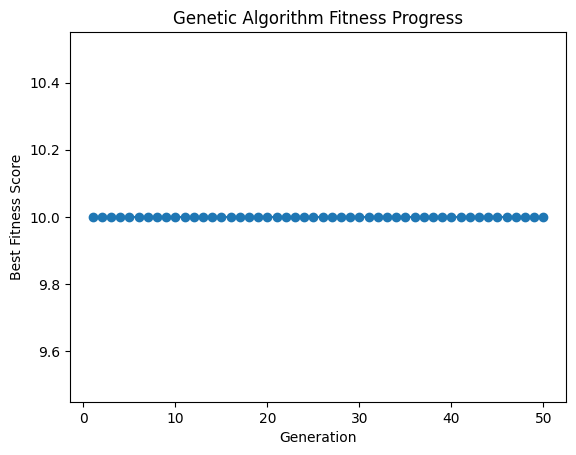

Optimal path from Car-100 to BS-1: ['Car-100', 'Car-96', 'Car-47', 'Car-42', 'Car-81', 'Car-78', 'Car-73', 'Car-68', 'Car-64', 'Car-19', 'Car-57', 'Car-54', 'BS-1']


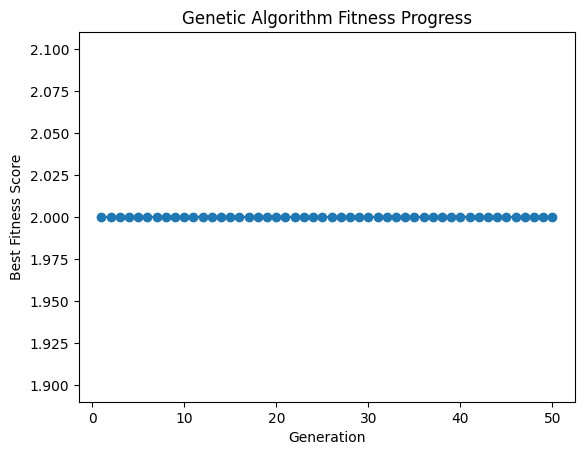

Optimal path from Car-100 to BS-2: ['Car-100', 'BS-2']


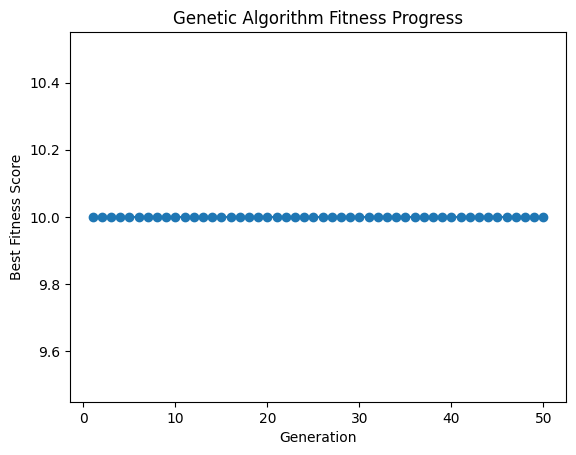

In [ ]:
def initialize_population(population_size, graph, start_node, end_nodes):

    population = []
    for _ in range(population_size):
        path = nx.shortest_path(nx.Graph(graph), source=start_node, target=end_nodes, weight='weight')
        population.append(path)
    return population

def calculate_fitness(individual, graph):

    transmission_rates = []

    for i in range(len(individual) - 1):
        current_node = individual[i]
        next_node = individual[i + 1]

        # Check if the edge exists in the graph
        if current_node in graph and next_node in graph[current_node]:
            transmission_rate = graph[current_node][next_node]

            # If transmission_rate is a dictionary, consider the minimum value
            if isinstance(transmission_rate, dict):
                transmission_rate = min(transmission_rate.values(), default=float('inf'))

            # Append the transmission rate to the list
            transmission_rates.append(transmission_rate)

    # This Handle the case when all transmission rates are "infinite"
    if all(rate == float('inf') for rate in transmission_rates):
        return float('inf')

    # Return the minimum transmission rate
    min_transmission_rate = min(transmission_rates, default=float('inf'))

    return min_transmission_rate

def normalize_fitness(fitness_scores):

    finite_fitness_scores = [score for score in fitness_scores if score != float('inf')]
    total = sum(finite_fitness_scores)

    if total != 0:
        normalized_fitness = [score / total if score != float('inf') else 0 for score in fitness_scores]
    else:
        # If the total is zero, return equal weights
        normalized_fitness = [1 / len(fitness_scores)] * len(fitness_scores)

    return normalized_fitness


def select_parents(population, normalized_fitness):

    # Check if all fitness scores are float('-inf')
    if all(score == float('-inf') for score in normalized_fitness):
        # If all scores are '-inf', select two random parents
        return random.choice(population), random.choice(population)

    parent1_index = random.choices(range(len(population)), weights=normalized_fitness)[0]
    parent2_index = random.choices(range(len(population)), weights=normalized_fitness)[0]
    return population[parent1_index], population[parent2_index]

def crossover(parent1, parent2, graph):
    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child = parent1[:crossover_point]

    # Add nodes from parent2 that are not already in the child
    for node in parent2:
        if node not in child:
            child.append(node)

    return child

def mutate(individual, mutation_rate, graph):

    if random.random() < mutation_rate:
        # Mutate by swapping two random positions in the path
        index1, index2 = random.sample(range(len(individual)), 2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

def plot_fitness_progress(fitness_progress):

    plt.plot(range(1, len(fitness_progress) + 1), fitness_progress, marker='o')
    plt.title('Genetic Algorithm Fitness Progress')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Score')
    plt.show()

def genetic_algorithm(graph, start_node, end_nodes, population_size, generations, mutation_rate):
    population = initialize_population(population_size, graph, start_node, end_nodes)
    fitness_progress = []

    for generation in range(generations):
        fitness_scores = [calculate_fitness(individual, graph) for individual in population]
        normalized_fitness = normalize_fitness(fitness_scores)
        parent1, parent2 = select_parents(population, normalized_fitness)

        child = crossover(parent1, parent2, graph)
        child_fitness = calculate_fitness(child, graph)

        min_fitness_index = fitness_scores.index(min(fitness_scores))
        if child_fitness < fitness_scores[min_fitness_index]:
            population[min_fitness_index] = child

        child = mutate(child, mutation_rate, graph)

        best_fitness = min(fitness_scores)
        fitness_progress.append(calculate_transmission_rate(best_fitness))

    best_individual_index = fitness_scores.index(min(fitness_scores))
    best_path = population[best_individual_index]
    max_transmission_rate = min(fitness_scores)

    if max_transmission_rate == float('inf'):
        max_transmission_rate_str = "infinite Mbps"
    else:
        max_transmission_rate_str = f"{max_transmission_rate} Mbps"

    print(f"Optimal path from {start_node} to {end_nodes}: {best_path}")

    plot_fitness_progress(fitness_progress)

    return best_path

def calculate_transmission_rate(distance):
    if distance >= 6000:
        return 0
    elif 6000 > distance >= 4000:
        return 1
    elif 4000 > distance >= 3000:
        return 2
    elif 3000 > distance >= 2000:
        return 4
    elif 2000 > distance >= 1000:
        return 6
    elif 1000 > distance >= 500:
        return 8
    elif distance < 500:
        return 10

ga_results = []
ga_path = []
def genetic_algorithm_pareto_optimization(graph, population_size, generations, mutation_rate):
    global ga_results
    for car_id in range(1, 101):
        start_node = f'Car-{car_id}'
        base_station_1 = f'BS-1'
        base_station_2 = f'BS-2'

        # Evaluate the genetic algorithm for Base Station 1
        best_path_1 = genetic_algorithm(graph, start_node, base_station_1, population_size, generations, mutation_rate)
        total_cost_1 = calculate_fitness(best_path_1, graph) + 50 * len(best_path_1)

        # Evaluate the genetic algorithm for Base Station 2
        best_path_2 = genetic_algorithm(graph, start_node, base_station_2, population_size, generations, mutation_rate)
        total_cost_2 = calculate_fitness(best_path_2, graph) + 50 * len(best_path_2)

        # Compare results based on total cost (distance + latency)
        if total_cost_1 <= total_cost_2:
            best_path = best_path_1
            selected_base_station = base_station_1
        else:
            best_path = best_path_2
            selected_base_station = base_station_2

        # Format the routing path as a string using join
        routing_path = ", ".join([f"({node}, {calculate_transmission_rate(graph[best_path[i]][best_path[i+1]]['weight'])} Mbps)" for i, node in enumerate(best_path[1:])])

        # Calculate the end-to-end transmission rate as the minimum value along the path
        end_to_end_transmission_rate = min(calculate_transmission_rate(graph[best_path[i]][best_path[i+1]]['weight']) for i in range(len(best_path)-1))
        ga_path.append( best_path)
        result_entry = {
            "Car_ID": car_id,
            "Source node": start_node,
            "Selected Base Station": selected_base_station,
            "Routing path": routing_path,
            "End-to-end transmission rate": f"{end_to_end_transmission_rate} Mbps",
            "Total Latency": 50 * (len(best_path)-1)
        }

        ga_results.append(result_entry)


# Example usage:
population_size = 10
generations = 50
mutation_rate = 0.1

genetic_algorithm_pareto_optimization(G2, population_size, generations, mutation_rate)



In [ ]:
print(len(ga_path))

100


In [ ]:
ga_results

[{'Car_ID': 1,
  'Source node': 'Car-1',
  'Selected Base Station': 'BS-1',
  'Routing path': '(BS-1, 10 Mbps)',
  'End-to-end transmission rate': '10 Mbps',
  'Total Latency': 50},
 {'Car_ID': 2,
  'Source node': 'Car-2',
  'Selected Base Station': 'BS-1',
  'Routing path': '(BS-1, 6 Mbps)',
  'End-to-end transmission rate': '6 Mbps',
  'Total Latency': 50},
 {'Car_ID': 3,
  'Source node': 'Car-3',
  'Selected Base Station': 'BS-2',
  'Routing path': '(Car-56, 2 Mbps), (Car-13, 4 Mbps), (Car-61, 1 Mbps), (Car-21, 4 Mbps), (Car-66, 2 Mbps), (Car-30, 1 Mbps), (Car-75, 1 Mbps), (Car-36, 2 Mbps), (Car-83, 1 Mbps), (Car-43, 2 Mbps), (Car-46, 2 Mbps), (Car-93, 1 Mbps), (BS-2, 1 Mbps)',
  'End-to-end transmission rate': '1 Mbps',
  'Total Latency': 650},
 {'Car_ID': 4,
  'Source node': 'Car-4',
  'Selected Base Station': 'BS-2',
  'Routing path': '(Car-11, 1 Mbps), (Car-62, 1 Mbps), (Car-65, 1 Mbps), (Car-69, 1 Mbps), (Car-72, 4 Mbps), (Car-34, 1 Mbps), (Car-80, 2 Mbps), (Car-83, 1 Mbps), (C

### Conversion of car distances dictionary to transmission rate

In [ ]:
transmission_Rate_dict = {car: {k: calculate_transmission_rate(v) for k, v in dist.items()} for car, dist in car_distances_dict.items()}

This function below takes a optimal path and a transmission rate dictionary as a input value for function plot_optimal_path_graph  and it generates a graph of optimal path  and highlights it in blue.

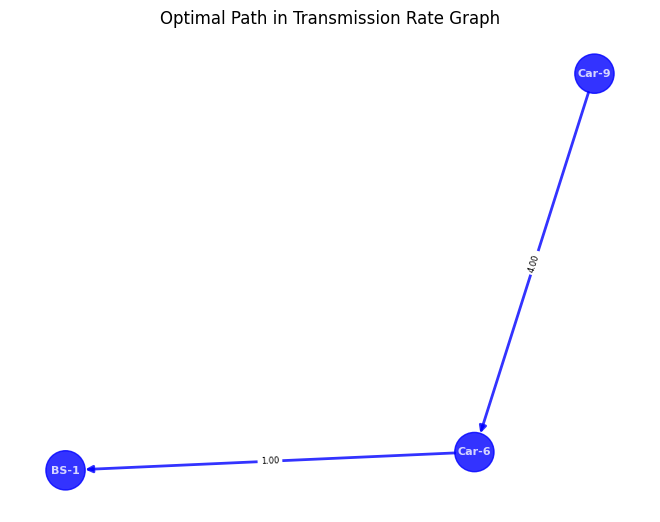

['Car-9', 'Car-6', 'BS-1']


In [ ]:
def plot_optimal_path_graph(optimal_path, transmission_Rate_dict):
    # Create a directed graph
    G_transmission = nx.DiGraph()

    # Extract the optimal path edges from the transmission rates
    optimal_path_edges = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]

    # Add only the optimal path edges to the graph
    for start, end in optimal_path_edges:
        # Check if the keys exist in the dictionary
        if start in transmission_Rate_dict and end in transmission_Rate_dict[start]:
            rate = transmission_Rate_dict[start][end]
            G_transmission.add_edge(start, end, weight=float(rate))

    # Create a color map for nodes
    colors = ['blue' if node in optimal_path else 'red' for node in G_transmission.nodes]

    # Draw the graph with improved visibility
    pos = nx.spring_layout(G_transmission, seed=42, k=1.5)  # You can adjust 'k' for spacing
    nx.draw(G_transmission, pos, with_labels=True, node_color=colors, node_size=800, font_size=8, font_color='white', font_weight='bold', edge_color='blue', width=2, alpha=0.8)

    # Draw edge labels with transmission rates
    labels = {(start, end): f"{transmission_Rate_dict[start][end]:.2f}" for start, end in optimal_path_edges if start in transmission_Rate_dict and end in transmission_Rate_dict[start]}
    nx.draw_networkx_edge_labels(G_transmission, pos, edge_labels=labels, font_color='black', font_size=6)

    plt.title('Optimal Path in Transmission Rate Graph')
    plt.show()

# Example usage:
plot_optimal_path_graph(ga_path[8], transmission_Rate_dict)
print(ga_path[8])


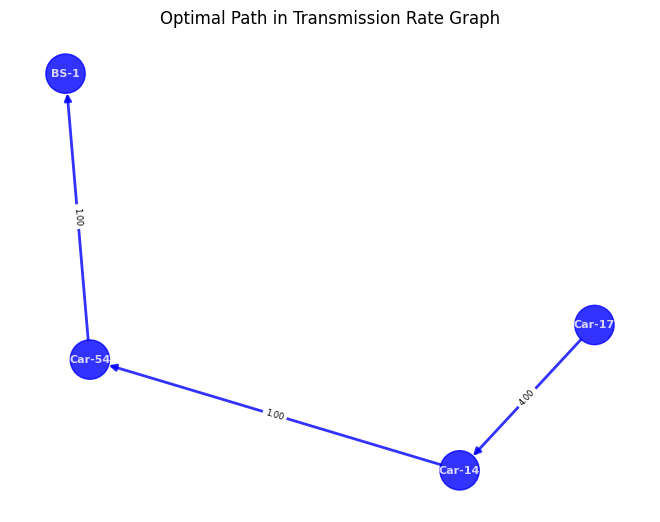

['Car-17', 'Car-14', 'Car-54', 'BS-1']


In [ ]:
plot_optimal_path_graph(ga_path[16], transmission_Rate_dict)
print(ga_path[16])

# 2. A* (A-star) search algorithm

A* is a graph traversal and pathfinding algorithm for weighted graph to find shortest path.


**calculate_transmission_rate** Calculate_transmission_rate function it calculates the given distance between each car with each other and base station according to the conversion table.

**astar_pareto_optimization** In this function we implement the a star algorithm for path finding, to find the shortest and optimal path with high transmission rate and minimum latency a weighted graph starts with start node and end node.

**pq** stores nodes with their latencies and paths and **visited** keeps the track of visited nodes

Then we have implemented a while loop on **pq(priority que)**
where the loop continues until the priority queue is 0 or empty.
In each of the iteration in this loop the node with low latency and distance is  is extracted fron the queue.

If the node that has already been visited is on the loop then it is skipped and the loop moves to next one.

**if node = goal** returns the total cost, latency and the path fron start to the destination if the current node is in the destination goal.

**for neighbor, dist in graph[node].items():**
This loops runs and finds out each neighbours current node and calculates the latency to reach the neighbours and addsits information to **pq** and explore it further. the priority queue at the begining ensures that the nodes with lower cost value is visited first.

  
**converted_car_distances_dict** THis dictionary stores the newly converted key value pairs from distance to transmission rate which is further used to calculate the optimal path with maximim transmission rate and low latency.

Inside this loop for **car_number in range(1, 101):** the code iterates from one to 100 cars to find the optimal path over two of the base stations and it applies a start algorithm to find the optimal path, cost and latency for each of the 100 car to reach the end point either base station 1 or base station 2.

The  end result is stored in dictionary current result
which contains source node, destination node(Selected base station for particular node), routing path, min transmission rate out of total path rate, total latency.

For choosing the best path this code keeps the track of both base station with the help of this line of code
**best_result_1, best_result_2 = current_result if base_station == 'Base_Station_1' else best_result_1, current_result if base_station == 'Base_Station_2' else best_result_2**
and after iterating over the both base stations for the car optimal path, it chooses the path with highest transmission rate and lowest latency and picks one base station that satisfies that condition.

Below astar code implementation idea was taken from (Liu et al. 2022)

In [ ]:
def calculate_transmission_rate(distance):
    return 0 if distance >= 6000 else \
           1 if 6000 > distance >= 4000 else \
           2 if 4000 > distance >= 3000 else \
           4 if 3000 > distance >= 2000 else \
           6 if 2000 > distance >= 1000 else \
           8 if 1000 > distance >= 500 else \
           10

def astar(graph, start, goal):
    pq = [(0, 0, start, [])]
    visited = set()

    while pq:
        cost, latency, node, path = heapq.heappop(pq)

        if node in visited:
            continue

        visited.add(node)

        if node == goal:
            return cost, latency, path + [node]

        for neighbor, dist in graph[node].items():
            new_cost, new_latency = cost + calculate_transmission_rate(dist), latency + 50
            heapq.heappush(pq, (new_cost + new_latency, new_latency, neighbor, path + [node]))

    return float('inf'), float('inf'), []

converted_car_distances_dict = {car: {k: calculate_transmission_rate(v) for k, v in dist.items()} for car, dist in car_distances_dict.items()}

astar_results = []

for car_number in range(1, 101):
    global astar_results
    distances = []

    best_result_1, best_result_2 = None, None

    for base_station in ['BS-1', 'BS-2']:
        cost, latency, optimal_path = astar(converted_car_distances_dict, f"Car-{car_number}", base_station)

        hop_info = [f"({optimal_path[i + 1]}, {converted_car_distances_dict[optimal_path[i]][optimal_path[i + 1]]} Mbps)" for i in range(len(optimal_path) - 1)]
        min_transmission = min(converted_car_distances_dict[optimal_path[i]][optimal_path[i + 1]] for i in range(len(optimal_path) - 1))

        current_result = {
            "Source node": f"Car-{car_number}",
            "Destination node": base_station,
            "Routing path": ', '.join(hop_info),
            "Max transmission rate": f"{min_transmission} Mbps",
            "Total latency": latency
        }
        best_result_1, best_result_2 = current_result if base_station == 'BS-1' else best_result_1, current_result if base_station == 'BS-2' else best_result_2

    if best_result_1 and best_result_2:
        # Choose the path with the highest transmission rate and lowest latency
        chosen_base_station = max([best_result_1, best_result_2], key=lambda x: (float(x["Max transmission rate"].split()[0]), -x["Total latency"]))
        distances.append(chosen_base_station)

    astar_results.append(distances)

# with open('AStar.json', 'w') as json_file:
#     json.dump(astar_results, json_file, indent=2)

print("Results stored in 'AStar.json'")


Results stored in 'AStar.json'


In [ ]:
astar_results

[[{'Source node': 'Car-1',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 10 Mbps)',
   'Max transmission rate': '10 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-2',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 6 Mbps)',
   'Max transmission rate': '6 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-3',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 2 Mbps)',
   'Max transmission rate': '2 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-4',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 2 Mbps)',
   'Max transmission rate': '2 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-5',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 1 Mbps)',
   'Max transmission rate': '1 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-6',
   'Destination node': 'BS-1',
   'Routing path': '(BS-1, 1 Mbps)',
   'Max transmission rate': '1 Mbps',
   'Total latency': 50}],
 [{'Source node': 'Car-7',
   'Destination n

## 3. The Ant Colony Optimization Algorithm
The Ant Colony Optimization (ACO) algorithm is used for graph based optimization tasks such as vehicle routing and internet routing. This is done by:

**Initialization:** Initializes the ACO algorithm with various parameters such as the graph, start node, end nodes, population size, number of generations, evaporation rate, alpha, and beta values. Initialize values for the pheromone matrix, best path, best fitness, and an empty list to track fitness progress over generations.

**Pheromone Initialization:** Initializes the pheromone levels on each edge in the graph.

**Fitness Calculation:** Calculates the fitness of a given path, considering the transmission rates of the edges.

**Pheromone Update:** Updates the pheromone levels on each edge based on the fitness of the associated path.

**Ant Colony pareto optimization Loop:** ant_colony_optimization, Iterates through generations and generates a population of paths, updates pheromones based on the fitness of paths in the population. Updates the best path based on Dijkstra's algorithm and the fitness of the new path. Generates a population of paths by calling the generate_path method. Generates a single path using probability-based node selection influenced by pheromone levels. Updates populations based on the fitness of paths in the population. Evaporates pheromones on all edges in the graph. Plots the fitness progress over generations.

**Result Formatting:** Calculate the optimal routing path, based on high transmission rate and low latency to base station one and stores the result in resultbs1. Calculate the optimal routing path, based on high transmission rate and low latency to base station two and stores the result in resultsbs2.

Below code idea for multiple objective was taken from
(Ntakolia and Lyridis 2022)

{'Source node': 'Car-1', 'Routing path': [('BS-1', 10)], 'End-to-end transmission rate': '10 Mbps', 'Total latency': 50}
{'Source node': 'Car-2', 'Routing path': [('BS-1', 6)], 'End-to-end transmission rate': '6 Mbps', 'Total latency': 50}
{'Source node': 'Car-3', 'Routing path': [('BS-1', 2)], 'End-to-end transmission rate': '2 Mbps', 'Total latency': 50}
{'Source node': 'Car-4', 'Routing path': [('BS-1', 2)], 'End-to-end transmission rate': '2 Mbps', 'Total latency': 50}
{'Source node': 'Car-5', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-6', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-7', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-8', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-9', 'Routing path': [('Ca

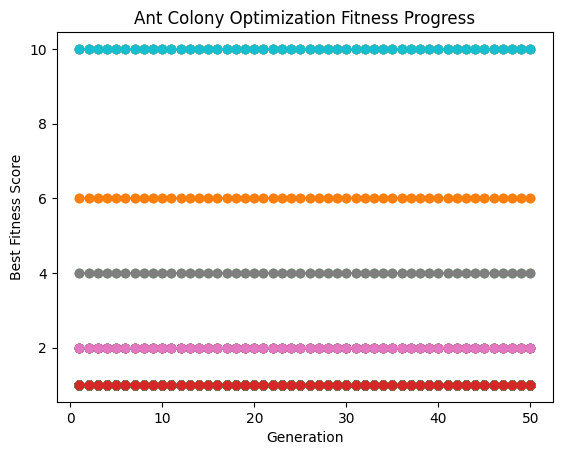

In [ ]:
%%time
class AntColony:
    def __init__(self, graph, start_node, end_nodes, population_size, generations, evaporation_rate, alpha, beta):
        self.graph = graph
        self.start_node = start_node
        self.end_nodes = end_nodes
        self.population_size = population_size
        self.generations = generations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromone_matrix = self.initialize_pheromones()
        self.best_path = None
        self.best_fitness = float('inf')
        self.fitness_progress = []

    def initialize_pheromones(self):
        pheromone_matrix = {edge: 1.0 for edge in self.graph.edges}
        return pheromone_matrix

    def calculate_fitness(self, path):
        transmission_rates = []

        for i in range(len(path) - 1):
            current_node = path[i]
            next_node = path[i + 1]

            try:
                weight = self.graph[current_node][next_node]['transmission_rate']
                transmission_rates.append(weight)
            except KeyError:
                print(f"KeyError: 'weight' not found for edge ({current_node}, {next_node})")
                print(f"Graph neighbors for {current_node}: {list(self.graph.neighbors(current_node))}")
                print(f"Graph neighbors for {next_node}: {list(self.graph.neighbors(next_node))}")
                print(f"Graph edges: {self.graph.edges()}")
                print(f"Graph edge data for {current_node}-{next_node}: {self.graph.get_edge_data(current_node, next_node)}")
                print(f"Graph edge data: {self.graph[current_node][next_node]}")

        return min(transmission_rates, default=float('inf'))


    def update_pheromones(self, path, fitness):
        evaporation = {edge: (1 - self.evaporation_rate) * self.pheromone_matrix[edge] for edge in self.pheromone_matrix}
        delta_pheromones = {edge: 1.0 / fitness for edge in zip(path[:-1], path[1:])}
        pheromone_delta = {**evaporation, **delta_pheromones}
        self.pheromone_matrix.update(pheromone_delta)

    def ant_colony_pareto_optimization(self):
        for generation in range(self.generations):
            population = self.generate_population()
            self.update_population(population)
            self.evaporate_pheromones()
            self.update_best_path()

            # print(f"Generation {generation + 1}: Best Fitness = {self.best_fitness}")
            self.fitness_progress.append(self.best_fitness)

        formatted_best_path = self.format_routing_path(self.best_path)
        self.plot_fitness_progress()

        return {
            "Source Node": self.start_node,
            "Routing Path": formatted_best_path,
            "End-to-end data rate": self.best_fitness
        }

    def generate_population(self):
        population = []
        for _ in range(self.population_size):
            path = self.generate_path()
            population.append(path)
        return population

    def generate_path(self):
        current_node = self.start_node
        path = [current_node]

        while current_node not in self.end_nodes:
            neighbors = list(self.graph.neighbors(current_node))
            pheromone_values = [self.pheromone_matrix.get((current_node, neighbor), 1.0) for neighbor in neighbors]
            probabilities = [pheromone**self.alpha for pheromone in pheromone_values]

            selected_node = random.choices(neighbors, weights=probabilities)[0]
            path.append(selected_node)
            current_node = selected_node

        return path

    def update_population(self, population):
        for path in population:
            fitness = self.calculate_fitness(path)
            self.update_pheromones(path, fitness)

    def evaporate_pheromones(self):
        self.pheromone_matrix = {edge: (1 - self.evaporation_rate) * value for edge, value in self.pheromone_matrix.items()}

    def update_best_path(self):
        # Use Dijkstra's algorithm to find the shortest path
        _, path = nx.single_source_dijkstra(self.graph, source=self.start_node, target=self.end_nodes[0])

        # Update best path and fitness
        fitness = self.calculate_fitness(path)
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_path = path

    def plot_fitness_progress(self):
        plt.plot(range(1, len(self.fitness_progress) + 1), self.fitness_progress, marker='o')
        plt.title('Ant Colony Optimization Fitness Progress')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness Score')
        # plt.show()

    def format_routing_path(self, path):
        formatted_path = []

        for i in range(len(path) - 1):
            current_node = path[i]
            next_node = path[i + 1]

            transmission_rate = self.graph[current_node][next_node]['transmission_rate']
            formatted_path.append((('Car-' + str(next_node)) if 'BS' not in str(next_node) else str(next_node), transmission_rate))

        return formatted_path


population_size = 10
generations = 50
evaporation_rate = 0.1
alpha = 1.0
beta = 1.0
# Fixed latency for each path traveled to reach the base station
fixed_latency_per_path = 50  # Adjust the value as needed
# Initialize a dictionary to store the results
resultsbs1 = {}
resultsbs2 = {}

# Iterate over all 100 cars
for car_id in range(1, 101):
    start_node = car_id
    end_nodes = ['BS-1']

    # Create an instance of the AntColony class
    ant_colony = AntColony(G, start_node, end_nodes, population_size, generations, evaporation_rate, alpha, beta)

    # Run the ant_colony_optimization method to find the optimal routing path
    routing_path = ant_colony.ant_colony_pareto_optimization()

    # Calculate the total latency as 50 * (len(best path) - 1)
    total_latency = fixed_latency_per_path * len(routing_path['Routing Path'])

    # Format the resultsbs1 and store them in the dictionary
    formatted_result = {
        "Source node": f"Car-{car_id}",
        "Routing path": routing_path['Routing Path'],
        "End-to-end transmission rate": f"{routing_path['End-to-end data rate']} Mbps",
        "Total latency": total_latency  # Adjust the unit as needed
    }

    resultsbs1[f"Car-{car_id}"] = formatted_result
# Print or use the resultsbs1 dictionary as needed
for car_id, result1 in resultsbs1.items():
    print(result1)
# Iterate over all 100 cars
for car_id in range(1, 101):
    start_node = car_id
    end_nodes = ['BS-2']

    # Create an instance of the AntColony class
    ant_colony = AntColony(G, start_node, end_nodes, population_size, generations, evaporation_rate, alpha, beta)

    # Run the ant_colony_optimization method to find the optimal routing path
    routing_path = ant_colony.ant_colony_pareto_optimization()

    # Calculate the total latency as 50 * (len(best path) - 1)
    total_latency = fixed_latency_per_path * len(routing_path['Routing Path'])

    # Format the results and store them in the dictionary
    formatted_result = {
        "Source node": f"Car-{car_id}",
        "Routing path": routing_path['Routing Path'],
        "End-to-end transmission rate": f"{routing_path['End-to-end data rate']} Mbps",
        "Total latency": total_latency  # Adjust the unit as needed
    }

    resultsbs2[f"Car-{car_id}"] = formatted_result
# Print or use the resultsbs2 dictionary as needed
for car_id, result2 in resultsbs2.items():
    print(result2)

### Calculation of optimal path for Ant colony
Here we calculate the most optimal path based on highest transmission rate and lowest latency out of two base station and store it in lowest_latency_results.

In [ ]:
# Assuming you have results_bs1 and resultsbs2 from the previous simulations

# Initialize a dictionary to store the results with the lowest latency
lowest_latency_results = {}

# Iterate over each car
for car_id in range(1, 101):
    # Get the results for the current car from both Base Stations
    result_bs1 = resultsbs1[f"Car-{car_id}"]
    result_bs2 = resultsbs2[f"Car-{car_id}"]

    # Extract the total latencies
    latency_bs1 = result_bs1["Total latency"]
    latency_bs2 = result_bs2["Total latency"]

    # Choose the result with the lower latency
    if latency_bs1 < latency_bs2:
        lowest_latency_results[f"Car-{car_id}"] = result_bs1
    else:
        lowest_latency_results[f"Car-{car_id}"] = result_bs2

# Print or use the dictionary with the lowest latency results
for car_id, result in lowest_latency_results.items():
    print(result)


{'Source node': 'Car-1', 'Routing path': [('BS-1', 10)], 'End-to-end transmission rate': '10 Mbps', 'Total latency': 50}
{'Source node': 'Car-2', 'Routing path': [('BS-1', 6)], 'End-to-end transmission rate': '6 Mbps', 'Total latency': 50}
{'Source node': 'Car-3', 'Routing path': [('BS-1', 2)], 'End-to-end transmission rate': '2 Mbps', 'Total latency': 50}
{'Source node': 'Car-4', 'Routing path': [('BS-1', 2)], 'End-to-end transmission rate': '2 Mbps', 'Total latency': 50}
{'Source node': 'Car-5', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-6', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-7', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-8', 'Routing path': [('BS-1', 1)], 'End-to-end transmission rate': '1 Mbps', 'Total latency': 50}
{'Source node': 'Car-9', 'Routing path': [('Ca

#3.Particle Swarm Optimization (PSO) Algorithm

The PSO algorithm works based on swarm behaviour in nature. It works by having a population (swarm) of individuals (particles). This python code is implementing the Particle swarm optimization algorithm (PSO) for optimizing the given problem.

**Initialization:** At first, base stations are initialized, Parameters such as cognitive and social coefficients, max iterations, swarm size number of cars and delay per node are defined.

**Functions:**Helper Functions such as calculating distances, transmission rates, end-to-end transmission rates and latency are created.

**Fitness function:** A function with the name Fitness is defined to check the fitness of a given route by considering the factors such as latency and data rate.

**Random route:** To generate random routes for cars a function with the name random_route is created that take route_len and car as input.

**Initialize particles:** Particles are initialized for the PSO algorithm in initialize_particles Function, where each particle represents a potential route for a car and then function with the name update_velocities is created to update the particles velocities based on the PSO principal.

**PSO pareto optimization:** The main PSO algorithm iterates over a range of iterations, initializes particles, evaluates fitness, and updates the global best path.Results for the best paths obtained during PSO iterations are generated.

**Result:** The results, including source node, routing path, end-to-end transmission rate, and total latency, are converted to a JSON format and stored in a file named 'new.json'. The results are also printed for further analysis or use.

Below code is referenced from (Ntakolia et al. 2023)



In [ ]:
%%time
#Setting the coordinates of the Basestations and plotting.
BS_1_x = -1
BS_1_y = -1
BS_2_x = 56325
BS_2_y = 9
Base_1 = (BS_1_x, BS_1_y)
Base_2 = (BS_2_x, BS_2_y)

base = pd.DataFrame({"No.": [101, 102],"x": [BS_1_x, BS_2_x],"y": [BS_1_y, BS_2_y]})
df = df.append(base, ignore_index=True)
#Duplicates of the DataFrame's "x" and "y" columns, which stand for the base station's x and y coordinates.
x_coordinate = df.x.copy()
y_coordinate = df.y.copy()
PSOList = []
global_best_path=[]
global_best_everything=[]
# Defining Parameters such as acceleration coefficients (c1&c2) and other parameters
c1 = 2
c2 = 2
Max_iterations = 2
swarm_size = 30
num_cars = 100
Delay_per_node = 50
#Making a Function , getCordinates that takes a point index (point1) and retrieves its x and y coordinates from the global x_coordinate and y_coordinate variables.
def getCordinates(point1):
    point1_x = x_coordinate[point1]
    point1_y = y_coordinate[point1]
    return point1_x, point1_y
#Calculating distance by taking two points' indices (point1 and point2) and calculates the Euclidean distance between them using their coordinates obtained from the getCordinates function.
def calculate_distance(point1, point2):
    point1_x, point1_y = getCordinates(point1)
    point2_x, point2_y = getCordinates(point2)
    return np.sqrt((point1_x - point2_x)**2 + (point1_y - point2_y)**2)
#Calculating end to end transmission rate along a route by taking a list of transmission rates and returns the minimum value.
def end_to_end_transmission_rate(transmission_rates):
    return min(transmission_rates)
#Calculating latency by taking the number of nodes in a route and calculate the total latency by multiplying it with Delay_per_node constant value.
def end_to_latency(nodes):
    return nodes * Delay_per_node
# Creating fitness function.
def Fitness(route):
    # Set weights for latency and data rate
    latency_weight = 1
    data_rate_weight = 1
    # Initialize variables
    total_latency = 0
    transmission_rates = []
    print('Transmissionrate',transmission_rates)
    break_connection = False
    # Iterate through each node in the route
    for i in range(len(route) - 1):
    # Extract current and next points from the route
        point1 = route[i]
        point2 = route[i + 1]
    # Get coordinates of the points
        point1_x = x_coordinate[point1]
        point1_y = y_coordinate[point1]
        point2_x = x_coordinate[point2]
        point2_y = y_coordinate[point2]
    # Get coordinates of the last car in the route
        last_car_x, last_car_y = getCordinates(route[-1])
    # Calculate the distance between the current and next points
        distance = calculate_distance(route[i], route[i + 1])
    # Check if there is a break in the connection (transmission rate is zero)
        if calculate_transmission_rate(calculate_distance(point1, point2)) == 0:
            break_connection = True
    # Check if there is a break in the connection and the last car is at one of the base stations
        if break_connection == False and (
                (last_car_x == BS_1_x and last_car_y == BS_1_y) or (last_car_x == BS_2_x and last_car_y == BS_2_y)):
    # Calculate the transmission rate for the current segment
            transmission_rate = calculate_transmission_rate(calculate_distance(point1, point2))
    # If transmission rate is greater than 0, append to the list and update total latency
            if transmission_rate > 0:
                transmission_rates.append(transmission_rate)
                total_latency += Delay_per_node
    # Calculate end-to-end data rate as the minimum of the transmission rates
    end_to_end_data_rate = min(transmission_rates) if transmission_rates else 0
    # If total latency is 0, calculate it based on the number of nodes in the route
    if total_latency == 0:
      if len(route)>1:
        total_latency=(len(route)-1)*Delay_per_node
      else:
        total_latency = 50
    # Calculate the fitness value based on latency and data rate
    fitness = (1 / (latency_weight * (total_latency))) + (data_rate_weight * end_to_end_data_rate)
    # Print final information for debugging or analysi
    print("FinalRoute is " + str(route))
    print("Final fitness is " + str(fitness))
    print("Final End-to-End Transmission Rate:", end_to_end_data_rate)
    print("Final End-to-End Latency:", total_latency)
    fitness = (1/(latency_weight * (total_latency))) + (data_rate_weight * end_to_end_data_rate)
    # Return fitness value, end-to-end data rate, and total latency
    return fitness, end_to_end_data_rate, total_latency
def random_route(route_len,car):
    # Initialize an empty list representing a particle (route)
    particle = []
    # Append the starting car to the particle

    particle.append(car)
    # Continue adding nodes to the particle until it reaches the specified length or encounters a base station
    while True:
    # Check if the particle has reached the maximum length
      if len(particle)>50:
        return particle
    # Check if the particle has reached either of the base stations
      if calculate_distance(100, particle[-1]) == 0 or calculate_distance(101, particle[-1]) == 0:
          break
    # Find neighboring nodes that can be added to the particle
      neighbours = []
      for i in range(len(x_coordinate)):
    # Exclude the current node from the neighbors
           if i == particle[-1]:
               continue
    # Check if there is a positive transmission rate between the current node and the last node in the particle
           if calculate_transmission_rate(calculate_distance(i, particle[-1])) > 0:
               neighbours.append(i)
    # Choose a random neighbor and add it to the particle
      random_neighbour = np.random.choice(neighbours)
      particle.append(random_neighbour)
    # Return the final particle (route)
    return particle

def initialize_particles(swarm_size, num_cars, carNo):
# Initialize a list of particles and velocities
    particles = [random_route(50,carNo) for _ in range(swarm_size)]
    velocities = np.zeros((swarm_size, num_cars))
    return particles, velocities

def update_velocities(particles, velocities, personal_best_positions, global_best_position, inertia_weight):
# Generate random values between 0 and 1 for r1 and r2
    r1, r2 = np.random.rand(swarm_size, num_cars), np.random.rand(swarm_size, num_cars)
# Calculate cognitive and social components of the velocity update
    cognitive_component = c1 * r1 * (personal_best_positions - particles)
    social_component = c2 * r2 * (global_best_position - particles)
# Calculate the new velocity using the inertia weight
    new_velocity = inertia_weight * velocities + cognitive_component + social_component
# Return the updated velocity
    return new_velocity

def PSO_pareto_optimization():
# Declare the global variables that will be modified within the function
    global global_best_position
    global global_best_path
    global global_best_everything
# Iterate over a range of values (0 to 100)
    for i in range(0,100):
# Initialize particles and velocities for the PSO algorithm
      particles, velocities = initialize_particles(swarm_size, num_cars,i)
      print(particles, velocities)# Print particles and velocities for debugging purposes
      # Calculate fitness values for each particle
      fitness_values = np.array([Fitness(particle) for particle in particles])
      # Copy the initial positions of the particles as personal best positions
      personal_best_positions = particles.copy()
      #Copy the fitness values as personal best fitness
      personal_best_fitness = fitness_values[:, 0].copy()
      # Find the index of the global best particle
      global_best_index = np.argmin(personal_best_fitness)
      # Copy the global best position
      global_best_position = personal_best_positions[global_best_index].copy()
      # Copy the global best fitness
      global_best_fitness = personal_best_fitness[global_best_index]
      # Calculate fitness values again (might be redundant, check if necessary)
      fitness_values = np.array([Fitness(particle) for particle in particles])
      # Find the global best particle using the Fitness function as the key
      gbest = max(particles, key=lambda route: Fitness(route)[0])
      # Get the index of the global best particle in the list of particles
      index = particles.index(gbest)
      # Update the global best position
      global_best_position=gbest
      #Append the global best position to the list of global best paths
      global_best_path.append(gbest)
      # Calculate the fitness of the global best position and update global best fitness
      global_best_fitness=Fitness(gbest)
      # Create a list containing the global best fitness components
      current_list = [*global_best_fitness]
      # Append the current list to the list of global best everything
      global_best_everything.append(current_list)
# Call the PSO_pareto_optimization function to run the Particle Swarm Optimization algorithm
PSO_pareto_optimization()

# Iterate over the global best paths
for i in range(len(global_best_path)):

    transmission_Rates = []
    routing_path_str = []

    for j in range(len(global_best_path[i]) - 1):
      # Calculate transmission rate for the current segment of the path
      transmission_Rate = calculate_transmission_rate(calculate_distance(global_best_path[i][j], global_best_path[i][j+1]))
      transmission_Rates.append(transmission_Rate)
      # Create a string representation of the route segment
      if j == len(global_best_path[i]) - 2:
        if global_best_path[i][j+1] == 100:
          route = "BS-1" + ", " + str(transmission_Rate) + " Mbps"
        else:
          route = "BS-2" + ", " + str(transmission_Rate) + " Mbps"
      else:
        route = "Car-" + str(global_best_path[i][j+1]) + ", " + str(transmission_Rate) + " Mbps"
      routing_path_str.append(route)
       # Create a dictionary representing the result for the current global best path
    result_dict = {
        "Source node": global_best_path[i][0],
        "routing path": routing_path_str,
        "End-to-end transmission rate": int(float(global_best_everything[i][0])),
        "Total Latency": int(global_best_everything[i][2])
    }
    # Append the result dictionary to the list of result_list
    PSOList.append(result_dict)

# Print or use the PSOList as needed
for result in PSOList:
    print(result)
print(len(PSOList))

<timed exec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Streaming output truncated to the last 5000 lines.
Final End-to-End Transmission Rate: 0
Final End-to-End Latency: 2500
Transmissionrate []
FinalRoute is [89, 46, 92, 101]
Final fitness is 1.0066666666666666
Final End-to-End Transmission Rate: 1
Final End-to-End Latency: 150
Transmissionrate []
FinalRoute is [89, 44, 46, 43, 39, 86, 81, 77, 81, 78, 79, 74, 35, 34, 79, 75, 71, 67, 25, 27, 22, 21, 25, 26, 30, 74, 31, 26, 69, 73, 27, 71, 32, 76, 32, 30, 68, 71, 31, 72, 73, 78, 75, 36, 80, 39, 41, 81, 40, 44, 46]
Final fitness is 0.0004
Final End-to-End Transmission Rate: 0
Final End-to-End Latency: 2500
Transmissionrate []
FinalRoute is [89, 45, 86, 42, 46, 94, 47, 43, 42, 41, 88, 84, 46, 94, 98, 96, 93, 98, 95, 90, 96, 94, 103]
Final fitness is 1.000909090909091
Final End-to-End Transmission Rate: 1
Final End-to-End Latency: 1100
Transmissionrate []
FinalRoute is [89, 87, 41, 84, 90, 45, 44, 90, 45, 89, 86, 42, 44, 89, 93, 46, 45, 43, 41, 88, 49, 89, 84, 42, 38, 36, 78, 76, 79, 82, 81, 3

##5. Artificial bee colony (ABC) algorithm
In this algorithm, we have to find optimal paths for a number of cars based on a converted car dictionary which contains the transmission rate of each and every car as well as the base station excluding some cars with transmission rates over 0. In this algorithm, we have iteratively explored the path based on fitness, and we regenerate scout bees to continue the search for the fittest optimal path.
The fitness is calculated based on the maximum transmission rate along with the path and latency penalty.

The results are formatted for each car 1 to 100, routing path with respective transmission rate, end-to-end transmission rate, and total latency of the path.

**initialize_bees** In this function each bee is represented by a car dictionary with keys. There is a path parameter that randomly generates a path for a bee and the  the fitness of the random path is calculated by **calculate_fitness function**

**explore_nearby_paths** In this function a bee is allowed to explore its near neighbor path by potential mutation of its current path and if the mutated path results in a fitness value that is better than the previous path that means it has a higher transmission rate than the previous one and the bee's path is updated.

In the **roulette_wheel_selection** in this function an index is chosen based on the provided probabilities.

**select_bee_based_on_fitness** This function uses the popular roulette wheel selection to choose a bee that qualifies to be the fittest and it ensures the optimal path to have the fittest path during the time of exploration and selection steps of the Bees algorithm therefore giving the best optimal path.

**regenerate_scout_bees** In this function there is a 60 percent chance to regenerate a bee and in this regeneration process a new random path is assigned and its fitness is updated. In Summary, this process is needed to complete the process by returning the fittest bee and further progressing while implementing this bee's algorithm.


**bee_pareto_optimization** This is the main loop function that operates the main steps involved in the Bee algorithm to find the best results. It first **initialize_bees** function. In summary, a population of bees explores its path based on fitness values and adapts its path selection through local and global variables. This function iteratively updates the bees and tracks the best path based on the highest transmission rate. It also introduces diversity by regenerating scout bees which ultimately helps in returning the optimal path and transmission rate after a certain number of iterations.

The Final loop of the algorithm calculates the optimal path from car 1 to 100 and returns the path on the basis of high transmission rate and lowest latency.

Below code idea is provided by
(Sedighizadeh and Mazaheripour 2018)


In [ ]:
%%time
def random_path(graph, start, end):
    """
    Generate a random path from start node to end node.
    """
    path = [start]
    while path[-1] != end:
        current_node = path[-1]
        if current_node not in graph or not graph[current_node]:
            break
        next_nodes = [node for node in graph[current_node] if node not in path]
        if not next_nodes:
            break
        next_node = random.choice(next_nodes)
        path.append(next_node)
    return path

def calculate_fitness(path, graph):
    if len(path) < 2:
        return float('-inf')
    transmission_rates = []
    for i in range(len(path) - 1):
        if path[i + 1] in graph[path[i]]:
            transmission_rates.append(graph[path[i]][path[i + 1]])
        else:
            return float('-inf')
    min_rate = max(transmission_rates)
    latency_penalty = (len(path) - 1) * 50  # 50 units for each hop
    return min_rate - latency_penalty


def initialize_bees(graph, start_node, end_nodes, num_bees):
    """
    Initialize the bees with random paths.
    """
    bees = []
    for _ in range(num_bees):
        end_node = random.choice(end_nodes)
        path = random_path(graph, start_node, end_node)
        bees.append({'path': path, 'rate': calculate_fitness(path, graph)})
    return bees

def explore_nearby_paths(bee, graph, end_nodes):
    """
    Explore nearby paths for each bee.
    """
    path = bee['path']
    end_node = random.choice(end_nodes)
    if len(path) > 2:
        mutate_index = random.randint(1, len(path) - 2)
        new_path = random_path(graph, path[mutate_index], end_node)
        if new_path[0] == path[mutate_index]:
            full_path = path[:mutate_index] + new_path
            new_rate = calculate_fitness(full_path, graph)
            if new_rate > bee['rate']:
                bee['path'] = full_path
                bee['rate'] = new_rate

def roulette_wheel_selection(probabilities):
    """
    Select an index based on roulette wheel selection.
    """
    cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    rand = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rand < cp:
            return i
    return len(probabilities) - 1

def select_bee_based_on_fitness(bees):
    """
    Select a bee based on its fitness.
    """
    total_rate = sum(bee['rate'] for bee in bees)
    if total_rate == 0:
        return random.choice(bees)
    probabilities = [bee['rate'] / total_rate for bee in bees]
    return bees[roulette_wheel_selection(probabilities)]

def regenerate_scout_bees(bees, graph, start_node, end_nodes):
    """
    Regenerate scout bees.
    """
    for bee in bees:
        if random.random() < 0.6:  # 20% chance to regenerate a bee
            end_node = random.choice(end_nodes)
            bee['path'] = random_path(graph, start_node, end_node)
            bee['rate'] = calculate_fitness(bee['path'], graph)

def bee_pareto_optimization(graph, start_node, end_nodes, num_bees, num_iterations):
    """
    The Bee Algorithm to find the optimal path.
    """
    bees = initialize_bees(graph, start_node, end_nodes, num_bees)
    best_path = None
    max_transmission_rate = float('-inf')

    for _ in range(num_iterations):
        for bee in bees:
            explore_nearby_paths(bee, graph, end_nodes)

        for _ in range(len(bees)):
            bee = select_bee_based_on_fitness(bees)
            explore_nearby_paths(bee, graph, end_nodes)

        for bee in bees:
            if bee['rate'] > max_transmission_rate:
                best_path = bee['path']
                max_transmission_rate = bee['rate']

        regenerate_scout_bees(bees, graph, start_node, end_nodes)

    return best_path, max_transmission_rate
end_nodes = ['BS-1', 'BS-2']
num_bees = 50
num_iterations = 1
BeesList =[]
for car_number in range(1, 101):
    start_node = f'Car-{car_number}'

    # Run the Bee Algorithm for each car
    best_path, _ = bee_pareto_optimization(converted_car_distances_dict, start_node, end_nodes, num_bees, num_iterations)

    # Calculate the minimum transmission rate along the best path
    min_transmission_rate = min(converted_car_distances_dict[best_path[i]][best_path[i+1]] for i in range(len(best_path) - 1))

    # Calculate the latency along the best path
    latency = (len(best_path) - 1) * 50  # Assuming 50 units for each hop

    # Format the results for each car
    source_node = f"Car-{car_number}"
    routing_path = ", ".join(f"({node}, {converted_car_distances_dict[best_path[i]][best_path[i+1]]} Mbps)" for i, node in enumerate(best_path[:-1]))
    routing_path += f", ({best_path[-1]}, {converted_car_distances_dict[best_path[-2]][best_path[-1]]} Mbps)"

    # Remove the source node and its associated transmission rate from the routing path
    routing_path = routing_path.split("), ", 1)[-1]

    Bees = {
        "Source node": source_node,
        "Routing path": routing_path,
        "End-to-end transmission rate": f"{min_transmission_rate} Mbps",
        "Total Latency ": latency
    }

    BeesList.append(Bees)
    # Print the formatted output for each car
print(len(BeesList))
print(BeesList)


100
[{'Source node': 'Car-1', 'Routing path': '(BS-1, 10 Mbps)', 'End-to-end transmission rate': '10 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-2', 'Routing path': '(BS-1, 6 Mbps)', 'End-to-end transmission rate': '6 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-3', 'Routing path': '(BS-1, 2 Mbps)', 'End-to-end transmission rate': '2 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-4', 'Routing path': '(BS-1, 2 Mbps)', 'End-to-end transmission rate': '2 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-5', 'Routing path': '(BS-1, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-6', 'Routing path': '(BS-1, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-7', 'Routing path': '(BS-1, 1 Mbps)', 'End-to-end transmission rate': '1 Mbps', 'Total Latency ': 50}, {'Source node': 'Car-8', 'Routing path': '(Car-51, 10 Mbps), (BS-1, 10 Mbps)', 'End-to-end transmission rate': '1 Mbps', 'Tot

# Converting to standard value
Here below we convert the result of all optimization algorithm, Ant colony and genetic algorithm in a standard list that contains dictionary with keys and value for all these algorithms so that it is easier to do comparison and similarities.

In [ ]:
BEEES = []
Astar = []
Genetic = []
PsoStandard = []
AntColony = []

#Standard Bees data conversion
for item in BeesList:
    standardized_item = {
        'source_node': item['Source node'],
        'routing_path': item['Routing path'],
        'min_transmission_rate': item['End-to-end transmission rate'],
        'total_latency': item['Total Latency ']
    }
    BEEES.append(standardized_item)

#Standard data conversion for Astar
for item in astar_results:
    standardized_item = {
        'source_node': item[0]['Source node'],
        'destination_node': item[0]['Destination node'],
        'routing_path': item[0]['Routing path'],
        'min_transmission_rate': item[0]['Max transmission rate'],
        'total_latency': item[0]['Total latency']
    }
    Astar.append(standardized_item)


# Standard data conversion for Genetic
for result in ga_results:
    standardized_result = {
        'source_node': result['Source node'],
        'destination_node': result['Selected Base Station'],
        'routing_path': result['Routing path'],
        'min_transmission_rate': result['End-to-end transmission rate'],
        'total_latency': result['Total Latency']
    }
    Genetic.append(standardized_result)

#Particle Swarm Optimization Standard
PSOList
# Loop through each data point
for data in PSOList:
    result = {
        'source_node': data['Source node'],
        'destination_node': data['routing path'][-1].split(",")[0],
        'routing_path': data['routing path'],
        'min_transmission_rate': data['End-to-end transmission rate'],
        'total_latency': data['Total Latency']
    }

    # Append the result to the list
    PsoStandard.append(result)

#Particle Swarm Optimization Standard

for car_id, result in lowest_latency_results.items():
    standardized_result = {
        'source_node': result['Source node'],
        'routing_path': result['Routing path'],
        'min_transmission_rate': result['End-to-end transmission rate'],
        'total_latency': result['Total latency']
    }
    AntColony.append(standardized_result)


# Experiments & discussion

## Matplotlib representation of all 5 algorithms and comparing their latency
Here in this data we have created a dictionary with car names and all the latency from three algorithms and stored it in Genetic, AntColony, Astar, PSO, and Bee Algorithm. Following this we have converted the data dictionary into pandas dataframe.
This dataset is then transformed into a long format so that it will be easier to work with visualization tools like Seaborn.
Finally, we use seaborn to create a grid chart to create a seaborn bar chat plot which contains the comparison of each algorithm's latency.

<Figure size 1500x1000 with 0 Axes>

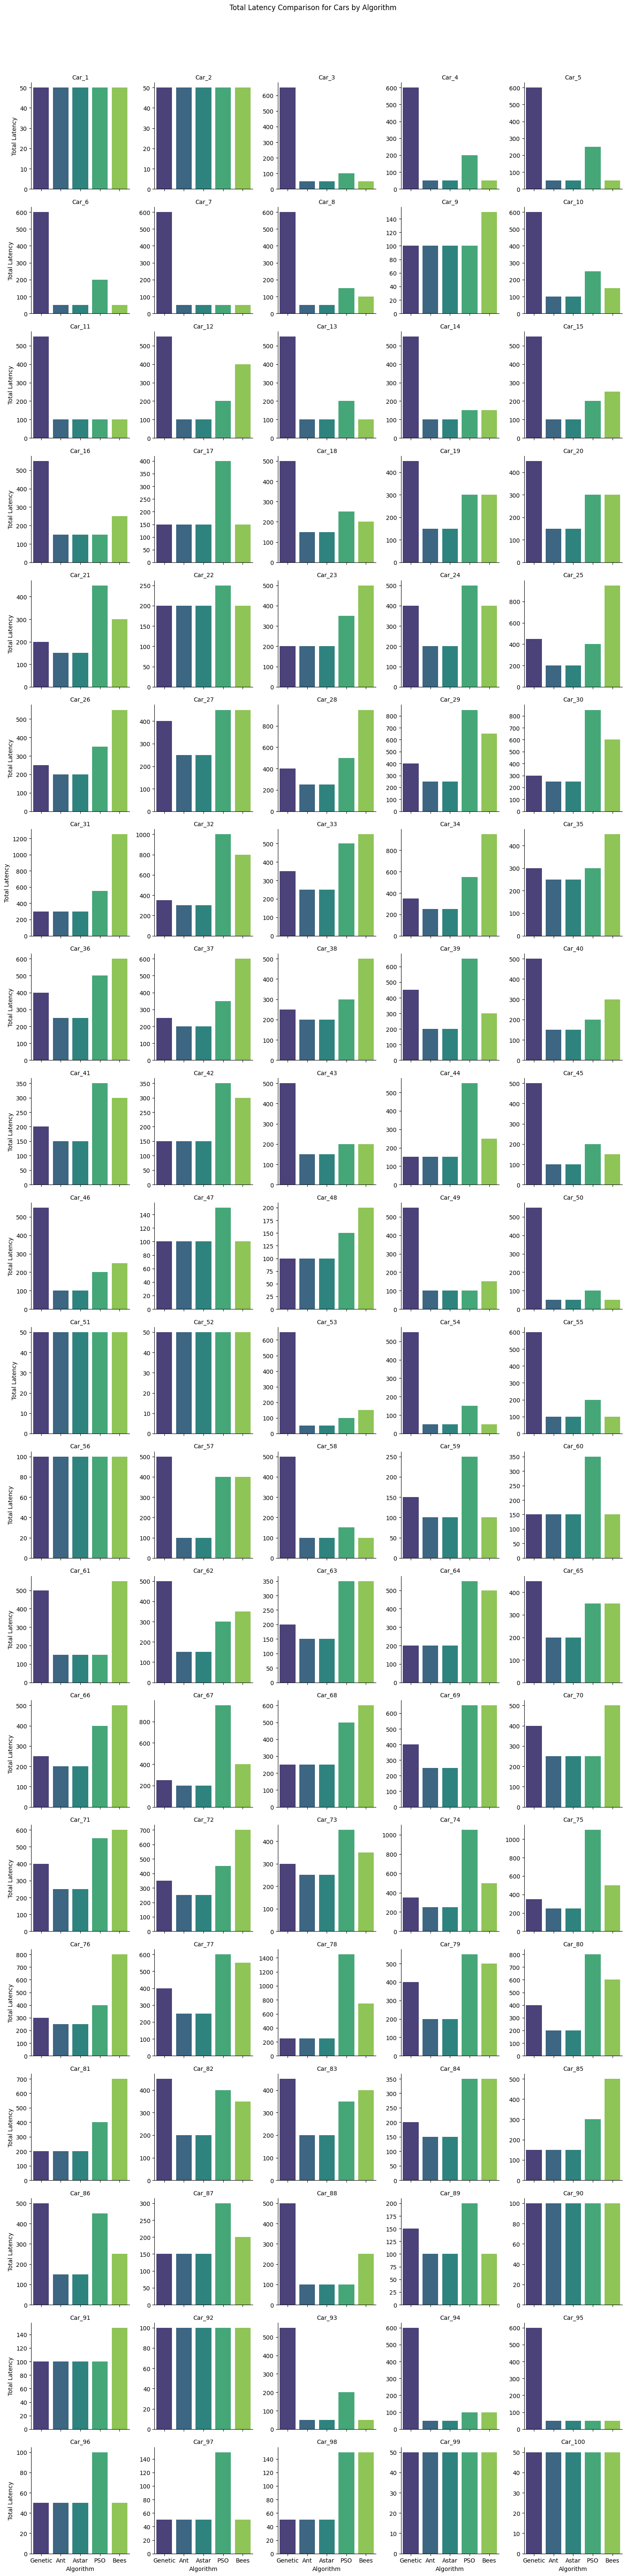

In [ ]:
#combining the data into data dictionary and extracting the latency for each car for each algorithm
data = {'Car': [f'Car_{i + 1}' for i in range(100)],
        'Genetic': [entry['total_latency'] for entry in Genetic],
        'Ant': [entry['total_latency'] for entry in AntColony],
        'Astar': [entry['total_latency'] for entry in Astar],
        'PSO':[entry['total_latency'] for entry in PsoStandard],
        'Bees': [entry['total_latency'] for entry in BEEES]
        }

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(df, id_vars='Car', var_name='Algorithm', value_name='Total Latency')

# Get the correct order for algorithms
algorithm_order = ['Genetic', 'Ant', 'Astar', 'PSO', 'Bees']

# Visualization - Faceted Bar Chart
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(melted_df, col='Car', col_wrap=5, height=3, sharey=False)
g.map(sns.barplot, 'Algorithm', 'Total Latency', palette='viridis', order=algorithm_order)
g.set_axis_labels('Algorithm', 'Total Latency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Total Latency Comparison for Cars by Algorithm', y=1.02)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

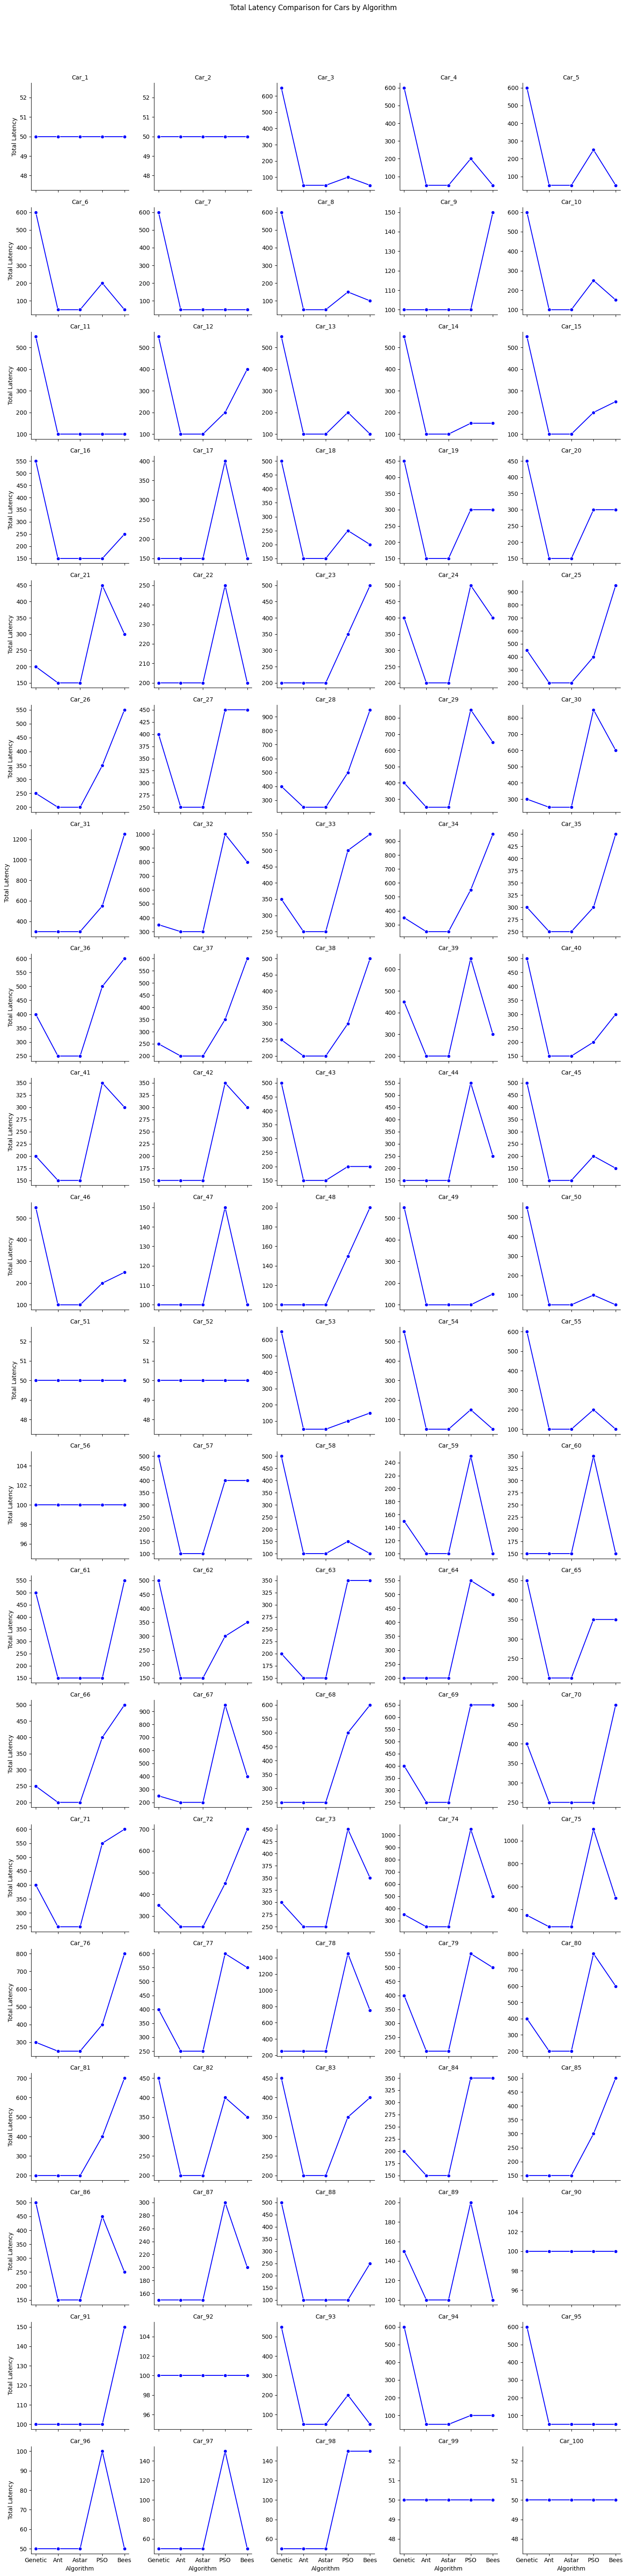

In [ ]:
data = {
    'Car': [f'Car_{i + 1}' for i in range(100)],
    'Genetic': [entry['total_latency'] for entry in Genetic],
    'Ant': [entry['total_latency'] for entry in AntColony],
    'Astar': [entry['total_latency'] for entry in Astar],
    'PSO': [entry['total_latency'] for entry in PsoStandard],
    'Bees': [entry['total_latency'] for entry in BEEES]
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(df, id_vars='Car', var_name='Algorithm', value_name='Total Latency')

# Visualization - Line Graph
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(melted_df, col='Car', col_wrap=5, height=3, sharey=False)
g.map(sns.lineplot, 'Algorithm', 'Total Latency', marker='o', color='blue')  # Specify a constant color
g.set_axis_labels('Algorithm', 'Total Latency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Total Latency Comparison for Cars by Algorithm', y=1.02)
plt.tight_layout()
plt.show()


## Data comparison table for all Five algorithms and calculating lowest latency and highest transmission rate out of five

Here in this code at first, we check if all the standard dictionaries of five algorithms have an equal number of items or 100.

Secondly, We create tables that contain latency comparisons between five algorithms and the lowest latency-providing algorithm at the end,
the second table contains the five algorithms' mbps value and the last column contains the max transmission rate amongst five min transmission rates.
the third table contains the average latency and average transmission rate of all five algorithms.

We run a for loop for all 100 cars for all five algorithms extract their latency and use the min() function to calculate the minimum out of five and store the name of the algorithm in the Min Latency Algorithm(s) column with its name so that it is easier to notice which algorithms provide best low latency.

Similarly, we now extract all the transmission rates and use the max() function to calculate all the transmission rates and put the name of the algorithm that provides the highest transmission rate value and store that in a column named Max Transmission Rate Algorithm.

At last, we create a table where we add all latency and divide it by the length of all five algorithms give the average latency as well as the average transmission rate, and store it in a table.

In [ ]:
if len(Genetic) != 100 or len(AntColony) != 100 or len(Astar) != 100:
    print("NOT ENOUGH DICTIONARY LENGTH")
else:
    table_latency = PrettyTable()
    table_latency.field_names = ["Car Number", "Genetic Latency", "Ant Latency", "Astar Latency","Pso Latency","Bees Latency", "Min Latency Algorithm(s)"]

    table_mbps = PrettyTable()
    table_mbps.field_names = ["Car Number", "Genetic Mbps", "Ant Mbps", "Astar Mbps","Pso Mbps","Bees mbps", "Max Transmission Rate Algorithm"]

    table_average = PrettyTable()
    table_average.field_names = ["Algorithm", "Average Latency", "Average Min Transmission Rate"]

    # Lists to store average latencies and minimum transmission rates for each algorithm
    genetic_latencies = []
    ant_latencies = []
    astar_latencies = []
    PSO_latencies = []
    Bees_latencies = []
    genetic_mbps = []
    ant_mbps = []
    astar_mbps = []
    PSO_mbps=[]
    Bees_mbps=[]


    for car_number in range(1, 101):
        genetic_entry = Genetic[car_number - 1]
        ant_entry = AntColony[car_number - 1]
        astar_entry = Astar[car_number - 1]
        Pso_entry= PsoStandard[car_number-1]
        Bees_entry= BEEES[car_number-1]
        # Latency table
        genetic_latency = genetic_entry['total_latency']
        ant_latency = ant_entry['total_latency']
        astar_latency = astar_entry['total_latency']
        PSO_latency = Pso_entry['total_latency']
        Bees_latency = Bees_entry['total_latency']

        genetic_latencies.append(genetic_latency)
        ant_latencies.append(ant_latency)
        astar_latencies.append(astar_latency)
        PSO_latencies.append(PSO_latency)
        Bees_latencies.append(Bees_latency)

        min_latency = min(genetic_latency, ant_latency, astar_latency,PSO_latency,Bees_latency)
        min_algorithms = []

        if min_latency == genetic_latency:
            min_algorithms.append("Genetic")
        if min_latency == ant_latency:
            min_algorithms.append("AntColony")
        if min_latency == astar_latency:
            min_algorithms.append("Astar")
        if min_latency == PSO_latency:
            min_algorithms.append("PSO")
        if min_latency == Bees_latency:
            min_algorithms.append("Bees")


        table_latency.add_row([car_number, genetic_latency, ant_latency, astar_latency,PSO_latency, Bees_latency,', '.join(min_algorithms)])

        # Mbps table
        genetic_mbps.append(float(genetic_entry['min_transmission_rate'].split(' ')[0]))
        ant_mbps.append(float(ant_entry['min_transmission_rate'].split(' ')[0]))
        astar_mbps.append(float(astar_entry['min_transmission_rate'].split(' ')[0]))
        PSO_mbps.append(Pso_entry['min_transmission_rate'])
        Bees_mbps.append(float(Bees_entry['min_transmission_rate'].split(' ')[0]))

        max_transmission_rate = max(genetic_mbps[-1], ant_mbps[-1], astar_mbps[-1], PSO_mbps[-1],Bees_mbps[-1])
        max_algorithms = []

        if max_transmission_rate == genetic_mbps[-1]:
            max_algorithms.append("Genetic")
        if max_transmission_rate == ant_mbps[-1]:
            max_algorithms.append("AntColony")
        if max_transmission_rate == astar_mbps[-1]:
            max_algorithms.append("Astar")
        if max_transmission_rate == PSO_mbps[-1]:
            max_algorithms.append("PSO")
        if max_transmission_rate == Bees_mbps[-1]:
            max_algorithms.append("Bees")

        table_mbps.add_row([car_number, genetic_mbps[-1], ant_mbps[-1], astar_mbps[-1],PSO_mbps[-1],Bees_mbps[-1], ', '.join(max_algorithms)])
    # Calculate average latencies and maximum transmission rates for each algorithm
    avg_genetic_latency = sum(genetic_latencies) / len(genetic_latencies)
    avg_ant_latency = sum(ant_latencies) / len(ant_latencies)
    avg_astar_latency = sum(astar_latencies) / len(astar_latencies)
    avg_pso_latency = sum(PSO_latencies) / len(PSO_latencies)
    avg_bees_latency = sum(Bees_latencies) / len(Bees_latencies)

    avg_genetic_mbps = sum(genetic_mbps) / len(genetic_mbps)
    avg_ant_mbps = sum(ant_mbps) / len(ant_mbps)
    avg_astar_mbps = sum(astar_mbps) / len(astar_mbps)
    avg_pso_mbps = sum(PSO_mbps) / len(PSO_mbps)
    avg_bees_mbps = sum(Bees_mbps) / len(Bees_mbps)

    table_average.add_row(["Genetic", avg_genetic_latency, avg_genetic_mbps])
    table_average.add_row(["AntColony", avg_ant_latency, avg_ant_mbps])
    table_average.add_row(["Astar", avg_astar_latency, avg_astar_mbps])
    table_average.add_row(["PSO", avg_pso_latency, avg_pso_mbps])
    table_average.add_row(["Bees", avg_bees_latency, avg_bees_mbps])

34600 100


#Total Latency Comparison for each Cars by Algorithm

Here all the five algorithms are compared to check which algorithm gives maximum and minimum latency for each cars.

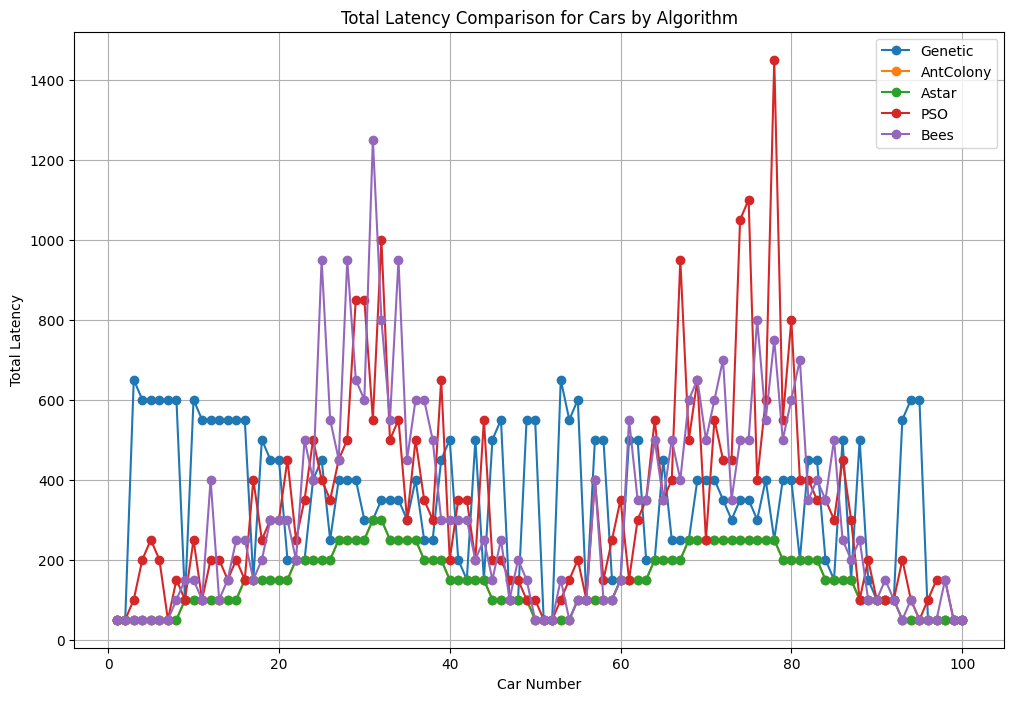

In [ ]:
# Line plot for latency comparison
plt.figure(figsize=(12, 8))
plt.plot(range(1, 101), genetic_latencies, label='Genetic', marker='o')
plt.plot(range(1, 101), ant_latencies, label='AntColony', marker='o')
plt.plot(range(1, 101), astar_latencies, label='Astar', marker='o')
plt.plot(range(1, 101), PSO_latencies, label='PSO', marker='o')
plt.plot(range(1, 101), Bees_latencies, label='Bees', marker='o')

plt.xlabel('Car Number')
plt.ylabel('Total Latency')
plt.title('Total Latency Comparison for Cars by Algorithm')
plt.legend()
plt.grid(True)
plt.show()


#Transmission Rate Comparison for each Cars by Algorithm
The below code visulize which algorithm gives the overall end-to-end maximum and minimum transmission rates for each cars for different algorithms.

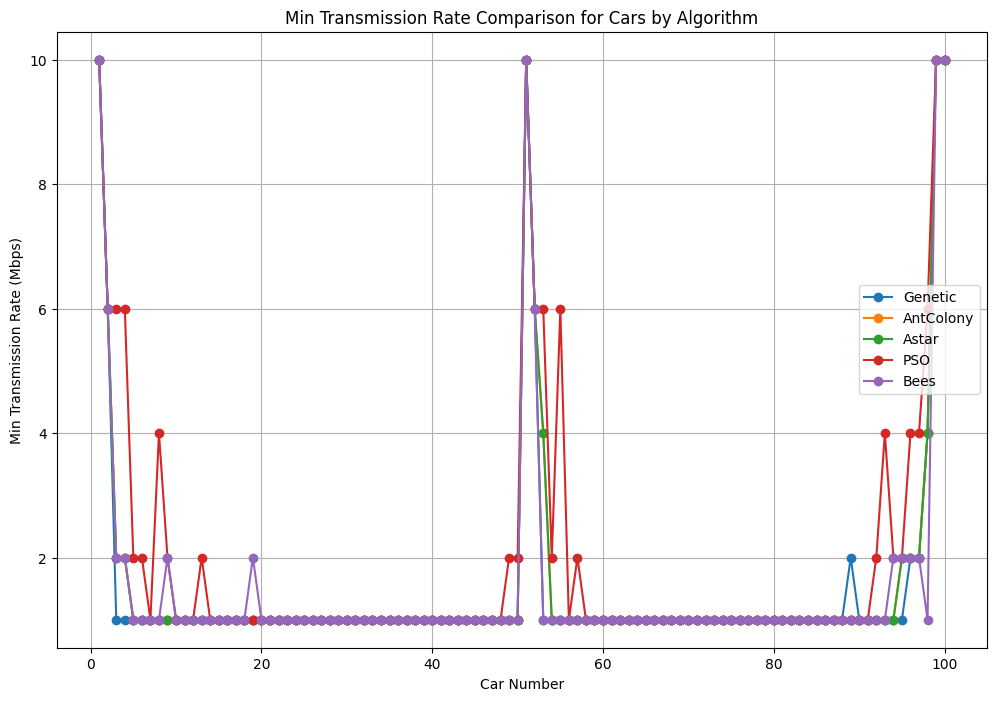

In [ ]:
# Line plot for Mbps comparison
plt.figure(figsize=(12, 8))
plt.plot(range(1, 101), genetic_mbps, label='Genetic', marker='o')
plt.plot(range(1, 101), ant_mbps, label='AntColony', marker='o')
plt.plot(range(1, 101), astar_mbps, label='Astar', marker='o')
plt.plot(range(1, 101), PSO_mbps, label='PSO', marker='o')
plt.plot(range(1, 101), Bees_mbps, label='Bees', marker='o')

plt.xlabel('Car Number')
plt.ylabel('Min Transmission Rate (Mbps)')
plt.title('Min Transmission Rate Comparison for Cars by Algorithm')
plt.legend()
plt.grid(True)
plt.show()


#Minimum latency for each Cars by Algorithm
Here individual car latency for all algorithm is calculated and listed out the algorithms that give minimum latency for each cars in min latency algorithms table. The Ant Colony Algorithm and A* algorithm gives minimum latency most of the time.

In [ ]:
print("Latency Table:")
print(table_latency)

Latency Table:
+------------+-----------------+-------------+---------------+-------------+--------------+--------------------------------------+
| Car Number | Genetic Latency | Ant Latency | Astar Latency | Pso Latency | Bees Latency |       Min Latency Algorithm(s)       |
+------------+-----------------+-------------+---------------+-------------+--------------+--------------------------------------+
|     1      |        50       |      50     |       50      |      50     |      50      | Genetic, AntColony, Astar, PSO, Bees |
|     2      |        50       |      50     |       50      |      50     |      50      | Genetic, AntColony, Astar, PSO, Bees |
|     3      |       650       |      50     |       50      |     100     |      50      |        AntColony, Astar, Bees        |
|     4      |       600       |      50     |       50      |     200     |      50      |        AntColony, Astar, Bees        |
|     5      |       600       |      50     |       50      |     2

#Maximum latency for each Cars by Algorithm
Here the minimum transmission rate for all algorithm  for each car is calculated and then compared which algorithm gives the highest minimum transmission rate value. Thoses algorithm which gives maximum transmission rate is displayed in  Max Transmission Rate Table. The PSO algorithm gives Maximum transmission rate most of the time.

In [ ]:
print("\nMbps Table:")
print(table_mbps)




Mbps Table:
+------------+--------------+----------+------------+----------+-----------+--------------------------------------+
| Car Number | Genetic Mbps | Ant Mbps | Astar Mbps | Pso Mbps | Bees mbps |   Max Transmission Rate Algorithm    |
+------------+--------------+----------+------------+----------+-----------+--------------------------------------+
|     1      |     10.0     |   10.0   |    10.0    |    10    |    10.0   | Genetic, AntColony, Astar, PSO, Bees |
|     2      |     6.0      |   6.0    |    6.0     |    6     |    6.0    | Genetic, AntColony, Astar, PSO, Bees |
|     3      |     1.0      |   2.0    |    2.0     |    6     |    2.0    |                 PSO                  |
|     4      |     1.0      |   2.0    |    2.0     |    6     |    2.0    |                 PSO                  |
|     5      |     1.0      |   1.0    |    1.0     |    2     |    1.0    |                 PSO                  |
|     6      |     1.0      |   1.0    |    1.0     |    2 

# Average latency and Mini Transmission of all Algorithm

Below table displays the average latency and average minimum transmission rate for each algorithm. The Genetic algorithm gives higher average latency and highest average minimum transmission rate and Ant Colony and Astar gives lowest average latency and lowest average minimum ransmission rate.

In [ ]:
print("\nAverage Table:")
print(table_average)


Average Table:
+-----------+-----------------+-------------------------------+
| Algorithm | Average Latency | Average Min Transmission Rate |
+-----------+-----------------+-------------------------------+
|  Genetic  |      346.0      |              1.52             |
| AntColony |      148.5      |              1.57             |
|   Astar   |      148.5      |              1.57             |
|    PSO    |      335.0      |              1.94             |
|    Bees   |      326.0      |              1.54             |
+-----------+-----------------+-------------------------------+


#Conclusion

According to the given dataset, there are 100 cars and two base stations
with x and y coordinates. With this coordinates distancance between two points are calculated. Using the distance the transmission rate is marked. In our work five optimization algorithms are implemented to find a routing path having a minimum end-to-end latency  and maximum end to end transmission for each car to any base station .

From the above evaluation and visualization it is clear that, Genetic algorithm gives higher average latency and highest average minimum transmission rate and Ant Colony and Astar gives lowest average latency and lowest average minimum ransmission rate. The Ant Colony Algorithm and A* algorithm gives minimum latency most of the time. The Ant Colony Algorithm and A* algorithm gives minimum latency most of the time.

# Storing all the data in json format
Here all he results from different algorithms such as BEEES, Astar, PSO, Genetic, and AntColony are processed and saved results into JSON files.

In [ ]:
BEEES = []
Astar = []
Genetic = []
PsoStandard = []
AntColony = []
#Bees
for item in BeesList:
    standardized_item = {
        'source_node': item['Source node'],
        'routing_path': item['Routing path'],
        'End-to-end transmission rate': item['End-to-end transmission rate']

    }
    BEEES.append(standardized_item)

with open('Bees_Algorithm.json', 'w') as json_file:
    json.dump(BEEES, json_file, indent=2)
#Astar
for item in astar_results:
    standardized_item = {
        'Source_node': item[0]['Source node'],
        'routing_path': item[0]['Routing path'],
        'End-to-end transmission rate': item[0]['Max transmission rate'],
    }
    Astar.append(standardized_item)

with open('Astar_Algorithm.json', 'w') as json_file:
    json.dump(Astar, json_file, indent=2)

#PSO
for data in PSOList:
    # Format the routing path
    formatted_routing_path = ", ".join([f"({step})" for step in data['routing path']])

    # Create the result dictionary in the desired format
    result = {
        'Source node': f"Car-{data['Source node'] + 1}",
        'routing path': f"{formatted_routing_path}",
        'End-to-end transmission rate': f"{data['End-to-end transmission rate']} Mbps",
    }

    # Append the result to the list
    PsoStandard.append(result)

# Print the formatted data
# for entry in PsoStandard:
#     print(entry)

with open('Pso_Algorithm.json', 'w') as json_file:
    json.dump(PsoStandard, json_file, indent=2)

#Genetic
for result in ga_results:
    standardized_result = {
        'Source_node': result['Source node'],
        'routing_path': result['Routing path'],
        'End-to-end transmission rate': result['End-to-end transmission rate'],
    }
    Genetic.append(standardized_result)
with open('Genetic_Algorithm.json', 'w') as json_file:
    json.dump(Genetic, json_file, indent=2)


#AntColony
for car_id, result in lowest_latency_results.items():
    # Format the routing path
    formatted_routing_path = ", ".join([f"({step[0]}, {step[1]} Mbps)" for step in result['Routing path']])

    # Create the result dictionary in the desired format
    standardized_result = {
        'Source_node': result['Source node'],
        'routing path': f"{formatted_routing_path}",
        'End-to-end transmission rate': result['End-to-end transmission rate'],
    }

    # Append the standardized result to the list
    AntColony.append(standardized_result)


# You can loop through this list to perform tasks on each result
with open('Ant_Colony_Algorithm.json', 'w') as json_file:
    json.dump(AntColony, json_file, indent=2)




#Future work

For future work, an optimization program like Routing
Optimization for transportation industries can be developed by improving connectivity, traffic management, emergency services, and the overall efficiency of transportation systems.

In these search and optimization algorithms, obstacle detection can be added so if an object has an optimal path to reach a certain destination and there is a landslide in that path then the algorithm can adapt to the situation and give an optimal path by changing its direction. This adaptive path optimization can be achieved by applying machine learning for path prediction (Ghaffari et al. 2022).

Another future use can be if we can integrate communication technologies such as 5g and enhance the transmission rate and its reliability and these models can be used in real-time scenarios.

These optimal path algorithms are also popularly used by Uber to find the shortest path the the destination in case of traffic or an obstacle in the path and choose another optimal path(Kulvicius et al. 2022).



# References

1. Zhang J., 2023. Search and Optimization Lecture Content.

2. Gen, M., Cheng, R. and Wang, D., 1997. Genetic algorithms for solving shortest path problems. Proceedings of the IEEE Conference on Evolutionary Computation, ICEC, 401–406.

3. Ghaffari, E., Rahmani, A. M., Saberikamarposhti, M. and Sahafi, A., 2022. An Optimal Path-Finding Algorithm in Smart Cities by Considering Traffic Congestion and Air Pollution. IEEE Access, 10, 55126–55135.

3. Karur, K., Sharma, N., Dharmatti, C. and Siegel, J. E., 2021. A Survey of Path Planning Algorithms for Mobile Robots. Vehicles 2021, Vol. 3, Pages 448-468 [online], 3 (3), 448–468. Available from: https://www.mdpi.com/2624-8921/3/3/27/htm [Accessed 11 Jan 2024].

4. Kulvicius, T., Herzog, S., Tamosiunaite, M. and Worgotter, F., 2022. Finding Optimal Paths Using Networks Without Learning - Unifying Classical Approaches. IEEE Transactions on Neural Networks and Learning Systems, 33 (12), 7877–7887.

5. Liu, L. S., Lin, J. F., Yao, J. X., He, D. W., Zheng, J. S., Huang, J. and Shi, P., 2021. Path Planning for Smart Car Based on Dijkstra Algorithm and Dynamic Window Approach. Wireless Communications and Mobile Computing, 2021.

6. Liu, Y., Wang, Y., Wen, Z. and Yuan, X., 2022. Automatic driving path planning based on A-Star algorithm. ICIIBMS 2022 - 7th International Conference on Intelligent Informatics and Biomedical Sciences, 19–21.

7. Ntakolia, C., Kladis, G. P. and Lyridis, D. V., 2023. A Fuzzy Logic Approach of Pareto Optimality for Multi-objective Path Planning in case of Unmanned Surface Vehicle. Journal of Intelligent and Robotic Systems: Theory and Applications [online], 109 (1), 1–12. Available from: https://link.springer.com/article/10.1007/s10846-023-01945-9 [Accessed 11 Jan 2024].

8. Ntakolia, C. and Lyridis, D. V., 2022. A comparative study on Ant Colony Optimization algorithm approaches for solving multi-objective path planning problems in case of unmanned surface vehicles. Ocean Engineering, 255, 111418.

9. Sedighizadeh, D. and Mazaheripour, H., 2018. Optimization of multi objective vehicle routing problem using a new hybrid algorithm based on particle swarm optimization and artificial bee colony algorithm considering Precedence constraints. Alexandria Engineering Journal, 57 (4), 2225–2239.
